YF.download() has changed argument auto_adjust default to True
Correlation Matrix:
               ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG  ^CNXMEDIA  ^CNXMETAL  \
^CNXIT       1.000000  0.422838  0.370433  0.378148   0.341460   0.391939   
^CNXAUTO     0.422838  1.000000  0.636088  0.497946   0.561304   0.580797   
^NSEBANK     0.370433  0.636088  1.000000  0.415526   0.469927   0.560381   
^CNXFMCG     0.378148  0.497946  0.415526  1.000000   0.372752   0.364302   
^CNXMEDIA    0.341460  0.561304  0.469927  0.372752   1.000000   0.538121   
^CNXMETAL    0.391939  0.580797  0.560381  0.364302   0.538121   1.000000   
^CNXPSE      0.315900  0.578168  0.543435  0.358886   0.567610   0.728546   
^CNXMNC      0.509377  0.773490  0.613705  0.750707   0.593609   0.655891   
^CNXINFRA    0.467038  0.728906  0.691403  0.523207   0.612474   0.729380   
^CNXREALTY   0.359104  0.616645  0.587736  0.415097   0.583114   0.584748   
^CNXENERGY   0.345149  0.592763  0.569241  0.408771   0.544447   0.683

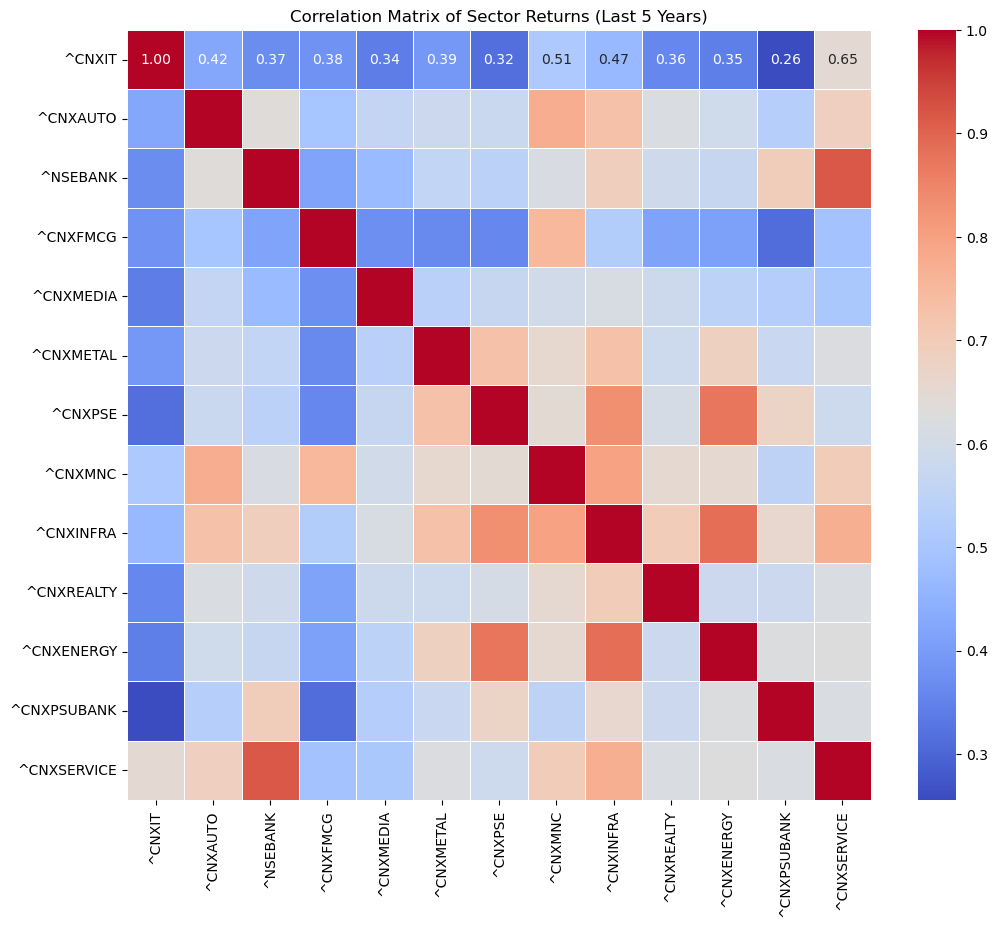

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# -----------------------------
# 1. Define Parameters & Tickers
# -----------------------------
sector_tickers = [
    "^CNXIT", "^CNXAUTO", "^NSEBANK", "^CNXFMCG", "^CNXMEDIA",
    "^CNXMETAL", "^CNXPSE", "^CNXMNC", "^CNXINFRA",
    "^CNXREALTY", "^CNXENERGY", "^CNXPSUBANK", "^CNXSERVICE"
]

# Define time period: last 5 years
end_date = datetime.today()
start_date = end_date - timedelta(days=5 * 365)

# -----------------------------
# 2. Download Sector Data
# -----------------------------
data_dict = {}
for ticker in sector_tickers:
    # Using auto_adjust=True (default), so we use the "Close" column as our adjusted price.
    df = yf.download(ticker, start=start_date, end=end_date, progress=False)
    if not df.empty and 'Close' in df.columns:
        price_data = df['Close']
        # If price_data is a DataFrame, squeeze it to convert into a Series.
        if isinstance(price_data, pd.DataFrame):
            price_data = price_data.squeeze()
        data_dict[ticker] = price_data
    else:
        print(f"Data for {ticker} is missing 'Close'.")

if not data_dict:
    raise ValueError("No sector data downloaded. Check ticker symbols or network connection.")

# Create a DataFrame from the downloaded data and drop rows with missing values
prices = pd.DataFrame(data_dict).dropna()

# -----------------------------
# 3. Calculate Daily Returns
# -----------------------------
returns = prices.pct_change().dropna()

# -----------------------------
# 4. Compute the Correlation Matrix
# -----------------------------
correlation_matrix = returns.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# -----------------------------
# 5. Visualize the Correlation Matrix
# -----------------------------
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sector Returns (Last 5 Years)")
plt.show()

Correlation Matrix:
               ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG  ^CNXMEDIA  ^CNXMETAL  \
^CNXIT       1.000000  0.362695  0.344484  0.378218   0.309509   0.169616   
^CNXAUTO     0.362695  1.000000  0.693610  0.541656   0.570144   0.594602   
^NSEBANK     0.344484  0.693610  1.000000  0.500860   0.503103   0.541016   
^CNXFMCG     0.378218  0.541656  0.500860  1.000000   0.390567   0.343304   
^CNXMEDIA    0.309509  0.570144  0.503103  0.390567   1.000000   0.490719   
^CNXMETAL    0.169616  0.594602  0.541016  0.343304   0.490719   1.000000   
^CNXPSE      0.251628  0.635635  0.593096  0.423049   0.555623   0.736916   
^CNXMNC      0.468353  0.798099  0.680590  0.745879   0.576590   0.562104   
^CNXINFRA    0.443799  0.740386  0.730967  0.575501   0.578637   0.574681   
^CNXREALTY   0.333935  0.618815  0.614717  0.453971   0.550528   0.450943   
^CNXENERGY   0.268033  0.632524  0.606075  0.448768   0.520695   0.708083   
^CNXPSUBANK  0.231035  0.542580  0.698713  0.365188   0.

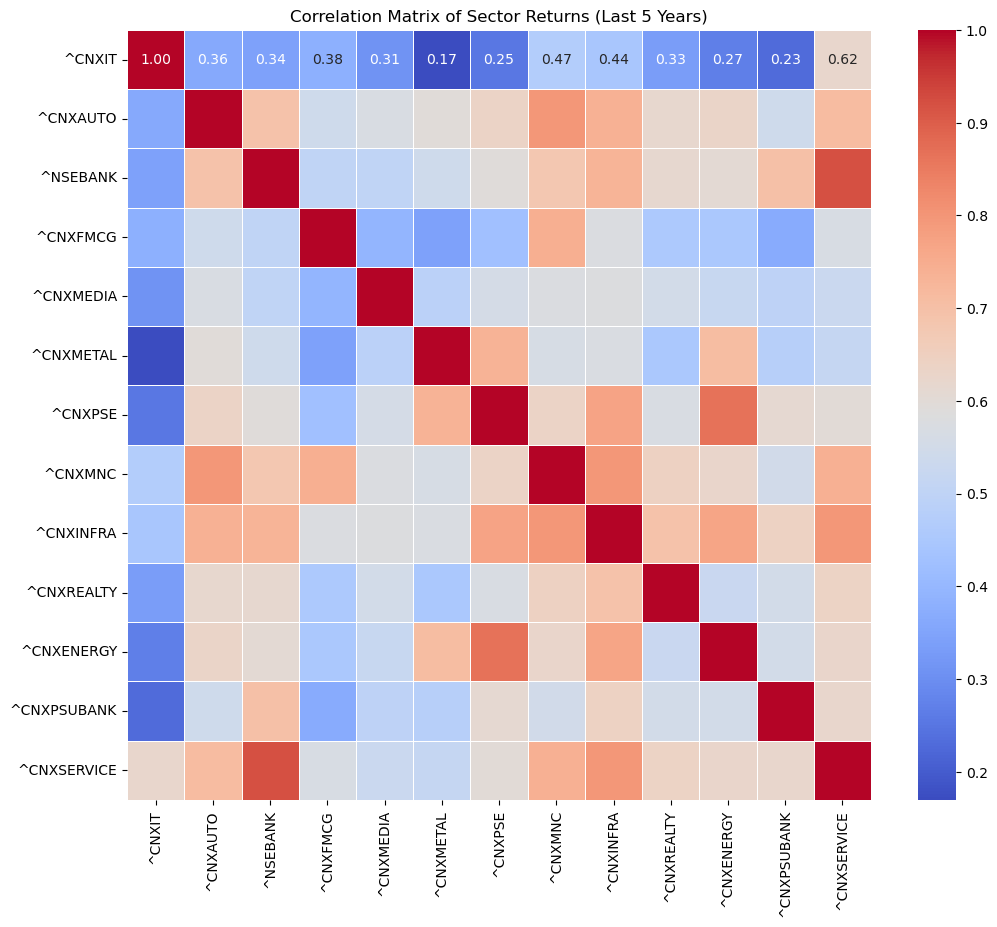


=== Ranked Sector Correlations ===
    Sector1     Sector2  Correlation             Classification
   ^NSEBANK ^CNXSERVICE     0.921736       Positive Correlation
    ^CNXPSE  ^CNXENERGY     0.864020       Positive Correlation
   ^CNXAUTO     ^CNXMNC     0.798099       Positive Correlation
    ^CNXMNC   ^CNXINFRA     0.796656       Positive Correlation
  ^CNXINFRA ^CNXSERVICE     0.796107       Positive Correlation
    ^CNXPSE   ^CNXINFRA     0.771793       Positive Correlation
  ^CNXINFRA  ^CNXENERGY     0.768357       Positive Correlation
   ^CNXFMCG     ^CNXMNC     0.745879       Positive Correlation
    ^CNXMNC ^CNXSERVICE     0.741334       Positive Correlation
   ^CNXAUTO   ^CNXINFRA     0.740386       Positive Correlation
  ^CNXMETAL     ^CNXPSE     0.736916       Positive Correlation
   ^NSEBANK   ^CNXINFRA     0.730967       Positive Correlation
   ^CNXAUTO ^CNXSERVICE     0.714236       Positive Correlation
  ^CNXMETAL  ^CNXENERGY     0.708083       Positive Correlation
   ^

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# -----------------------------
# 1. Define Parameters & Tickers
# -----------------------------
sector_tickers = [
    "^CNXIT", "^CNXAUTO", "^NSEBANK", "^CNXFMCG", "^CNXMEDIA",
    "^CNXMETAL", "^CNXPSE", "^CNXMNC", "^CNXINFRA",
    "^CNXREALTY", "^CNXENERGY", "^CNXPSUBANK", "^CNXSERVICE"
]

# Define time period: last 5 years
end_date = datetime.today()
start_date = end_date - timedelta(days=10 * 365)

# -----------------------------
# 2. Download Sector Data
# -----------------------------
data_dict = {}
for ticker in sector_tickers:
    # Using auto_adjust=True (default), so we use the "Close" column as our adjusted price.
    df = yf.download(ticker, start=start_date, end=end_date, progress=False)
    if not df.empty and 'Close' in df.columns:
        price_data = df['Close']
        # If price_data is a DataFrame, squeeze it to convert into a Series.
        if isinstance(price_data, pd.DataFrame):
            price_data = price_data.squeeze()
        data_dict[ticker] = price_data
    else:
        print(f"Data for {ticker} is missing 'Close'.")

if not data_dict:
    raise ValueError("No sector data downloaded. Check ticker symbols or network connection.")

# Create a DataFrame from the downloaded data and drop rows with missing values
prices = pd.DataFrame(data_dict).dropna()

# -----------------------------
# 3. Calculate Daily Returns
# -----------------------------
returns = prices.pct_change().dropna()

# -----------------------------
# 4. Compute the Correlation Matrix
# -----------------------------
correlation_matrix = returns.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# -----------------------------
# 5. Visualize the Correlation Matrix
# -----------------------------
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sector Returns (Last 5 Years)")
plt.show()

# -----------------------------
# 6. Rank and Classify Correlations
# -----------------------------
# Unstack the correlation matrix and remove duplicate pairs and self correlations
corr_pairs = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
corr_pairs = corr_pairs.stack().reset_index()
corr_pairs.columns = ['Sector1', 'Sector2', 'Correlation']

# Define a function to classify correlations using a threshold
def classify_corr(val, threshold=0.2):
    if val >= threshold:
        return "Positive Correlation"
    elif val <= -threshold:
        return "Negative Correlation"
    else:
        return "No Significant Correlation"

# Apply the classification function to each correlation value
corr_pairs['Classification'] = corr_pairs['Correlation'].apply(classify_corr)

# Sort the pairs by absolute correlation (largest first)
corr_pairs['AbsCorrelation'] = corr_pairs['Correlation'].abs()
corr_pairs = corr_pairs.sort_values(by='AbsCorrelation', ascending=False).drop(columns='AbsCorrelation')

print("\n=== Ranked Sector Correlations ===")
print(corr_pairs.to_string(index=False))

C:\Users\sarda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



=== Sector Clusters (Based on Distance from Correlations) ===
     Ticker  Cluster
  ^CNXMEDIA        0
  ^CNXMETAL        0
    ^CNXPSE        0
 ^CNXENERGY        0
     ^CNXIT        1
   ^CNXAUTO        1
   ^NSEBANK        1
   ^CNXFMCG        1
    ^CNXMNC        1
  ^CNXINFRA        1
 ^CNXREALTY        1
^CNXPSUBANK        1
^CNXSERVICE        1


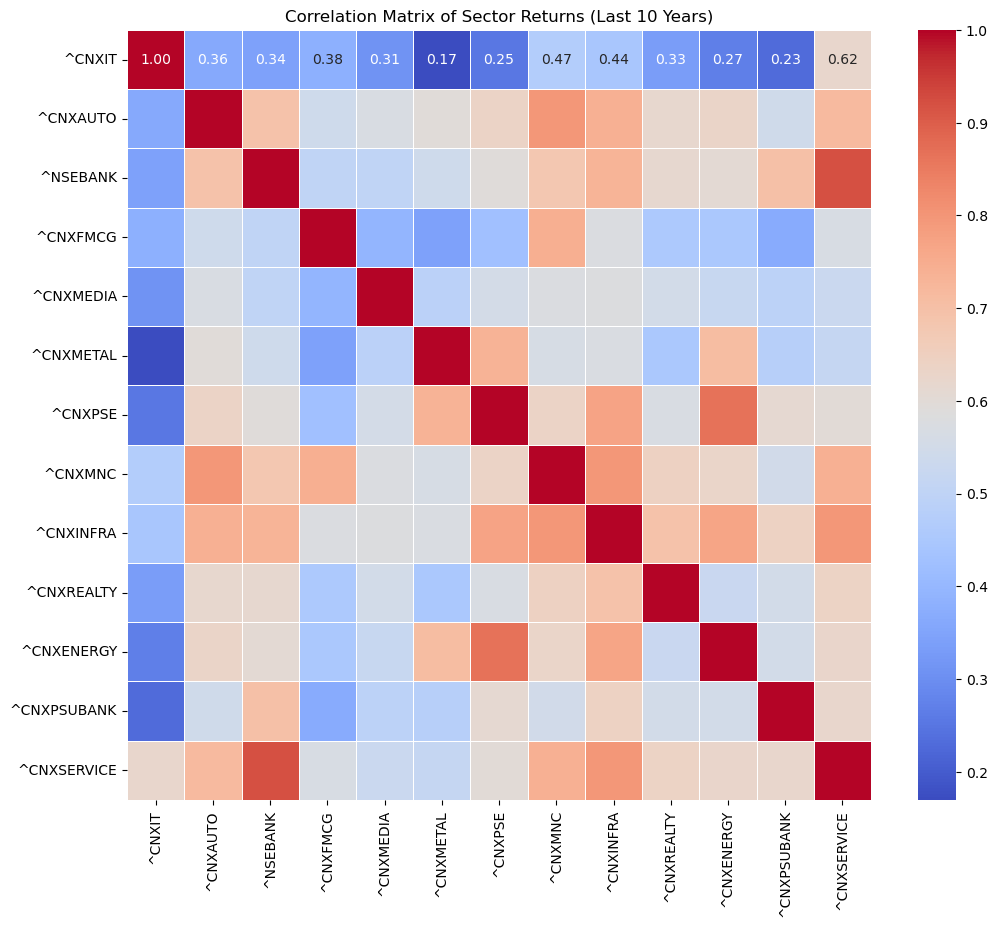

C:\Users\sarda\anaconda3\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
C:\Users\sarda\anaconda3\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


<Figure size 1200x1000 with 0 Axes>

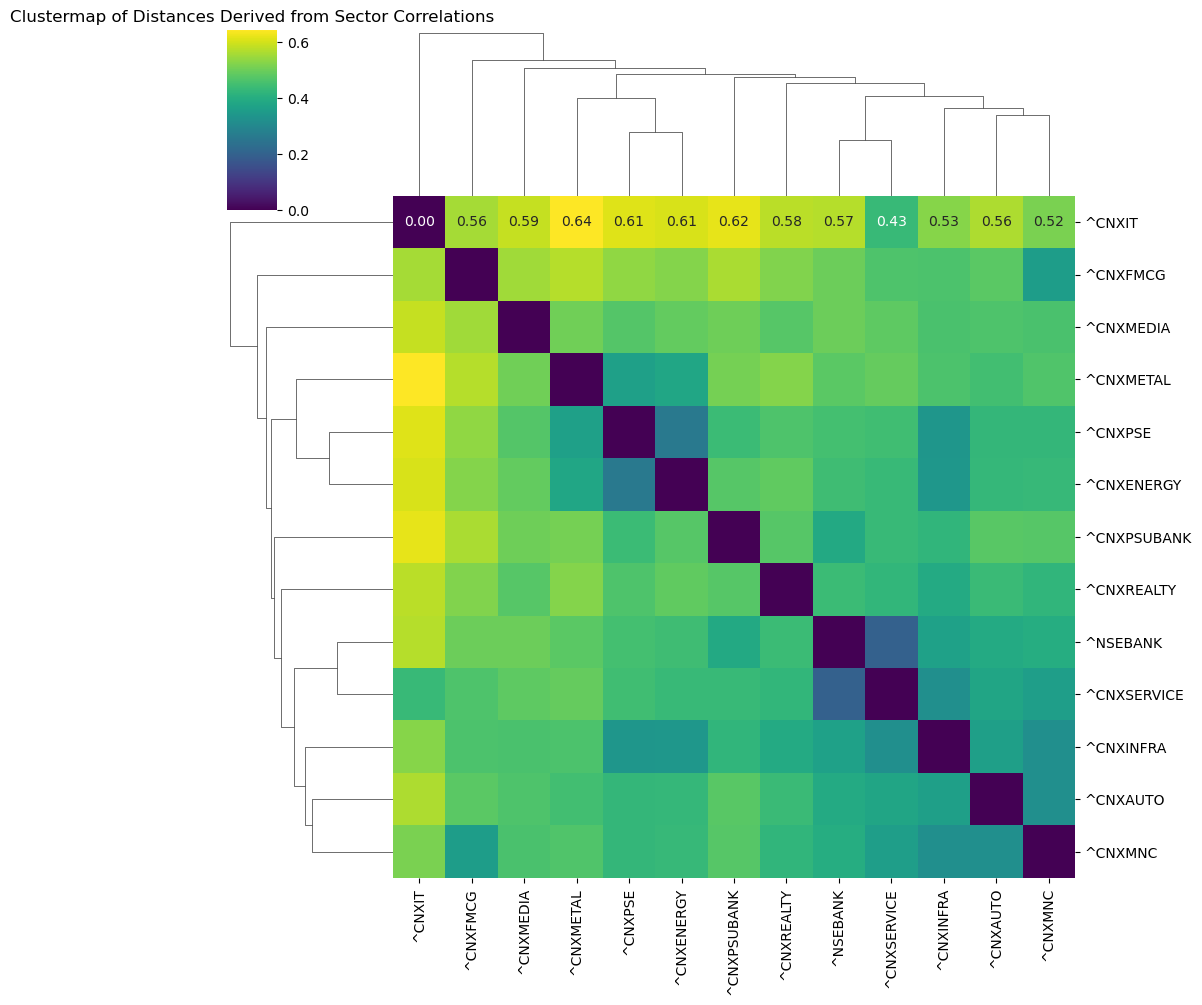

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform

# -----------------------------
# 1. Define Parameters & Tickers
# -----------------------------
sector_tickers = [
    "^CNXIT", "^CNXAUTO", "^NSEBANK", "^CNXFMCG", "^CNXMEDIA",
    "^CNXMETAL", "^CNXPSE", "^CNXMNC", "^CNXINFRA",
    "^CNXREALTY", "^CNXENERGY", "^CNXPSUBANK", "^CNXSERVICE"
]

# Define time period: last 10 years for broader analysis
end_date = datetime.today()
start_date = end_date - timedelta(days=10 * 365)

# -----------------------------
# 2. Download Sector Data
# -----------------------------
data_dict = {}
for ticker in sector_tickers:
    df = yf.download(ticker, start=start_date, end=end_date, progress=False)
    if not df.empty and 'Close' in df.columns:
        price_data = df['Close']
        # Squeeze in case it's a DataFrame
        if isinstance(price_data, pd.DataFrame):
            price_data = price_data.squeeze()
        data_dict[ticker] = price_data
    else:
        print(f"Data for {ticker} is missing 'Close'.")

if not data_dict:
    raise ValueError("No sector data downloaded. Check ticker symbols or network connection.")

prices = pd.DataFrame(data_dict).dropna()

# -----------------------------
# 3. Calculate Daily Returns & Correlation Matrix
# -----------------------------
returns = prices.pct_change().dropna()
correlation_matrix = returns.corr()

# -----------------------------
# 4. Transform Correlations into Distances
# -----------------------------
# Using the metric: d = sqrt(0.5 * (1 - corr))
distance_matrix = np.sqrt(0.5 * (1 - correlation_matrix))
# For KMeans, we need a condensed feature set per ticker.
# One approach: Use each row of the distance matrix as the feature vector.
features = distance_matrix.values

# -----------------------------
# 5. Apply K-Means Clustering
# -----------------------------
# We choose the number of clusters arbitrarily; you can use techniques like the elbow method to decide.
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(features)

# Map tickers to clusters
cluster_df = pd.DataFrame({'Ticker': correlation_matrix.index, 'Cluster': clusters})
print("\n=== Sector Clusters (Based on Distance from Correlations) ===")
print(cluster_df.sort_values(by='Cluster').to_string(index=False))

# -----------------------------
# 6. Visualize Clusters on the Heatmap
# -----------------------------
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sector Returns (Last 10 Years)")
plt.show()

# Optionally, plot the distance matrix with cluster labels for further insight
plt.figure(figsize=(12, 10))
sns.clustermap(distance_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Clustermap of Distances Derived from Sector Correlations")
plt.show()

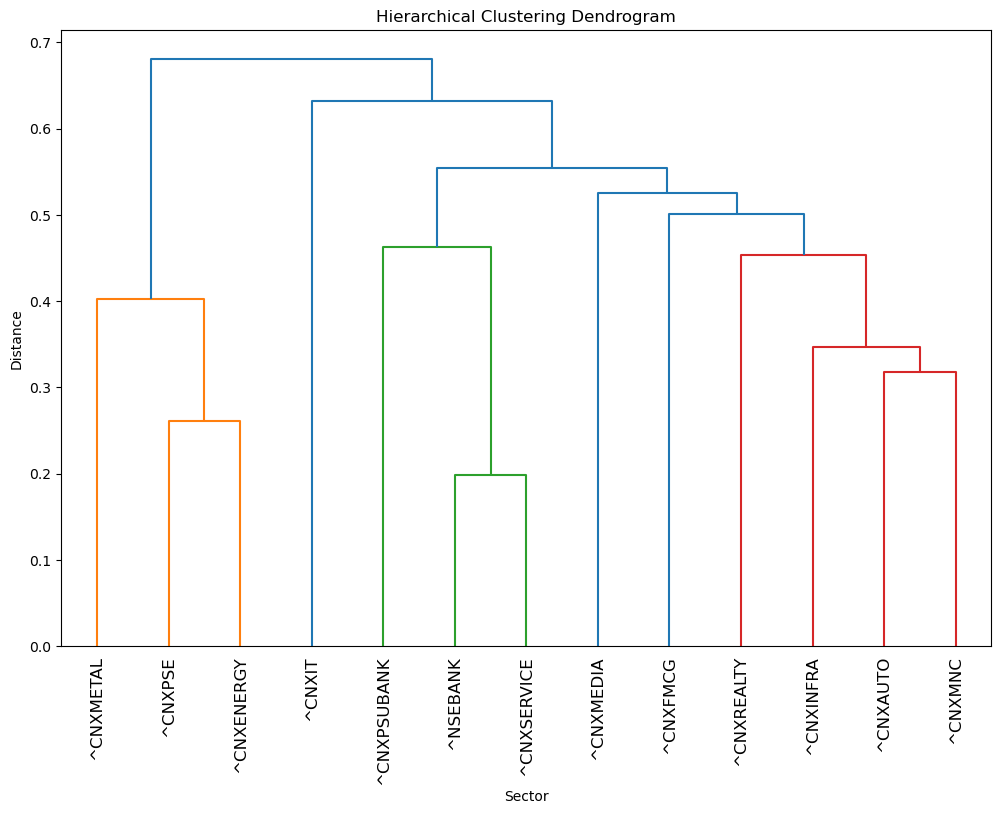


=== Sector Cluster Memberships (Threshold = 0.15) ===
     Ticker  Cluster
    ^CNXPSE        1
 ^CNXENERGY        2
  ^CNXMETAL        3
   ^NSEBANK        4
^CNXSERVICE        5
^CNXPSUBANK        6
   ^CNXAUTO        7
    ^CNXMNC        8
  ^CNXINFRA        9
 ^CNXREALTY       10
   ^CNXFMCG       11
  ^CNXMEDIA       12
     ^CNXIT       13

=== Linkage Matrix (First 10 rows) ===
   Sector1_idx  Sector2_idx  Distance  SampleCount
0          2.0         12.0  0.197827          2.0
1          6.0         10.0  0.260795          2.0
2          1.0          7.0  0.317683          2.0
3          8.0         15.0  0.347199          3.0
4          5.0         14.0  0.402871          3.0
5          9.0         16.0  0.453034          4.0
6         11.0         13.0  0.462328          3.0
7          3.0         18.0  0.501210          5.0
8          4.0         20.0  0.525241          6.0
9         19.0         21.0  0.554233          9.0


In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform

# -----------------------------
# 1. Define Parameters & Tickers
# -----------------------------
sector_tickers = [
    "^CNXIT", "^CNXAUTO", "^NSEBANK", "^CNXFMCG", "^CNXMEDIA",
    "^CNXMETAL", "^CNXPSE", "^CNXMNC", "^CNXINFRA",
    "^CNXREALTY", "^CNXENERGY", "^CNXPSUBANK", "^CNXSERVICE"
]

# Define time period: last 10 years for broader analysis
end_date = datetime.today()
start_date = end_date - timedelta(days=10 * 365)

# -----------------------------
# 2. Download Sector Data
# -----------------------------
data_dict = {}
for ticker in sector_tickers:
    df = yf.download(ticker, start=start_date, end=end_date, progress=False)
    if not df.empty and 'Close' in df.columns:
        price_data = df['Close']
        # Squeeze in case it's a DataFrame
        if isinstance(price_data, pd.DataFrame):
            price_data = price_data.squeeze()
        data_dict[ticker] = price_data
    else:
        print(f"Data for {ticker} is missing 'Close'.")

if not data_dict:
    raise ValueError("No sector data downloaded. Check ticker symbols or network connection.")

prices = pd.DataFrame(data_dict).dropna()

# -----------------------------
# 3. Calculate Daily Returns & Correlation Matrix
# -----------------------------
returns = prices.pct_change().dropna()
correlation_matrix = returns.corr()

# -----------------------------
# 4. Transform Correlations into Distances
# -----------------------------
# Using the metric: d = sqrt(0.5 * (1 - corr))
distance_matrix = np.sqrt(0.5 * (1 - correlation_matrix))

# For hierarchical clustering we need the condensed distance matrix.
condensed_dist = squareform(distance_matrix)

# -----------------------------
# 5. Hierarchical Clustering and Dendrogram
# -----------------------------
# Compute linkage matrix using Ward's method
Z = linkage(condensed_dist, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(Z, labels=correlation_matrix.index, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sector")
plt.ylabel("Distance")
plt.show()

# -----------------------------
# 6. Determine Cluster Memberships
# -----------------------------
# Set a threshold to form flat clusters; adjust this threshold to see different levels.
# Lower threshold: more clusters (sectors need to be very similar to be grouped)
threshold = 0.15  # you can experiment with this value
clusters = fcluster(Z, t=threshold, criterion='distance')

# Map tickers to clusters
cluster_df = pd.DataFrame({'Ticker': correlation_matrix.index, 'Cluster': clusters})
print("\n=== Sector Cluster Memberships (Threshold = {:.2f}) ===".format(threshold))
print(cluster_df.sort_values('Cluster').to_string(index=False))

# -----------------------------
# 7. Interpret Cluster Levels
# -----------------------------
# Optionally, print out the linkage matrix to see at what distances clusters merge.
linkage_df = pd.DataFrame(Z, columns=['Sector1_idx', 'Sector2_idx', 'Distance', 'SampleCount'])
print("\n=== Linkage Matrix (First 10 rows) ===")
print(linkage_df.head(10))

Correlation Matrix:
               ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG  ^CNXMEDIA  ^CNXMETAL  \
^CNXIT       1.000000  0.362695  0.344484  0.378218   0.309509   0.169616   
^CNXAUTO     0.362695  1.000000  0.693610  0.541656   0.570144   0.594602   
^NSEBANK     0.344484  0.693610  1.000000  0.500860   0.503103   0.541016   
^CNXFMCG     0.378218  0.541656  0.500860  1.000000   0.390567   0.343304   
^CNXMEDIA    0.309509  0.570144  0.503103  0.390567   1.000000   0.490719   
^CNXMETAL    0.169616  0.594602  0.541016  0.343304   0.490719   1.000000   
^CNXPSE      0.251628  0.635635  0.593096  0.423049   0.555623   0.736916   
^CNXMNC      0.468353  0.798099  0.680590  0.745879   0.576590   0.562104   
^CNXINFRA    0.443799  0.740386  0.730967  0.575501   0.578637   0.574681   
^CNXREALTY   0.333935  0.618815  0.614717  0.453971   0.550528   0.450943   
^CNXENERGY   0.268033  0.632524  0.606075  0.448768   0.520695   0.708083   
^CNXPSUBANK  0.231035  0.542580  0.698713  0.365188   0.

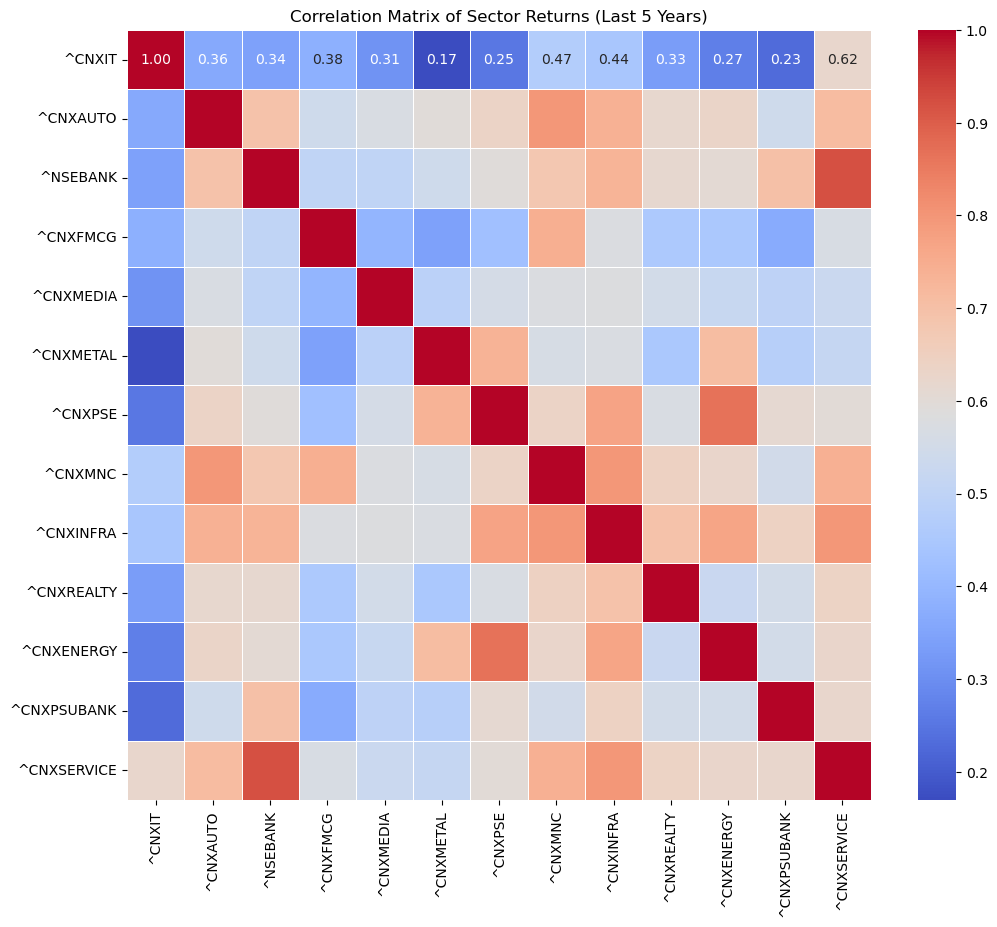


=== Ranked Sector Correlations with Data-Driven Classification ===
    Sector1     Sector2  Correlation  Cluster       Classification
   ^NSEBANK ^CNXSERVICE     0.921736        0     High Correlation
    ^CNXPSE  ^CNXENERGY     0.864020        0     High Correlation
   ^CNXAUTO     ^CNXMNC     0.798099        0     High Correlation
    ^CNXMNC   ^CNXINFRA     0.796656        0     High Correlation
  ^CNXINFRA ^CNXSERVICE     0.796107        0     High Correlation
    ^CNXPSE   ^CNXINFRA     0.771793        0     High Correlation
  ^CNXINFRA  ^CNXENERGY     0.768357        0     High Correlation
   ^CNXFMCG     ^CNXMNC     0.745879        0     High Correlation
    ^CNXMNC ^CNXSERVICE     0.741334        0     High Correlation
   ^CNXAUTO   ^CNXINFRA     0.740386        0     High Correlation
  ^CNXMETAL     ^CNXPSE     0.736916        0     High Correlation
   ^NSEBANK   ^CNXINFRA     0.730967        0     High Correlation
   ^CNXAUTO ^CNXSERVICE     0.714236        0     High Correl

C:\Users\sarda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.cluster import KMeans

# -----------------------------
# 1. Define Parameters & Tickers
# -----------------------------
sector_tickers = [
    "^CNXIT", "^CNXAUTO", "^NSEBANK", "^CNXFMCG", "^CNXMEDIA",
    "^CNXMETAL", "^CNXPSE", "^CNXMNC", "^CNXINFRA",
    "^CNXREALTY", "^CNXENERGY", "^CNXPSUBANK", "^CNXSERVICE"
]

# Define time period: last 5 years (using 10*365 days here for a bit more data)
end_date = datetime.today()
start_date = end_date - timedelta(days=10 * 365)

# -----------------------------
# 2. Download Sector Data
# -----------------------------
data_dict = {}
for ticker in sector_tickers:
    df = yf.download(ticker, start=start_date, end=end_date, progress=False)
    if not df.empty and 'Close' in df.columns:
        price_data = df['Close']
        if isinstance(price_data, pd.DataFrame):
            price_data = price_data.squeeze()
        data_dict[ticker] = price_data
    else:
        print(f"Data for {ticker} is missing 'Close'.")

if not data_dict:
    raise ValueError("No sector data downloaded. Check ticker symbols or network connection.")

prices = pd.DataFrame(data_dict).dropna()

# -----------------------------
# 3. Calculate Daily Returns
# -----------------------------
returns = prices.pct_change().dropna()

# -----------------------------
# 4. Compute the Correlation Matrix
# -----------------------------
correlation_matrix = returns.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# -----------------------------
# 5. Visualize the Correlation Matrix
# -----------------------------
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sector Returns (Last 5 Years)")
plt.show()

# -----------------------------
# 6. Rank and Classify Correlations using KMeans Clustering
# -----------------------------
corr_pairs = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
corr_pairs = corr_pairs.stack().reset_index()
corr_pairs.columns = ['Sector1', 'Sector2', 'Correlation']

X = corr_pairs[['Correlation']].values

# Use KMeans clustering to find 3 groups
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
corr_pairs['Cluster'] = kmeans.labels_

# Map clusters to classification based on their centers:
centers = kmeans.cluster_centers_
centers_sorted = sorted([(i, center[0]) for i, center in enumerate(centers)], key=lambda x: x[1])
# Check if there are any truly negative correlations
if all(center[1] >= 0 for center in centers_sorted):
    # If all values are positive, use alternative labels
    cluster_mapping = {
        centers_sorted[0][0]: "Low Correlation",
        centers_sorted[1][0]: "Moderate Correlation",
        centers_sorted[2][0]: "High Correlation"
    }
else:
    # Standard mapping: lowest center -> Negative, middle -> No Significant, highest -> Positive
    cluster_mapping = {
        centers_sorted[0][0]: "Negative Correlation",
        centers_sorted[1][0]: "No Significant Correlation",
        centers_sorted[2][0]: "Positive Correlation"
    }

corr_pairs['Classification'] = corr_pairs['Cluster'].map(cluster_mapping)

corr_pairs['AbsCorrelation'] = corr_pairs['Correlation'].abs()
corr_pairs = corr_pairs.sort_values(by='AbsCorrelation', ascending=False).drop(columns='AbsCorrelation')

print("\n=== Ranked Sector Correlations with Data-Driven Classification ===")
print(corr_pairs.to_string(index=False))

In [19]:
#Gpt combination

Correlation Matrix of Sector Returns (Last 5 Years):
                           ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG ^CNXMEDIA  \
Ticker                     ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG ^CNXMEDIA   
            Ticker                                                          
^CNXIT      ^CNXIT       1.000000  0.422838  0.370433  0.378148  0.341460   
^CNXAUTO    ^CNXAUTO     0.422838  1.000000  0.636088  0.497946  0.561304   
^NSEBANK    ^NSEBANK     0.370433  0.636088  1.000000  0.415526  0.469927   
^CNXFMCG    ^CNXFMCG     0.378148  0.497946  0.415526  1.000000  0.372752   
^CNXMEDIA   ^CNXMEDIA    0.341460  0.561304  0.469927  0.372752  1.000000   
^CNXMETAL   ^CNXMETAL    0.391939  0.580797  0.560381  0.364302  0.538121   
^CNXPSE     ^CNXPSE      0.315900  0.578168  0.543435  0.358886  0.567610   
^CNXMNC     ^CNXMNC      0.509377  0.773490  0.613705  0.750707  0.593609   
^CNXINFRA   ^CNXINFRA    0.467038  0.728906  0.691403  0.523207  0.612474   
^CNXREALTY  ^CNXREALTY 

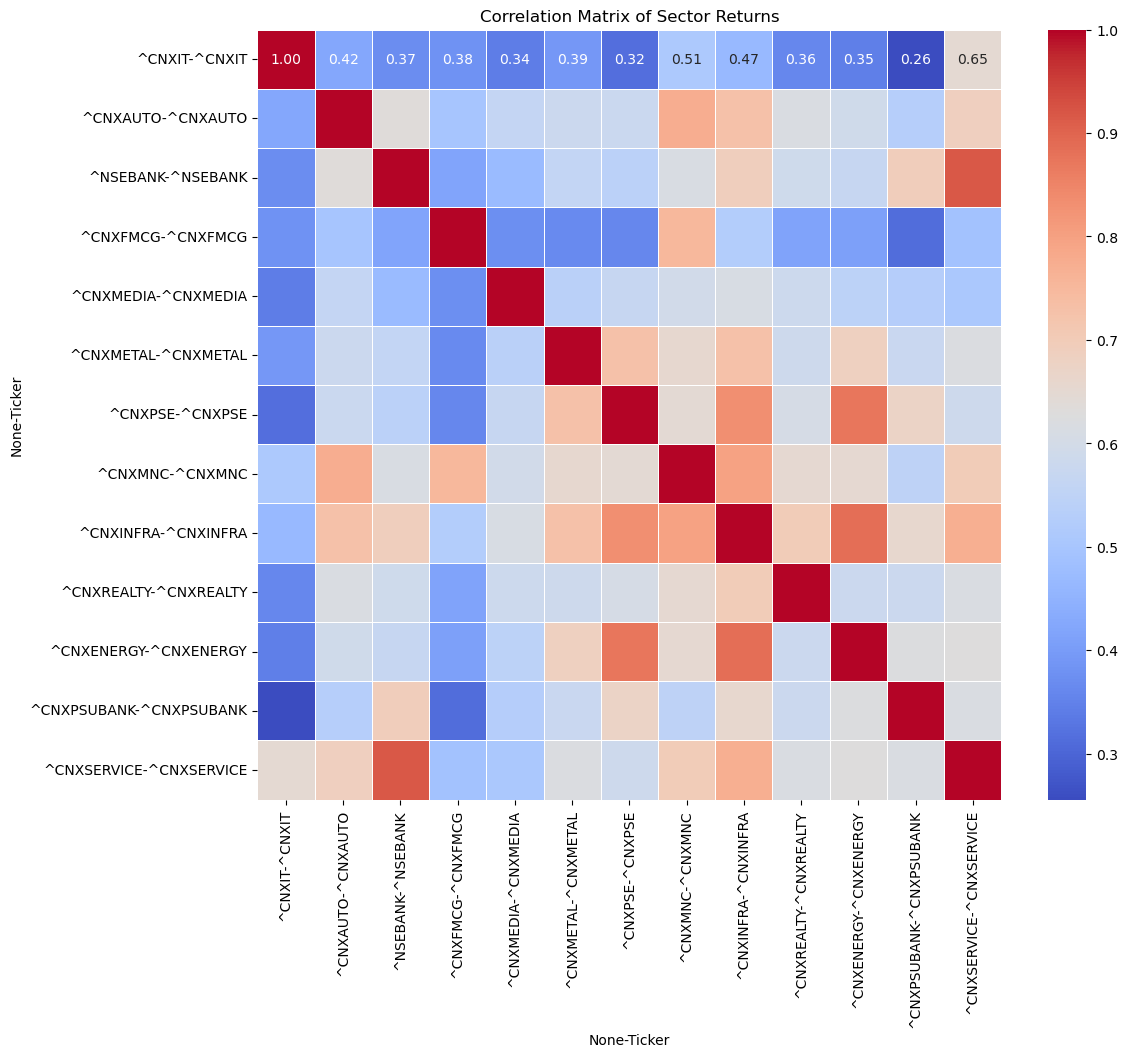

C:\Users\sarda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\


Sector Cluster Mapping (for Diversification):
  ('^CNXIT', '^CNXIT'): Cluster 2
  ('^CNXAUTO', '^CNXAUTO'): Cluster 1
  ('^NSEBANK', '^NSEBANK'): Cluster 1
  ('^CNXFMCG', '^CNXFMCG'): Cluster 1
  ('^CNXMEDIA', '^CNXMEDIA'): Cluster 0
  ('^CNXMETAL', '^CNXMETAL'): Cluster 1
  ('^CNXPSE', '^CNXPSE'): Cluster 1
  ('^CNXMNC', '^CNXMNC'): Cluster 1
  ('^CNXINFRA', '^CNXINFRA'): Cluster 1
  ('^CNXREALTY', '^CNXREALTY'): Cluster 0
  ('^CNXENERGY', '^CNXENERGY'): Cluster 1
  ('^CNXPSUBANK', '^CNXPSUBANK'): Cluster 0
  ('^CNXSERVICE', '^CNXSERVICE'): Cluster 1

--- HRP-Weighted Quarterly Rebalancing with Diversified Sector Selection ---


===== Simulating for Top 3 Sectors =====

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMEDIA', '^CNXMEDIA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 12.50%
    ('^CNXAUTO', '^CNXAUTO'): 50.00%
    ('^CNXMEDIA', '^CNXMEDIA'): 37.50%
  Portfolio Return: 37.76%
  Cumulative Value: ₹137,755.11
-----

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 12.50%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Portfolio Return: 9.70%
  Cumulative Value: ₹279,094.87
--------------------------------------------------------------------------------
Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 12.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Portfolio Return: 9.26%
  Cumulative Value: ₹304,927.13
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 12.50%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXINFRA', '^CNXINFRA'): 47.37%
  Portfolio Return: 7.91%
  Cumulative Value: ₹231,544.41
--------------------------------------------------------------------------------
Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXINFRA', '^CNXINFRA'): 47.37%
  Portfolio Return: -5.51%
  Cumulative Value: ₹218,784.61
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
    ('^CNXAUTO', '^CNXAUTO'): 44.86%
  Portfolio Return: 5.79%
  Cumulative Value: ₹178,301.73
--------------------------------------------------------------------------------
Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
    ('^CNXAUTO', '^CNXAUTO'): 44.86%
  Portfolio Return: 8.93%
  Cumulative Value: ₹194,221.04
-----------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXAUTO', '^CNXAUTO'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXAUTO', '^CNXAUTO'): 9.35%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
    ('^CNXMNC', '^CNXMNC'): 44.86%
  Portfolio Return: -8.82%
  Cumulative Value: ₹315,941.90
--------------------------------------------------------------------------------

===== Simulating for Top 6 Sectors =====

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMEDIA', '^CNXMEDIA'), ('^NSEBANK', '^NSEBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 6.84%
    ('^CNXAUTO', '^CNXAUTO'): 42.74%
    ('^CNXMEDIA', '^CNXMEDIA'): 7.69%
    ('^NSEBANK', '^NSEBANK'): 8.55%
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXMETAL', '^CNXMETAL')

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 8.55%
    ('^CNXMETAL', '^CNXMETAL'): 8.55%
    ('^CNXAUTO', '^CNXAUTO'): 7.69%
    ('^CNXMNC', '^CNXMNC'): 42.74%
  Portfolio Return: 11.02%
  Cumulative Value: ₹241,631.48
--------------------------------------------------------------------------------
Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXREALTY', '^CNXREALTY'): 8.55%
    ('^CNXAUTO', '^CNXAUTO'): 7.69%
    ('^CNXMNC', '^CNXMNC'): 42.74

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXMETAL', '^CNXMETAL'): 7.96%
    ('^CNXREALTY', '^CNXREALTY'): 7.96%
    ('^CNXINFRA', '^CNXINFRA'): 7.17%
    ('^CNXMNC', '^CNXMNC'): 5.69%
    ('^CNXENERGY', '^CNXENERGY'): 6.37%
    ('^CNXSERVICE', '^CNXSERVICE'): 40.96%
  Portfolio Return: 1.98%
  Cumulative Value: ₹228,161.27
--------------------------------------------------------------------------------
Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXMETAL', '^CNXMETAL'): 7.

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 7.51%
    ('^CNXMEDIA', '^CNXMEDIA'): 5.37%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXENERGY', '^CNXENERGY'): 7.51%
    ('^CNXMNC', '^CNXMNC'): 4.83%
    ('^CNXAUTO', '^CNXAUTO'): 39.45%
    ('^CNXMETAL', '^CNXMETAL'): 6.76%
    ('^CNXPSE', '^CNXPSE'): 6.01%
  Portfolio Return: 16.68%
  Cumulative Value: ₹152,613.04
--------------------------------------------------------------------------------
Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:


C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 6.76%
    ('^CNXREALTY', '^CNXREALTY'): 5.37%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXPSE', '^CNXPSE'): 7.51%
    ('^CNXAUTO', '^CNXAUTO'): 4.83%
    ('^CNXMETAL', '^CNXMETAL'): 7.51%
    ('^CNXMNC', '^CNXMNC'): 39.45%
    ('^CNXENERGY', '^CNXENERGY'): 6.01%
  Portfolio Return: 7.50%
  Cumulative Value: ₹361,638.12
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXPSE', '^CNXPSE'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 7.16%
    ('^CNXIT', '^CNXIT'): 5.72%
    ('^CNXREALTY', '^CNXREALTY'): 5.11%
    ('^CNXINFRA', '^CNXINFRA'): 6.44%
    ('^CNXAUTO', '^CNXAUTO'): 4.17%
    ('^CNXMETAL', '^CNXMETAL'): 21.47%
    ('^CNXMNC', '^CNXMNC'): 38.17%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.60%
    ('^CNXPSE', '^CNXPSE'): 7.16%
  Portfolio Return: 11.67%
  Cumulative Value: ₹203,691.22
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXAUTO', '^CN

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 4.00%
    ('^CNXAUTO', '^CNXAUTO'): 4.90%
    ('^CNXMEDIA', '^CNXMEDIA'): 6.86%
    ('^CNXENERGY', '^CNXENERGY'): 20.58%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXINFRA', '^CNXINFRA'): 6.86%
    ('^CNXMETAL', '^CNXMETAL'): 5.49%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.41%
    ('^CNXFMCG', '^CNXFMCG'): 37.05%
    ('^CNXREALTY', '^CNXREALTY'): 6.18%
  Portfolio Return: 17.79%
  Cumulative Value: ₹162,875.47
--------------------------------------------------------------------------------
Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CN

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXPSUBANK', '^CNXPSUBANK')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 6.86%
    ('^CNXREALTY', '^CNXREALTY'): 4.90%
    ('^CNXIT', '^CNXIT'): 4.00%
    ('^CNXPSE', '^CNXPSE'): 6.86%
    ('^CNXAUTO', '^CNXAUTO'): 4.41%
    ('^CNXMETAL', '^CNXMETAL'): 20.58%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXENERGY', '^CNXENERGY'): 6.18%
    ('^CNXFMCG', '^CNXFMCG'): 37.05%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 5.49%
  Portfolio Return: 4.44%
  Cumulative Value: ₹265,841.00
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXAUTO', '

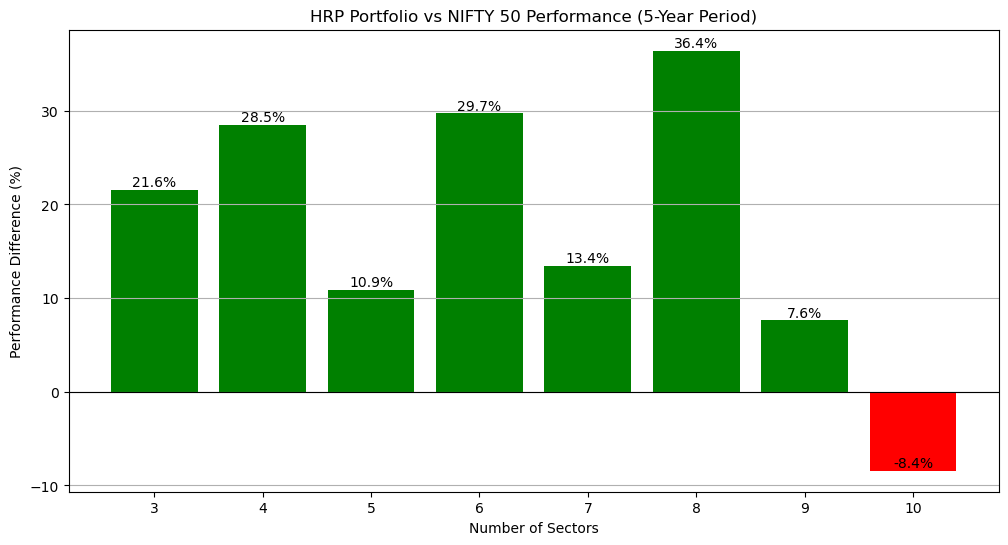


--- Investment Advice as of 2025-03-27 ---
Using training data from 2024-07-17 to 2025-03-26:

--- Top 3 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK')]
Recommended HRP Weights:
  ('^CNXSERVICE', '^CNXSERVICE'): 12.50%
  ('^CNXIT', '^CNXIT'): 50.00%
  ('^CNXPSUBANK', '^CNXPSUBANK'): 37.50%
------------------------------------------------------------
--- Top 4 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^NSEBANK', '^NSEBANK')]
Recommended HRP Weights:
  ('^CNXSERVICE', '^CNXSERVICE'): 10.53%
  ('^CNXIT', '^CNXIT'): 31.58%
  ('^CNXPSUBANK', '^CNXPSUBANK'): 10.53%
  ('^NSEBANK', '^NSEBANK'): 47.37%
------------------------------------------------------------
--- Top 5 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^NSEBANK', '^NSEB

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\458718468.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd

# =============================================================================
# 1. Data Download and Preprocessing
# =============================================================================
# Define sector tickers
sector_tickers = [
    "^CNXIT", "^CNXAUTO", "^NSEBANK", "^CNXFMCG", "^CNXMEDIA",
    "^CNXMETAL", "^CNXPSE", "^CNXMNC", "^CNXINFRA",
    "^CNXREALTY", "^CNXENERGY", "^CNXPSUBANK", "^CNXSERVICE"
]

# Define the time period (last 5 years)
end_date = datetime.today()
start_date = end_date - timedelta(days=5 * 365)

# Download data for each sector (using auto-adjusted prices)
data_dict = {}
for ticker in sector_tickers:
    df = yf.download(
        ticker,
        start=start_date,
        end=end_date,
        progress=False,
        auto_adjust=True
    )
    if not df.empty and 'Close' in df.columns:
        data_dict[ticker] = df['Close']
    else:
        print(f"Data for {ticker} is missing or incomplete.")

if not data_dict:
    raise ValueError("No sector data downloaded. Check ticker symbols or network connection.")

# Create a DataFrame with aligned dates and drop missing values
prices = pd.concat(data_dict, axis=1).dropna()
returns = prices.pct_change().dropna()

# =============================================================================
# 2. Correlation Analysis & Clustering for Diversification
# =============================================================================
# Compute the full correlation matrix of daily returns
correlation_matrix = returns.corr()
print("Correlation Matrix of Sector Returns (Last 5 Years):")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sector Returns")
plt.show()

# Use KMeans clustering to assign each sector a cluster (using the correlation row as a feature vector)
# (We choose 3 clusters here; adjust as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
sector_features = correlation_matrix.values  # each row represents a sector's correlation with all sectors
sector_labels = kmeans.fit_predict(sector_features)
# Map each ticker to its cluster label
sector_cluster_map = dict(zip(correlation_matrix.columns, sector_labels))
print("\nSector Cluster Mapping (for Diversification):")
for sector, cluster in sector_cluster_map.items():
    print(f"  {sector}: Cluster {cluster}")

# =============================================================================
# 3. HRP Weight Calculation Function (with Numerical Stability Fixes)
# =============================================================================
def get_hrp_weights(returns_df):
    """
    Calculate Hierarchical Risk Parity (HRP) weights.
    Steps:
      1. Compute the correlation matrix and force symmetry.
      2. Compute a distance matrix based on correlation.
      3. Use hierarchical clustering (Ward method) to order assets.
      4. Recursively allocate weights.
    """
    # If only one asset is present, assign full weight and exit early.
    if returns_df.shape[1] < 2:
        return pd.Series(1.0, index=returns_df.columns)
    
    # Compute correlation matrix and fill NaNs with 0
    corr = returns_df.corr().fillna(0)
    # Force symmetry and set the diagonal to 1
    corr = 0.5 * (corr + corr.T)
    np.fill_diagonal(corr.values, 1.0)
    
    # Convert correlation to a distance metric
    dist = np.sqrt(np.clip(0.5 * (1 - corr), 0.0, 1.0))
    dist = 0.5 * (dist + dist.T)  # Ensure symmetry
    
    # Safeguard: Replace any non-finite values in the distance matrix with 0.
    dist = np.nan_to_num(dist, nan=0.0, posinf=0.0, neginf=0.0)
    
    # Convert to condensed distance matrix and perform hierarchical clustering
    condensed_dist = ssd.squareform(dist, checks=False)
    link = sch.linkage(condensed_dist, method='ward')
    
    # Get the order of tickers from the dendrogram leaves
    sorted_indices = sch.leaves_list(link)
    ordered_tickers = returns_df.columns[sorted_indices]
    
    # Initialize weights equally
    weights = pd.Series(1, index=ordered_tickers)
    cluster_sizes = pd.Series(1, index=ordered_tickers)
    
    # Recursive weight allocation across the ordered list
    for i in range(len(ordered_tickers) - 1):
        left, right = ordered_tickers[i], ordered_tickers[i+1]
        total_size = cluster_sizes[left] + cluster_sizes[right]
        weights[left] *= cluster_sizes[right] / total_size
        weights[right] *= cluster_sizes[left] / total_size
        cluster_sizes[left] = total_size
        cluster_sizes[right] = total_size
    
    # Normalize weights to sum to 1
    return weights / weights.sum()

# =============================================================================
# 4. Diversified Sector Selection Function
# =============================================================================
def select_diversified_sectors(sharpe_scores, n, cluster_map):
    """
    Select top-n sectors based on Sharpe ratio while ensuring diversification
    across correlation clusters.
    
    Parameters:
      sharpe_scores: pd.Series with sector Sharpe ratios.
      n: number of sectors to select.
      cluster_map: dict mapping sector -> cluster label.
      
    Returns:
      List of selected sector tickers.
    """
    # Sort sectors by Sharpe descending
    sorted_sectors = sharpe_scores.sort_values(ascending=False).index.tolist()
    
    # First, select one representative per unique cluster.
    unique_selected = []
    used_clusters = set()
    for s in sorted_sectors:
        if cluster_map[s] not in used_clusters:
            unique_selected.append(s)
            used_clusters.add(cluster_map[s])
    
    # If the unique selection is less than n, fill remaining spots from sorted order.
    selected = unique_selected.copy()
    for s in sorted_sectors:
        if len(selected) >= n:
            break
        if s not in selected:
            selected.append(s)
    
    return selected[:n]

# =============================================================================
# 5. Quarterly Rebalancing Simulation with HRP and Diversification
# =============================================================================
print("\n--- HRP-Weighted Quarterly Rebalancing with Diversified Sector Selection ---\n")
quarter_end_dates = pd.date_range(start=prices.index[0], end=prices.index[-1], freq='Q')
initial_capital = 100000
results_summary = []       # Summary of simulation results for each top-n selection
all_quarterly_results = {} # Detailed quarterly results for each top-n selection

# Loop over different top-n sector selections (e.g., n = 3, 4, ..., 10)
for n in range(3, 11):
    cumulative_value = initial_capital
    quarterly_returns = []  # Store return for each quarter
    quarterly_results = []  # Detailed quarterly log

    print(f"\n===== Simulating for Top {n} Sectors =====\n")
    
    for i, q_end in enumerate(quarter_end_dates):
        # Define the quarter period (from previous quarter end + 1 day to current quarter end)
        q_start = prices.index[0] if i == 0 else quarter_end_dates[i-1] + pd.Timedelta(days=1)
        if q_start >= prices.index[-1]:
            break
        
        # Use roughly 1 year of data prior to q_start as training data
        training_end = q_start - pd.Timedelta(days=1)
        training_prices = prices[prices.index <= training_end]
        if training_prices.empty:
            continue
        training_returns = training_prices.pct_change().dropna()
        if training_returns.empty:
            continue
        
        # Compute Sharpe ratios (mean/volatility) for training period
        sharpe_scores = training_returns.mean() / training_returns.std()
        
        # Select sectors using diversified selection (ensuring different correlation clusters)
        selected_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
        if len(selected_sectors) == 0:
            continue
        
        # Compute HRP weights for the selected sectors using the training data
        selected_training_returns = training_returns[selected_sectors]
        hrp_weights = get_hrp_weights(selected_training_returns)
        
        # Get prices for the current quarter period for the selected sectors
        period_prices = prices.loc[(prices.index >= q_start) & (prices.index <= q_end), selected_sectors]
        if period_prices.empty or len(period_prices) < 2:
            continue
        
        # Compute period returns from the first to the last day in the quarter
        start_prices = period_prices.iloc[0]
        end_prices = period_prices.iloc[-1]
        sector_period_returns = (end_prices / start_prices) - 1
        
        # Calculate portfolio return using the HRP weights
        portfolio_return = np.dot(hrp_weights.loc[selected_sectors], sector_period_returns)
        cumulative_value *= (1 + portfolio_return)
        quarterly_returns.append(portfolio_return)
        
        # Store quarterly results for analysis
        quarterly_results.append({
            'quarter_start': q_start,
            'quarter_end': q_end,
            'selected_sectors': selected_sectors,
            'hrp_weights': hrp_weights.to_dict(),
            'portfolio_return': portfolio_return,
            'sector_returns': sector_period_returns.to_dict(),
            'cumulative_value': cumulative_value
        })
        
        # Print quarterly details
        print(f"Quarter {q_start.date()} to {q_end.date()}:")
        print(f"  Selected Sectors: {selected_sectors}")
        print("  HRP Weights:")
        for sector in selected_sectors:
            print(f"    {sector}: {hrp_weights[sector]:.2%}")
        print(f"  Portfolio Return: {portfolio_return:.2%}")
        print(f"  Cumulative Value: ₹{cumulative_value:,.2f}")
        print("-" * 80)
    
    annualized_vol = np.std(quarterly_returns) * np.sqrt(4) if len(quarterly_returns) > 1 else np.nan

    results_summary.append({
        'Number of Sectors': n,
        'HRP Portfolio Value': cumulative_value,
        'Annualized Volatility': annualized_vol
    })
    all_quarterly_results[n] = quarterly_results

hrp_results_df = pd.DataFrame(results_summary)
print("\n=== Simulation Summary for HRP Portfolios (Top N Sectors) ===")
print(hrp_results_df)

# =============================================================================
# 6. Fixed Benchmark Analysis (NIFTY 50)
# =============================================================================
benchmark_ticker = "^NSEI"
# Define multiple time periods for benchmark performance (1 to 10 years)
time_periods = {f"{i} Years": end_date - timedelta(days=365 * i) for i in range(1, 11)}
initial_capital_bench = 100000
benchmark_results = []

benchmark_data = yf.download(
    benchmark_ticker,
    start=min(time_periods.values()),
    end=end_date,
    progress=False,
    auto_adjust=True
)

if benchmark_data.empty:
    raise ValueError("No benchmark data downloaded. Check the ticker or network connection.")

benchmark_series = benchmark_data['Close'].squeeze()

for period, start_dt in time_periods.items():
    filtered_data = benchmark_series[benchmark_series.index >= pd.Timestamp(start_dt)]
    if len(filtered_data) < 2:
        continue
    
    start_price = float(filtered_data.iloc[0])
    end_price = float(filtered_data.iloc[-1])
    total_return = (end_price / start_price) - 1
    num_years = int(period.split()[0])
    cagr = ((1 + total_return) ** (1/num_years)) - 1
    final_value = initial_capital_bench * (1 + total_return)
    
    benchmark_results.append({
        'Time Period': period,
        'Total Return (%)': round(total_return * 100, 2),
        'CAGR (%)': round(cagr * 100, 2),
        'Final Portfolio Value': round(final_value, 2)
    })

benchmark_results_df = pd.DataFrame(benchmark_results)
print("\n=== NIFTY 50 Benchmark Performance ===")
print(benchmark_results_df.to_string(index=False))

# For final performance comparison, use the 5-year benchmark result
bench_5yr = benchmark_results_df[benchmark_results_df["Time Period"] == "5 Years"]
if bench_5yr.empty:
    raise ValueError("5-Year benchmark data not available.")
nifty_5yr_final = float(bench_5yr.iloc[0]['Final Portfolio Value'])

comparison_df = hrp_results_df.copy()
comparison_df['NIFTY Value'] = nifty_5yr_final
comparison_df['Outperformance (%)'] = (
    (comparison_df['HRP Portfolio Value'] - nifty_5yr_final) 
    / nifty_5yr_final 
    * 100
).round(2)

print("\n=== Final Performance Comparison (5-Year Period) ===")
print(comparison_df[['Number of Sectors', 
                     'HRP Portfolio Value', 
                     'NIFTY Value', 
                     'Outperformance (%)']].to_string(index=False))

# Plot performance difference between HRP portfolio and NIFTY
plt.figure(figsize=(12, 6))
bars = plt.bar(
    comparison_df['Number of Sectors'], 
    comparison_df['Outperformance (%)'],
    color=np.where(comparison_df['Outperformance (%)'] > 0, 'g', 'r')
)
plt.title("HRP Portfolio vs NIFTY 50 Performance (5-Year Period)")
plt.xlabel("Number of Sectors")
plt.ylabel("Performance Difference (%)")
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')
plt.show()

# =============================================================================
# 7. Investment Advice Based on Last 1 Year Data
# =============================================================================
advice_date = datetime.today()
advice_training_end = advice_date - timedelta(days=1)
# Use one year (approximately 252 trading days) of data for advice
advice_training_start = advice_training_end - timedelta(days=252)
if advice_training_start < prices.index[0]:
    advice_training_start = prices.index[0]

advice_training_prices = prices.loc[advice_training_start:advice_training_end].ffill()
advice_training_returns = advice_training_prices.pct_change().dropna()

print(f"\n--- Investment Advice as of {advice_date.date()} ---")
print(f"Using training data from {advice_training_start.date()} to {advice_training_end.date()}:\n")

for n in range(3, 11):
    sharpe_scores = advice_training_returns.mean() / advice_training_returns.std()
    # Use diversified selection for recommendation
    top_n_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
    if not top_n_sectors:
        continue
    selected_training_returns = advice_training_returns[top_n_sectors]
    hrp_weights = get_hrp_weights(selected_training_returns)
    print(f"--- Top {n} Sectors Recommendation ---")
    print("Selected Sectors:", top_n_sectors)
    print("Recommended HRP Weights:")
    for sector in top_n_sectors:
        print(f"  {sector}: {hrp_weights[sector]:.2%}")
    print("-" * 60)

Enter the number of years for simulation (1-10):  8



Correlation Matrix of Sector Returns (Last 8 Years):
                           ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG ^CNXMEDIA  \
Ticker                     ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG ^CNXMEDIA   
            Ticker                                                          
^CNXIT      ^CNXIT       1.000000  0.410356  0.383442  0.399837  0.334166   
^CNXAUTO    ^CNXAUTO     0.410356  1.000000  0.680849  0.553891  0.554550   
^NSEBANK    ^NSEBANK     0.383442  0.680849  1.000000  0.506871  0.487084   
^CNXFMCG    ^CNXFMCG     0.399837  0.553891  0.506871  1.000000  0.389833   
^CNXMEDIA   ^CNXMEDIA    0.334166  0.554550  0.487084  0.389833  1.000000   
^CNXMETAL   ^CNXMETAL    0.388118  0.628624  0.589639  0.428421  0.533553   
^CNXPSE     ^CNXPSE      0.331604  0.612074  0.574215  0.433976  0.542581   
^CNXMNC     ^CNXMNC      0.490225  0.805175  0.676937  0.756103  0.571612   
^CNXINFRA   ^CNXINFRA    0.456825  0.749152  0.733428  0.582568  0.578939   
^CNXREALTY  ^CNXREALTY

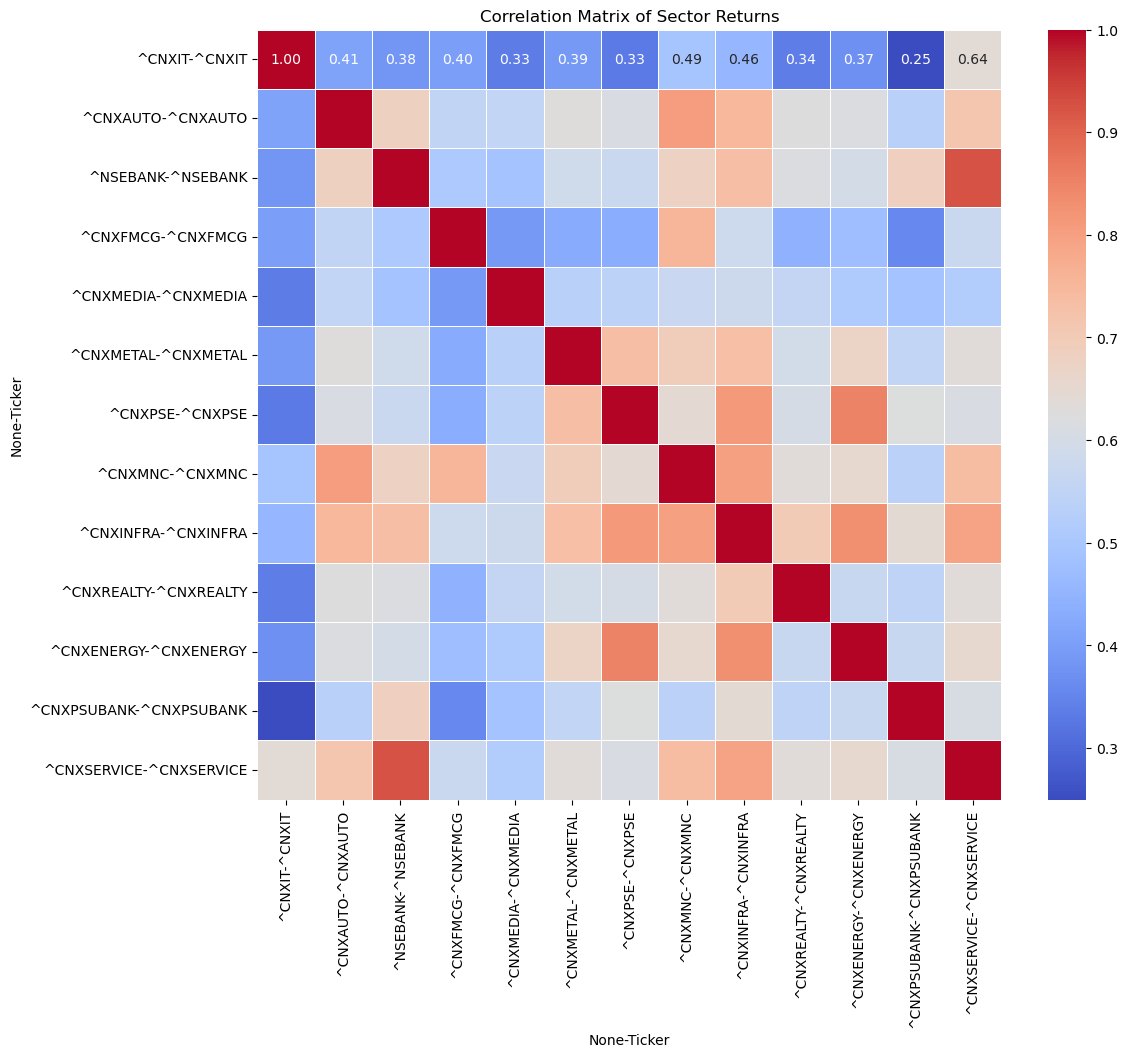

C:\Users\sarda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_2471


Sector Cluster Mapping (for Diversification):
  ('^CNXIT', '^CNXIT'): Cluster 2
  ('^CNXAUTO', '^CNXAUTO'): Cluster 1
  ('^NSEBANK', '^NSEBANK'): Cluster 1
  ('^CNXFMCG', '^CNXFMCG'): Cluster 1
  ('^CNXMEDIA', '^CNXMEDIA'): Cluster 0
  ('^CNXMETAL', '^CNXMETAL'): Cluster 1
  ('^CNXPSE', '^CNXPSE'): Cluster 1
  ('^CNXMNC', '^CNXMNC'): Cluster 1
  ('^CNXINFRA', '^CNXINFRA'): Cluster 1
  ('^CNXREALTY', '^CNXREALTY'): Cluster 0
  ('^CNXENERGY', '^CNXENERGY'): Cluster 1
  ('^CNXPSUBANK', '^CNXPSUBANK'): Cluster 0
  ('^CNXSERVICE', '^CNXSERVICE'): Cluster 1

--- HRP-Weighted Quarterly Rebalancing with Diversified Sector Selection ---


===== Simulating for Top 3 Sectors =====

Quarter 2017-04-01 to 2017-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMEDIA', '^CNXMEDIA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 12.50%
    ('^CNXAUTO', '^CNXAUTO'): 50.00%
    ('^CNXMEDIA', '^CNXMEDIA'): 37.50%
  Portfolio Return: 0.53%
  Cumulative Value: ₹100,534.45
------

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-04-01 to 2019-06-30:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXSERVICE', '^CNXSERVICE'): 12.50%
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
  Portfolio Return: 4.00%
  Cumulative Value: ₹126,080.96
--------------------------------------------------------------------------------
Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXSERVICE', '^CNXSERVICE'): 12.50%
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
  Portfolio Return: -7.16%
  Cumulative Value: ₹117,053.13
--------------------------------------------------------------------------------
Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXSERVICE', '^CNX

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXSERVICE', '^CNXSERVICE'): 12.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
  Portfolio Return: 2.06%
  Cumulative Value: ₹247,111.70
--------------------------------------------------------------------------------
Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXSERVICE', '^CNXSERVICE'): 12.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
  Portfolio Return: -5.67%
  Cumulative Value: ₹233,097.56
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 3

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 12.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Portfolio Return: 5.85%
  Cumulative Value: ₹377,847.77
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 12.50%
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
  Portfolio Return: -3.07%
  Cumulative Value: ₹366,236.52
--------------------------------------------------------------------------------

===== Simulating for Top 4 Sectors =====

Quarter 2017-04-01 to 2017-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMEDIA', '^CNXMEDIA'), ('^NSEBANK', '^NSEBANK')]
  HRP Weigh

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXSERVICE', '^CNXSERVICE'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^NSEBANK', '^NSEBANK'): 47.37%
  Portfolio Return: 9.48%
  Cumulative Value: ₹130,016.77
--------------------------------------------------------------------------------
Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXSERVICE', '^CNXSERVICE'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^NSEBANK', '^NSEBANK'): 47.37%
  Portfolio Return: -33.16%
  Cumulative Value: ₹86,906.46
--------------------------------------------------------------------------------
Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors:

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXENERGY', '^CNXENERGY'): 10.53%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXSERVICE', '^CNXSERVICE'): 47.37%
  Portfolio Return: 4.71%
  Cumulative Value: ₹159,204.82
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXENERGY', '^CNXENERGY'): 10.53%
    ('^CNXREALTY', '^CNXREALTY'): 47.37%
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
  Portfolio Return: 4.16%
  Cumulative Value: ₹165,832.90
--------------------------------------------------------------------------------
Quarter 2023-01-01 to 2023-03-31:
  Selected Secto

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXFMCG', '^CNXFMCG'): 9.35%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 8.41%
    ('^CNXSERVICE', '^CNXSERVICE'): 44.86%
  Portfolio Return: 20.36%
  Cumulative Value: ₹98,653.42
--------------------------------------------------------------------------------
Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXENERGY', '^CNXENERGY'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 44.86%
  Portfolio Return: 13.63%
  Cumulative Value: ₹112,100.73
--------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXENERGY', '^CNXENERGY'): 8.41%
    ('^CNXREALTY', '^CNXREALTY'): 44.86%
    ('^CNXFMCG', '^CNXFMCG'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 9.35%
  Portfolio Return: 3.93%
  Cumulative Value: ₹166,446.48
--------------------------------------------------------------------------------
Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXENERGY', '^CNXENERGY'): 8.41%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXSERVICE', '^CNXSERVICE'): 44.86%
    ('^CNXFMCG', '^CNXFMCG'): 9.35%
  Portfolio Return: -5.16%
  Cumulative Value: ₹157,862.92
--------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^NSEBANK', '^NSEBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 8.55%
    ('^CNXREALTY', '^CNXREALTY'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^NSEBANK', '^NSEBANK'): 8.55%
    ('^CNXENERGY', '^CNXENERGY'): 42.74%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.69%
  Portfolio Return: 10.90%
  Cumulative Value: ₹115,254.79
--------------------------------------------------------------------------------
Quarter 2018-01-01 to 2018-03-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 8.55%
    ('^CNXREALTY', '^CNXREALTY'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXENERGY', '^CNXENERGY'): 42.74%
    ('^CNXSERVICE'

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.84%
    ('^CNXREALTY', '^CNXREALTY'): 7.69%
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXMNC', '^CNXMNC'): 8.55%
    ('^CNXENERGY', '^CNXENERGY'): 42.74%
  Portfolio Return: 4.22%
  Cumulative Value: ₹142,640.43
--------------------------------------------------------------------------------
Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.84%
    ('^CNXREALTY', '^CNXREALTY'): 7.69%
    ('^CNXMNC', '^CNXMNC'): 8.55%
    ('^CNXENERGY',

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXREALTY', '^CNXREALTY'): 7.69%
    ('^CNXMNC', '^CNXMNC'): 8.55%
    ('^CNXENERGY', '^CNXENERGY'): 6.84%
    ('^CNXSERVICE', '^CNXSERVICE'): 42.74%
  Portfolio Return: 13.82%
  Cumulative Value: ₹211,754.15
--------------------------------------------------------------------------------
Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXREALTY', '^CNXREALTY'): 7.69%
    ('^CNXENERGY', '^CNXENERGY'): 6.84%
    ('^CNXMNC', '^CNX

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-04-01 to 2018-06-30:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 5.69%
    ('^CNXREALTY', '^CNXREALTY'): 7.96%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.17%
    ('^CNXENERGY', '^CNXENERGY'): 7.96%
    ('^NSEBANK', '^NSEBANK'): 6.37%
    ('^CNXAUTO', '^CNXAUTO'): 40.96%
  Portfolio Return: 1.62%
  Cumulative Value: ₹111,329.34
--------------------------------------------------------------------------------
Quarter 2018-07-01 to 2018-09-30:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 5.69%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXRE

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.96%
    ('^CNXREALTY', '^CNXREALTY'): 7.96%
    ('^CNXFMCG', '^CNXFMCG'): 5.69%
    ('^CNXMNC', '^CNXMNC'): 40.96%
    ('^CNXENERGY', '^CNXENERGY'): 6.37%
    ('^NSEBANK', '^NSEBANK'): 7.17%
  Portfolio Return: 3.30%
  Cumulative Value: ₹144,383.30
--------------------------------------------------------------------------------
Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.96%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXFMCG', '^CNXFMCG'): 7.96%
    ('^CNXREALTY', '^CNXREALTY'): 5.69%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.17%
    ('^CNXMNC', '^CNXMNC'): 7.96%
    ('^CNXENERGY', '^CNXENERGY'): 40.96%
    ('^NSEBANK', '^NSEBANK'): 6.37%
  Portfolio Return: 9.40%
  Cumulative Value: ₹174,629.21
--------------------------------------------------------------------------------
Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXFMCG', '^CNXFMCG'): 7.96%
    ('^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^NSEBANK', '^NSEBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXSERVICE', '^CNXSERVICE'): 6.01%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXREALTY', '^CNXREALTY'): 6.76%
    ('^NSEBANK', '^NSEBANK'): 5.37%
    ('^CNXFMCG', '^CNXFMCG'): 7.51%
    ('^CNXENERGY', '^CNXENERGY'): 7.51%
    ('^CNXMNC', '^CNXMNC'): 4.83%
    ('^CNXINFRA', '^CNXINFRA'): 39.45%
  Portfolio Return: 4.47%
  Cumulative Value: ₹131,587.39
--------------------------------------------------------------------------------
Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^NSEBANK', '^NSEBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA')]


C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.37%
    ('^CNXREALTY', '^CNXREALTY'): 6.76%
    ('^CNXMNC', '^CNXMNC'): 7.51%
    ('^CNXENERGY', '^CNXENERGY'): 4.83%
    ('^CNXFMCG', '^CNXFMCG'): 7.51%
    ('^CNXINFRA', '^CNXINFRA'): 39.45%
    ('^CNXMETAL', '^CNXMETAL'): 6.01%
  Portfolio Return: -1.32%
  Cumulative Value: ₹213,061.21
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXF

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXINFRA', '^CNXINFRA'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXFMCG', '^CNXFMCG'): 7.51%
    ('^CNXREALTY', '^CNXREALTY'): 5.37%
    ('^CNXMNC', '^CNXMNC'): 7.51%
    ('^CNXENERGY', '^CNXENERGY'): 4.83%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.76%
    ('^CNXINFRA', '^CNXINFRA'): 39.45%
    ('^NSEBANK', '^NSEBANK'): 6.01%
  Portfolio Return: 15.41%
  Cumulative Value: ₹261,390.65
--------------------------------------------------------------------------------
Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMETAL', '^CNXMETAL'

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-04-01 to 2018-06-30:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 5.11%
    ('^CNXREALTY', '^CNXREALTY'): 4.17%
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.16%
    ('^CNXENERGY', '^CNXENERGY'): 38.17%
    ('^NSEBANK', '^NSEBANK'): 6.44%
    ('^CNXAUTO', '^CNXAUTO'): 4.60%
    ('^CNXMETAL', '^CNXMETAL'): 5.72%
    ('^CNXFMCG', '^CNXFMCG'): 7.16%
  Portfolio Return: 3.44%
  Cumulative Value: ₹115,894.96
--------------------------------------------------------------------------------
Quarter 2018-07-01 to 2018-09-30:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXFMCG', '^CNXFMCG

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXFMCG', '^CNXFMCG'): 7.16%
    ('^CNXREALTY', '^CNXREALTY'): 7.16%
    ('^CNXMNC', '^CNXMNC'): 4.17%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.44%
    ('^CNXENERGY', '^CNXENERGY'): 5.11%
    ('^NSEBANK', '^NSEBANK'): 5.72%
    ('^CNXINFRA', '^CNXINFRA'): 38.17%
    ('^CNXMETAL', '^CNXMETAL'): 4.60%
  Portfolio Return: 25.89%
  Cumulative Value: ₹117,823.12
--------------------------------------------------------------------------------
Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXENERGY', '^CNXENERGY'): 4.60%
    ('^CNXREALTY', '^CNXREALTY'): 5.72%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.16%
    ('^CNXMNC', '^CNXMNC'): 4.17%
    ('^CNXMETAL', '^CNXMETAL'): 5.11%
    ('^CNXINFRA', '^CNXINFRA'): 38.17%
    ('^CNXFMCG', '^CNXFMCG'): 6.44%
    ('^NSEBANK', '^NSEBANK'): 7.16%
  Portfolio Return: -13.00%
  Cumulative Value: ₹182,928.95
--------------------------------------------------------------------------------
Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG',

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXINFRA', '^CNXINFRA'), ('^NSEBANK', '^NSEBANK'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXFMCG', '^CNXFMCG'): 7.16%
    ('^CNXREALTY', '^CNXREALTY'): 5.11%
    ('^CNXMNC', '^CNXMNC'): 7.16%
    ('^CNXENERGY', '^CNXENERGY'): 4.17%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.44%
    ('^CNXINFRA', '^CNXINFRA'): 38.17%
    ('^NSEBANK', '^NSEBANK'): 5.72%
    ('^CNXMETAL', '^CNXMETAL'): 4.60%
  Portfolio Return: 15.47%
  Cumulative Value: ₹273,851.42
--------------------------------------------------------------------------------
Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNX

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^NSEBANK', '^NSEBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 4.90%
    ('^CNXREALTY', '^CNXREALTY'): 6.86%
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^NSEBANK', '^NSEBANK'): 3.66%
    ('^CNXENERGY', '^CNXENERGY'): 6.18%
    ('^CNXSERVICE', '^CNXSERVICE'): 37.05%
    ('^CNXMETAL', '^CNXMETAL'): 5.49%
    ('^CNXAUTO', '^CNXAUTO'): 4.41%
    ('^CNXINFRA', '^CNXINFRA'): 4.00%
    ('^CNXFMCG', '^CNXFMCG'): 6.86%
  Portfolio Return: 9.83%
  Cumulative Value: ₹120,728.75
--------------------------------------------------------------------------------
Quarter 2018-01-01 to 2018-03-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY',

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^NSEBANK', '^NSEBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXPSUBANK', '^CNXPSUBANK')]
  HRP Weights:
    ('^CNXSERVICE', '^CNXSERVICE'): 6.86%
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^CNXREALTY', '^CNXREALTY'): 4.41%
    ('^NSEBANK', '^NSEBANK'): 6.18%
    ('^CNXENERGY', '^CNXENERGY'): 4.90%
    ('^CNXFMCG', '^CNXFMCG'): 5.49%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXINFRA', '^CNXINFRA'): 4.00%
    ('^CNXMETAL', '^CNXMETAL'): 37.05%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 6.86%
  Portfolio Return: -10.39%
  Cumulative Value: ₹120,230.34
--------------------------------------------------------------------------------
Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXRE

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMETAL', '^CNXMETAL'), ('^NSEBANK', '^NSEBANK'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.86%
    ('^CNXREALTY', '^CNXREALTY'): 6.86%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXENERGY', '^CNXENERGY'): 4.90%
    ('^CNXFMCG', '^CNXFMCG'): 5.49%
    ('^CNXMETAL', '^CNXMETAL'): 4.00%
    ('^NSEBANK', '^NSEBANK'): 6.18%
    ('^CNXINFRA', '^CNXINFRA'): 4.41%
    ('^CNXAUTO', '^CNXAUTO'): 37.05%
  Portfolio Return: 11.57%
  Cumulative Value: ₹188,154.96
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^CN

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^CNXFMCG', '^CNXFMCG'): 6.86%
    ('^CNXREALTY', '^CNXREALTY'): 4.41%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.49%
    ('^CNXMNC', '^CNXMNC'): 6.86%
    ('^CNXENERGY', '^CNXENERGY'): 3.66%
    ('^NSEBANK', '^NSEBANK'): 4.90%
    ('^CNXINFRA', '^CNXINFRA'): 37.05%
    ('^CNXMETAL', '^CNXMETAL'): 4.00%
    ('^CNXAUTO', '^CNXAUTO'): 6.18%
  Portfolio Return: 11.69%
  Cumulative Value: ₹201,367.69
--------------------------------------------------------------------------------
Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC',

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U


=== NIFTY 50 Benchmark Performance (8 Years) ===
Time Period  Total Return (%)  CAGR (%)  Final Portfolio Value
    8 Years            157.17     12.53               257168.0

=== Final Performance Comparison (8-Year Period) ===
 Number of Sectors  HRP Portfolio Value   NIFTY Value  Outperformance (%)
                 3        366236.518647 257167.998024               42.41
                 4        245028.495796 257167.998024               -4.72
                 5        243018.497260 257167.998024               -5.50
                 6        244714.999143 257167.998024               -4.84
                 7        249064.517738 257167.998024               -3.15
                 8        305657.698412 257167.998024               18.86
                 9        308564.422267 257167.998024               19.99
                10        272483.373014 257167.998024                5.96


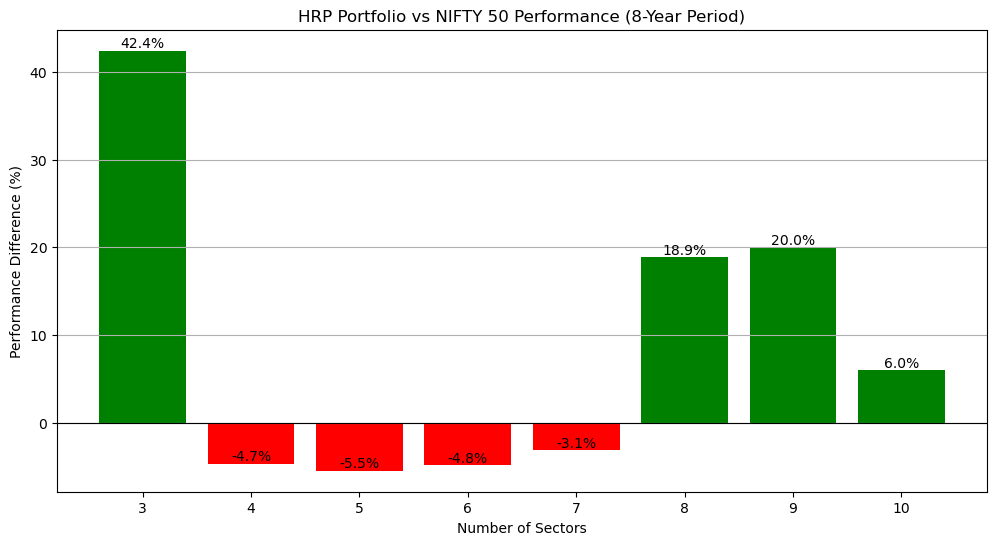


--- Investment Advice as of 2025-03-28 ---
Using training data from 2024-07-18 to 2025-03-27:

--- Top 3 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK')]
Recommended HRP Weights:
  ('^CNXSERVICE', '^CNXSERVICE'): 12.50%
  ('^CNXIT', '^CNXIT'): 50.00%
  ('^CNXPSUBANK', '^CNXPSUBANK'): 37.50%
------------------------------------------------------------
--- Top 4 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXMETAL', '^CNXMETAL')]
Recommended HRP Weights:
  ('^CNXSERVICE', '^CNXSERVICE'): 10.53%
  ('^CNXIT', '^CNXIT'): 47.37%
  ('^CNXPSUBANK', '^CNXPSUBANK'): 31.58%
  ('^CNXMETAL', '^CNXMETAL'): 10.53%
------------------------------------------------------------
--- Top 5 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXMETAL', '

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\3152814422.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

In [70]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd

# =============================================================================
# User Input: Number of Years for Simulation (between 1 and 10)
# =============================================================================
while True:
    try:
        num_years = int(input("Enter the number of years for simulation (1-10): "))
        if 1 <= num_years <= 10:
            break
        else:
            print("Please enter a number between 1 and 10.")
    except ValueError:
        print("Invalid input. Please enter an integer between 1 and 10.")

# =============================================================================
# 1. Data Download and Preprocessing
# =============================================================================
# Define sector tickers
sector_tickers = [
    "^CNXIT", "^CNXAUTO", "^NSEBANK", "^CNXFMCG", "^CNXMEDIA",
    "^CNXMETAL", "^CNXPSE", "^CNXMNC", "^CNXINFRA",
    "^CNXREALTY", "^CNXENERGY", "^CNXPSUBANK", "^CNXSERVICE"
]

# Define the time period based on user input
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * num_years)

# Download data for each sector (using auto-adjusted prices)
data_dict = {}
for ticker in sector_tickers:
    df = yf.download(
        ticker,
        start=start_date,
        end=end_date,
        progress=False,
        auto_adjust=True
    )
    if not df.empty and 'Close' in df.columns:
        data_dict[ticker] = df['Close']
    else:
        print(f"Data for {ticker} is missing or incomplete.")

if not data_dict:
    raise ValueError("No sector data downloaded. Check ticker symbols or network connection.")

# Create a DataFrame with aligned dates and drop missing values
prices = pd.concat(data_dict, axis=1).dropna()
returns = prices.pct_change().dropna()

# =============================================================================
# 2. Correlation Analysis & Clustering for Diversification
# =============================================================================
# Compute the full correlation matrix of daily returns
correlation_matrix = returns.corr()
print("\nCorrelation Matrix of Sector Returns (Last {} Years):".format(num_years))
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sector Returns")
plt.show()

# Use KMeans clustering to assign each sector a cluster (using the correlation row as a feature vector)
# (We choose 3 clusters here; adjust as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
sector_features = correlation_matrix.values  # each row represents a sector's correlations with all sectors
sector_labels = kmeans.fit_predict(sector_features)
# Map each ticker to its cluster label
sector_cluster_map = dict(zip(correlation_matrix.columns, sector_labels))
print("\nSector Cluster Mapping (for Diversification):")
for sector, cluster in sector_cluster_map.items():
    print(f"  {sector}: Cluster {cluster}")

# =============================================================================
# 3. HRP Weight Calculation Function (with Numerical Stability Fixes)
# =============================================================================
def get_hrp_weights(returns_df):
    """
    Calculate Hierarchical Risk Parity (HRP) weights.
    Steps:
      1. Compute the correlation matrix and force symmetry.
      2. Compute a distance matrix based on correlation.
      3. Use hierarchical clustering (Ward method) to order assets.
      4. Recursively allocate weights.
    """
    # If only one asset is present, assign full weight and exit early.
    if returns_df.shape[1] < 2:
        return pd.Series(1.0, index=returns_df.columns)
    
    # Compute correlation matrix and fill NaNs with 0
    corr = returns_df.corr().fillna(0)
    # Force symmetry and set the diagonal to 1
    corr = 0.5 * (corr + corr.T)
    np.fill_diagonal(corr.values, 1.0)
    
    # Convert correlation to a distance metric
    dist = np.sqrt(np.clip(0.5 * (1 - corr), 0.0, 1.0))
    dist = 0.5 * (dist + dist.T)  # Ensure symmetry
    
    # Safeguard: Replace any non-finite values in the distance matrix with 0.
    dist = np.nan_to_num(dist, nan=0.0, posinf=0.0, neginf=0.0)
    
    # Convert to condensed distance matrix and perform hierarchical clustering
    condensed_dist = ssd.squareform(dist, checks=False)
    link = sch.linkage(condensed_dist, method='ward')
    
    # Get the order of tickers from the dendrogram leaves
    sorted_indices = sch.leaves_list(link)
    ordered_tickers = returns_df.columns[sorted_indices]
    
    # Initialize weights equally
    weights = pd.Series(1, index=ordered_tickers)
    cluster_sizes = pd.Series(1, index=ordered_tickers)
    
    # Recursive weight allocation across the ordered list
    for i in range(len(ordered_tickers) - 1):
        left, right = ordered_tickers[i], ordered_tickers[i+1]
        total_size = cluster_sizes[left] + cluster_sizes[right]
        weights[left] *= cluster_sizes[right] / total_size
        weights[right] *= cluster_sizes[left] / total_size
        cluster_sizes[left] = total_size
        cluster_sizes[right] = total_size
    
    # Normalize weights to sum to 1
    return weights / weights.sum()

# =============================================================================
# 4. Diversified Sector Selection Function
# =============================================================================
def select_diversified_sectors(sharpe_scores, n, cluster_map):
    """
    Select top-n sectors based on Sharpe ratio while ensuring diversification
    across correlation clusters.
    
    Parameters:
      sharpe_scores: pd.Series with sector Sharpe ratios.
      n: number of sectors to select.
      cluster_map: dict mapping sector -> cluster label.
      
    Returns:
      List of selected sector tickers.
    """
    # Sort sectors by Sharpe descending
    sorted_sectors = sharpe_scores.sort_values(ascending=False).index.tolist()
    
    # First, select one representative per unique cluster.
    unique_selected = []
    used_clusters = set()
    for s in sorted_sectors:
        if cluster_map[s] not in used_clusters:
            unique_selected.append(s)
            used_clusters.add(cluster_map[s])
    
    # If the unique selection is less than n, fill remaining spots from sorted order.
    selected = unique_selected.copy()
    for s in sorted_sectors:
        if len(selected) >= n:
            break
        if s not in selected:
            selected.append(s)
    
    return selected[:n]

# =============================================================================
# 5. Quarterly Rebalancing Simulation with HRP and Diversification
# =============================================================================
print("\n--- HRP-Weighted Quarterly Rebalancing with Diversified Sector Selection ---\n")
quarter_end_dates = pd.date_range(start=prices.index[0], end=prices.index[-1], freq='Q')
initial_capital = 100000
results_summary = []       # Summary of simulation results for each top-n selection
all_quarterly_results = {} # Detailed quarterly results for each top-n selection

# Loop over different top-n sector selections (e.g., n = 3, 4, ..., 10)
for n in range(3, 11):
    cumulative_value = initial_capital
    quarterly_returns = []  # Store return for each quarter
    quarterly_results = []  # Detailed quarterly log

    print(f"\n===== Simulating for Top {n} Sectors =====\n")
    
    for i, q_end in enumerate(quarter_end_dates):
        # Define the quarter period (from previous quarter end + 1 day to current quarter end)
        q_start = prices.index[0] if i == 0 else quarter_end_dates[i-1] + pd.Timedelta(days=1)
        if q_start >= prices.index[-1]:
            break
        
        # Use roughly 1 year of data prior to q_start as training data
        training_end = q_start - pd.Timedelta(days=1)
        training_prices = prices[prices.index <= training_end]
        if training_prices.empty:
            continue
        training_returns = training_prices.pct_change().dropna()
        if training_returns.empty:
            continue
        
        # Compute Sharpe ratios (mean/volatility) for training period
        sharpe_scores = training_returns.mean() / training_returns.std()
        
        # Select sectors using diversified selection (ensuring different correlation clusters)
        selected_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
        if len(selected_sectors) == 0:
            continue
        
        # Compute HRP weights for the selected sectors using the training data
        selected_training_returns = training_returns[selected_sectors]
        hrp_weights = get_hrp_weights(selected_training_returns)
        
        # Get prices for the current quarter period for the selected sectors
        period_prices = prices.loc[(prices.index >= q_start) & (prices.index <= q_end), selected_sectors]
        if period_prices.empty or len(period_prices) < 2:
            continue
        
        # Compute period returns from the first to the last day in the quarter
        start_prices = period_prices.iloc[0]
        end_prices = period_prices.iloc[-1]
        sector_period_returns = (end_prices / start_prices) - 1
        
        # Calculate portfolio return using the HRP weights
        portfolio_return = np.dot(hrp_weights.loc[selected_sectors], sector_period_returns)
        cumulative_value *= (1 + portfolio_return)
        quarterly_returns.append(portfolio_return)
        
        # Store quarterly results for analysis
        quarterly_results.append({
            'quarter_start': q_start,
            'quarter_end': q_end,
            'selected_sectors': selected_sectors,
            'hrp_weights': hrp_weights.to_dict(),
            'portfolio_return': portfolio_return,
            'sector_returns': sector_period_returns.to_dict(),
            'cumulative_value': cumulative_value
        })
        
        # Print quarterly details
        print(f"Quarter {q_start.date()} to {q_end.date()}:")
        print(f"  Selected Sectors: {selected_sectors}")
        print("  HRP Weights:")
        for sector in selected_sectors:
            print(f"    {sector}: {hrp_weights[sector]:.2%}")
        print(f"  Portfolio Return: {portfolio_return:.2%}")
        print(f"  Cumulative Value: ₹{cumulative_value:,.2f}")
        print("-" * 80)
    
    annualized_vol = np.std(quarterly_returns) * np.sqrt(4) if len(quarterly_returns) > 1 else np.nan

    results_summary.append({
        'Number of Sectors': n,
        'HRP Portfolio Value': cumulative_value,
        'Annualized Volatility': annualized_vol
    })
    all_quarterly_results[n] = quarterly_results

hrp_results_df = pd.DataFrame(results_summary)
print("\n=== Simulation Summary for HRP Portfolios (Top N Sectors) ===")
print(hrp_results_df)

# =============================================================================
# 6. Fixed Benchmark Analysis (NIFTY 50)
# =============================================================================
benchmark_ticker = "^NSEI"
# Define benchmark performance for the chosen period only
initial_capital_bench = 100000
benchmark_results = []

benchmark_data = yf.download(
    benchmark_ticker,
    start=start_date,
    end=end_date,
    progress=False,
    auto_adjust=True
)

if benchmark_data.empty:
    raise ValueError("No benchmark data downloaded. Check the ticker or network connection.")

benchmark_series = benchmark_data['Close'].squeeze()

# Calculate benchmark performance for the chosen period
filtered_data = benchmark_series[benchmark_series.index >= pd.Timestamp(start_date)]
if len(filtered_data) < 2:
    raise ValueError("Not enough benchmark data for the selected period.")

start_price = float(filtered_data.iloc[0])
end_price = float(filtered_data.iloc[-1])
total_return = (end_price / start_price) - 1
cagr = ((1 + total_return) ** (1/num_years)) - 1
final_value = initial_capital_bench * (1 + total_return)

benchmark_results.append({
    'Time Period': f"{num_years} Years",
    'Total Return (%)': round(total_return * 100, 2),
    'CAGR (%)': round(cagr * 100, 2),
    'Final Portfolio Value': round(final_value, 2)
})

benchmark_results_df = pd.DataFrame(benchmark_results)
print("\n=== NIFTY 50 Benchmark Performance ({} Years) ===".format(num_years))
print(benchmark_results_df.to_string(index=False))

# For final performance comparison, use the benchmark result for the chosen period
nifty_final = final_value

comparison_df = hrp_results_df.copy()
comparison_df['NIFTY Value'] = nifty_final
comparison_df['Outperformance (%)'] = (
    (comparison_df['HRP Portfolio Value'] - nifty_final) 
    / nifty_final 
    * 100
).round(2)

print("\n=== Final Performance Comparison ({}-Year Period) ===".format(num_years))
print(comparison_df[['Number of Sectors', 
                     'HRP Portfolio Value', 
                     'NIFTY Value', 
                     'Outperformance (%)']].to_string(index=False))

# Plot performance difference between HRP portfolio and NIFTY
plt.figure(figsize=(12, 6))
bars = plt.bar(
    comparison_df['Number of Sectors'], 
    comparison_df['Outperformance (%)'],
    color=np.where(comparison_df['Outperformance (%)'] > 0, 'g', 'r')
)
plt.title("HRP Portfolio vs NIFTY 50 Performance ({}-Year Period)".format(num_years))
plt.xlabel("Number of Sectors")
plt.ylabel("Performance Difference (%)")
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')
plt.show()

# =============================================================================
# 7. Investment Advice Based on Last 1 Year Data
# =============================================================================
advice_date = datetime.today()
advice_training_end = advice_date - timedelta(days=1)
# Use one year (approximately 252 trading days) of data for advice
advice_training_start = advice_training_end - timedelta(days=252)
if advice_training_start < prices.index[0]:
    advice_training_start = prices.index[0]

advice_training_prices = prices.loc[advice_training_start:advice_training_end].ffill()
advice_training_returns = advice_training_prices.pct_change().dropna()

print(f"\n--- Investment Advice as of {advice_date.date()} ---")
print(f"Using training data from {advice_training_start.date()} to {advice_training_end.date()}:\n")

for n in range(3, 11):
    sharpe_scores = advice_training_returns.mean() / advice_training_returns.std()
    # Use diversified selection for recommendation
    top_n_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
    if not top_n_sectors:
        continue
    selected_training_returns = advice_training_returns[top_n_sectors]
    hrp_weights = get_hrp_weights(selected_training_returns)
    print(f"--- Top {n} Sectors Recommendation ---")
    print("Selected Sectors:", top_n_sectors)
    print("Recommended HRP Weights:")
    for sector in top_n_sectors:
        print(f"  {sector}: {hrp_weights[sector]:.2%}")
    print("-" * 60)

In [72]:
#cutting losses

Enter the number of years for simulation (1-10):  10



Correlation Matrix of Sector Returns (Last 10 Years):
                           ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG ^CNXMEDIA  \
Ticker                     ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG ^CNXMEDIA   
            Ticker                                                          
^CNXIT      ^CNXIT       1.000000  0.362732  0.344473  0.378217  0.309534   
^CNXAUTO    ^CNXAUTO     0.362732  1.000000  0.693794  0.541680  0.570127   
^NSEBANK    ^NSEBANK     0.344473  0.693794  1.000000  0.500890  0.503232   
^CNXFMCG    ^CNXFMCG     0.378217  0.541680  0.500890  1.000000  0.390580   
^CNXMEDIA   ^CNXMEDIA    0.309534  0.570127  0.503232  0.390580  1.000000   
^CNXMETAL   ^CNXMETAL    0.169610  0.594639  0.541035  0.343302  0.490742   
^CNXPSE     ^CNXPSE      0.251646  0.635626  0.593215  0.423059  0.555613   
^CNXMNC     ^CNXMNC      0.468443  0.798093  0.680898  0.745965  0.576576   
^CNXINFRA   ^CNXINFRA    0.443797  0.740420  0.731012  0.575500  0.578656   
^CNXREALTY  ^CNXREALT

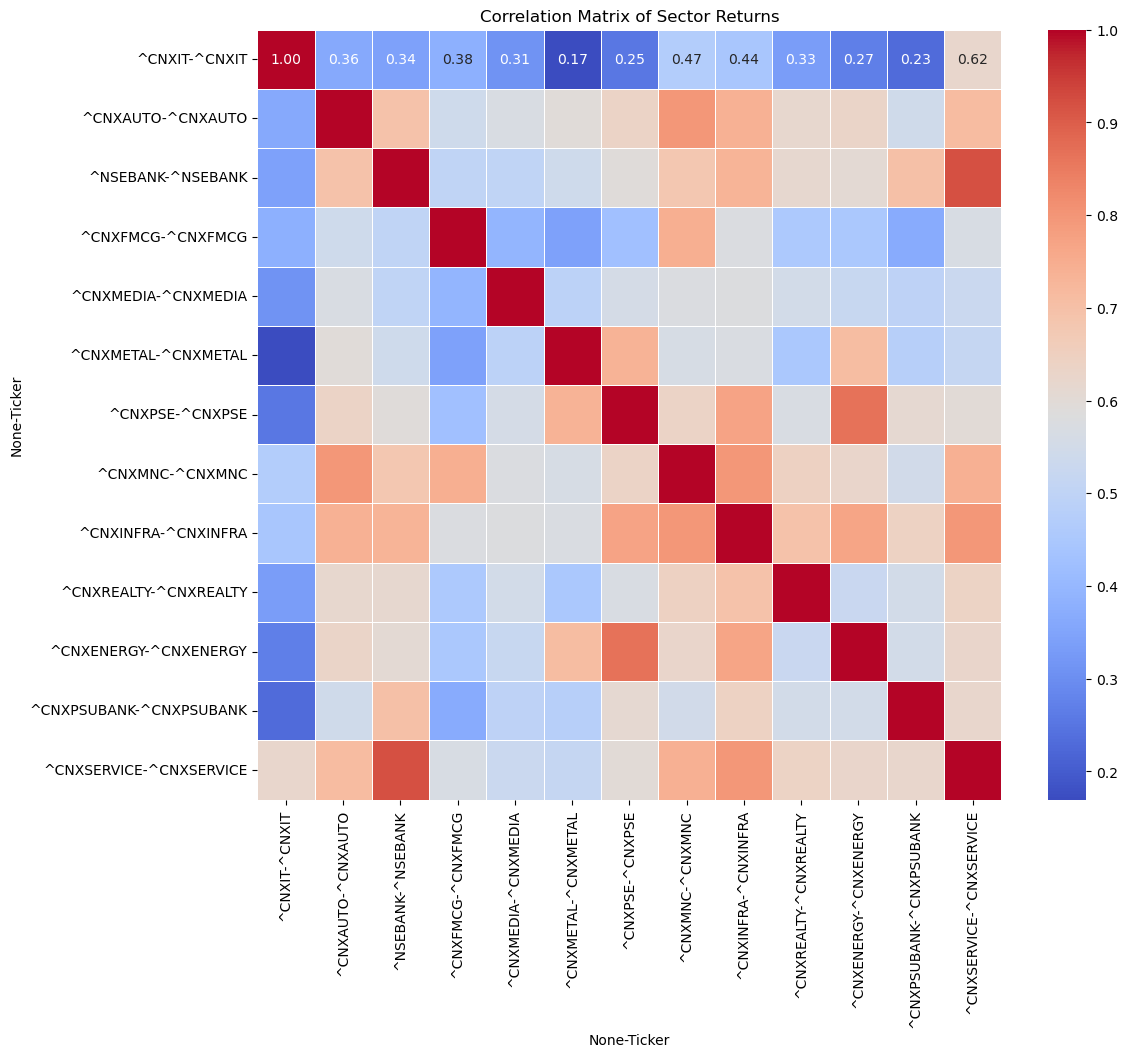

C:\Users\sarda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_2471


Sector Cluster Mapping (for Diversification):
  ('^CNXIT', '^CNXIT'): Cluster 2
  ('^CNXAUTO', '^CNXAUTO'): Cluster 1
  ('^NSEBANK', '^NSEBANK'): Cluster 1
  ('^CNXFMCG', '^CNXFMCG'): Cluster 1
  ('^CNXMEDIA', '^CNXMEDIA'): Cluster 0
  ('^CNXMETAL', '^CNXMETAL'): Cluster 0
  ('^CNXPSE', '^CNXPSE'): Cluster 1
  ('^CNXMNC', '^CNXMNC'): Cluster 1
  ('^CNXINFRA', '^CNXINFRA'): Cluster 1
  ('^CNXREALTY', '^CNXREALTY'): Cluster 1
  ('^CNXENERGY', '^CNXENERGY'): Cluster 1
  ('^CNXPSUBANK', '^CNXPSUBANK'): Cluster 0
  ('^CNXSERVICE', '^CNXSERVICE'): Cluster 1

--- Quarterly Rebalancing Simulation with Enhanced Risk Management ---


===== Simulating for Top 3 Sectors =====

Quarter 2015-07-01 to 2015-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 12.50%
    ('^CNXMEDIA', '^CNXMEDIA'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 4.33%
  STOPLOSS Triggered: Capped Ret

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2016-10-01 to 2016-12-31:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXMEDIA', '^CNXMEDIA'): 12.50%
    ('^CNXFMCG', '^CNXFMCG'): 37.50%
    ('^CNXIT', '^CNXIT'): 50.00%
  Raw Portfolio Return: 3.01%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 3.01%
  Cumulative Value: ₹100,182.04
--------------------------------------------------------------------------------
Quarter 2017-01-01 to 2017-03-31:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXMEDIA', '^CNXMEDIA'): 12.50%
    ('^CNXENERGY', '^CNXENERGY'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 9.46%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 4.73%
  Cumulative Value: ₹104,920.03
--------------------------------------------------------------------------------
Quarter 2017-04-01 to 2017-06-30:
  Se

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2017-07-01 to 2017-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 12.50%
    ('^CNXMEDIA', '^CNXMEDIA'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: -0.67%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -0.67%
  Cumulative Value: ₹101,091.18
--------------------------------------------------------------------------------
Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 12.50%
    ('^CNXMEDIA', '^CNXMEDIA'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 13.50%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 13.50%
  Cumulative Value: ₹114,740.35
--------------------------------------------------------------------------------
Quarter 2018-01-01 to 2018-03-31:
  Selected S

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2018-04-01 to 2018-06-30:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 12.50%
    ('^CNXMEDIA', '^CNXMEDIA'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: -0.59%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: -0.29%
  Cumulative Value: ₹114,108.56
--------------------------------------------------------------------------------
Quarter 2018-07-01 to 2018-09-30:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 12.50%
    ('^CNXMEDIA', '^CNXMEDIA'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: -5.14%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹110,685.30
--------------------------------------------------------------------------------
Quart

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-01-01 to 2019-03-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 12.50%
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXMETAL', '^CNXMETAL'): 50.00%
  Raw Portfolio Return: 2.02%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: -1.50%
  Cumulative Value: ₹105,754.27
--------------------------------------------------------------------------------
Quarter 2019-04-01 to 2019-06-30:
  Selected Sectors: [('^NSEBANK', '^NSEBANK'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^NSEBANK', '^NSEBANK'): 12.50%
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXMETAL', '^CNXMETAL'): 50.00%
  Raw Portfolio Return: -1.42%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹102,581.64
----------------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 12.50%
    ('^CNXIT', '^CNXIT'): 50.00%
    ('^CNXMETAL', '^CNXMETAL'): 37.50%
  Raw Portfolio Return: 23.57%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 11.78%
  Cumulative Value: ₹106,273.88
--------------------------------------------------------------------------------
Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 12.50%
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXMETAL', '^CNXMETAL'): 50.00%
  Raw Portfolio Return: 19.90%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 19.90%
  Cumulative Value: ₹127,423.00
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 12.50%
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXMETAL', '^CNXMETAL'): 50.00%
  Raw Portfolio Return: 31.24%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 31.24%
  Cumulative Value: ₹167,233.63
--------------------------------------------------------------------------------
Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXENERGY', '^CNXENERGY'): 12.50%
    ('^CNXMETAL', '^CNXMETAL'): 50.00%
  Raw Portfolio Return: 9.91%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹162,216.62
---------------------------------------------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXENERGY', '^CNXENERGY'): 12.50%
    ('^CNXMETAL', '^CNXMETAL'): 50.00%
  Raw Portfolio Return: 2.99%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹210,574.94
--------------------------------------------------------------------------------
Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXENERGY', '^CNXENERGY'): 12.50%
    ('^CNXMETAL', '^CNXMETAL'): 50.00%
  Raw Portfolio Return: 6.00%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: -1.50%
  Cumulative Value: ₹207,416.32
-------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 12.50%
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXMETAL', '^CNXMETAL'): 50.00%
  Raw Portfolio Return: -11.68%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹236,120.47
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 12.50%
    ('^CNXIT', '^CNXIT'): 50.00%
    ('^CNXMETAL', '^CNXMETAL'): 37.50%
  Raw Portfolio Return: 8.39%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 4.20%
  Cumulative Value: ₹246,030.94
-----------------------------------------------------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 12.50%
    ('^CNXIT', '^CNXIT'): 50.00%
    ('^CNXMETAL', '^CNXMETAL'): 37.50%
  Raw Portfolio Return: 13.88%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹255,615.66
--------------------------------------------------------------------------------
Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 12.50%
    ('^CNXIT', '^CNXIT'): 50.00%
    ('^CNXMETAL', '^CNXMETAL'): 37.50%
  Raw Portfolio Return: -0.17%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -0.17%
  Cumulative Value: ₹255,187.39
------------------------------------------------------------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 12.50%
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXMETAL', '^CNXMETAL'): 50.00%
  Raw Portfolio Return: 7.50%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹270,376.92
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 12.50%
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXMETAL', '^CNXMETAL'): 50.00%
  Raw Portfolio Return: -8.74%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹262,265.62
------------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2015-07-01 to 2015-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 31.58%
    ('^CNXMEDIA', '^CNXMEDIA'): 10.53%
    ('^CNXIT', '^CNXIT'): 47.37%
    ('^CNXPSE', '^CNXPSE'): 10.53%
  Raw Portfolio Return: -2.11%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: -1.50%
  Cumulative Value: ₹98,500.00
--------------------------------------------------------------------------------
Quarter 2015-10-01 to 2015-12-31:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXMEDIA', '^CNXMEDIA'): 10.53%
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMNC', '^CNXMNC'): 47.37%
  Raw Portfolio Return: -1.54%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio 

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2017-01-01 to 2017-03-31:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXMEDIA', '^CNXMEDIA'): 10.53%
    ('^CNXENERGY', '^CNXENERGY'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMETAL', '^CNXMETAL'): 47.37%
  Raw Portfolio Return: 10.94%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 5.47%
  Cumulative Value: ₹105,779.49
--------------------------------------------------------------------------------
Quarter 2017-04-01 to 2017-06-30:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXMEDIA', '^CNXMEDIA'): 10.53%
    ('^CNXENERGY', '^CNXENERGY'): 47.37%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
  Raw Portfolio Return: -1.38%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -1.38%
  Cumulati

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2017-07-01 to 2017-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
    ('^CNXMEDIA', '^CNXMEDIA'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMNC', '^CNXMNC'): 47.37%
  Raw Portfolio Return: 2.88%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 2.88%
  Cumulative Value: ₹107,330.14
--------------------------------------------------------------------------------
Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 10.53%
    ('^CNXMEDIA', '^CNXMEDIA'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXENERGY', '^CNXENERGY'): 47.37%
  Raw Portfolio Return: 11.12%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 11.12%
  Cumulative Value: ₹119,267.32

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2018-04-01 to 2018-06-30:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 10.53%
    ('^CNXMEDIA', '^CNXMEDIA'): 47.37%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXENERGY', '^CNXENERGY'): 10.53%
  Raw Portfolio Return: -0.95%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: -0.47%
  Cumulative Value: ₹116,527.41
--------------------------------------------------------------------------------
Quarter 2018-07-01 to 2018-09-30:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 10.53%
    ('^CNXMEDIA', '^CNXMEDIA'): 47.37%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
  Raw Portfolio Return: -4.93%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2018-10-01 to 2018-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 31.58%
    ('^CNXIT', '^CNXIT'): 10.53%
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXFMCG', '^CNXFMCG'): 47.37%
  Raw Portfolio Return: -3.78%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹109,640.64
--------------------------------------------------------------------------------
Quarter 2019-01-01 to 2019-03-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
    ('^CNXIT', '^CNXIT'): 47.37%
    ('^CNXMETAL', '^CNXMETAL'): 31.58%
    ('^CNXENERGY', '^CNXENERGY'): 10.53%
  Raw Portfolio Return: 4.79%
  Risk Factor (from previous quarter): 0.5
  Effe

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXSERVICE', '^CNXSERVICE'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^NSEBANK', '^NSEBANK'): 47.37%
  Raw Portfolio Return: -6.59%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹105,630.20
--------------------------------------------------------------------------------
Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
    ('^CNXIT', '^CNXIT'): 47.37%
    ('^CNXMETAL', '^CNXMETAL'): 31.58%
    ('^CNXENERGY', '^CNXENERGY'): 10.53%
  Raw Portfolio Return: 6.54%
  Risk Factor (from previous quarter): 0.5
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
    ('^CNXIT', '^CNXIT'): 47.37%
    ('^CNXMETAL', '^CNXMETAL'): 31.58%
    ('^CNXENERGY', '^CNXENERGY'): 10.53%
  Raw Portfolio Return: 24.57%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 12.29%
  Cumulative Value: ₹118,811.63
--------------------------------------------------------------------------------
Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 31.58%
    ('^CNXIT', '^CNXIT'): 10.53%
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXFMCG', '^CNXFMCG'): 47.37%
  Raw Portfolio Return: 5.61%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 5.61%
  Cumulative Va

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 10.53%
    ('^CNXENERGY', '^CNXENERGY'): 31.58%
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXSERVICE', '^CNXSERVICE'): 47.37%
  Raw Portfolio Return: 14.20%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 14.20%
  Cumulative Value: ₹158,154.97
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 10.53%
    ('^CNXENERGY', '^CNXENERGY'): 31.58%
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXSERVICE', '^CNXSERVICE'): 47.37%
  Raw Portfolio Return: 0.43%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previ

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 10.53%
    ('^CNXENERGY', '^CNXENERGY'): 31.58%
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXSERVICE', '^CNXSERVICE'): 47.37%
  Raw Portfolio Return: 3.64%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: -1.50%
  Cumulative Value: ₹151,109.16
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 10.53%
    ('^CNXENERGY', '^CNXENERGY'): 31.58%
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXSERVICE', '^CNXSERVICE'): 47.37%
  Raw Portfolio Return: -13.43%
  STOPLOSS Triggered: Ca

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 31.58%
    ('^CNXIT', '^CNXIT'): 10.53%
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXFMCG', '^CNXFMCG'): 47.37%
  Raw Portfolio Return: 4.48%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 4.48%
  Cumulative Value: ₹163,942.48
--------------------------------------------------------------------------------
Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 31.58%
    ('^CNXIT', '^CNXIT'): 10.53%
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXFMCG', '^CNXFMCG'): 47.37%
  Raw Portfolio Return: -4.20%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effec

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
    ('^CNXIT', '^CNXIT'): 47.37%
    ('^CNXMETAL', '^CNXMETAL'): 31.58%
    ('^CNXENERGY', '^CNXENERGY'): 10.53%
  Raw Portfolio Return: 7.38%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 7.38%
  Cumulative Value: ₹177,681.01
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
    ('^CNXIT', '^CNXIT'): 47.37%
    ('^CNXMETAL', '^CNXMETAL'): 31.58%
    ('^CNXENERGY', '^CNXENERGY'): 10.53%
  Raw Portfolio Return: 14.85%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effec

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
    ('^CNXIT', '^CNXIT'): 47.37%
    ('^CNXMETAL', '^CNXMETAL'): 31.58%
    ('^CNXENERGY', '^CNXENERGY'): 10.53%
  Raw Portfolio Return: 1.46%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 1.46%
  Cumulative Value: ₹174,870.45
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMETAL', '^CNXMETAL'): 47.37%
    ('^CNXMNC', '^CNXMNC'): 10.53%
  Raw Portfolio Return: 10.25%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 10.25%
  Cumulative Value:

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXENERGY', '^CNXENERGY'): 47.37%
  Raw Portfolio Return: -11.72%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹181,407.09
--------------------------------------------------------------------------------

===== Simulating for Top 5 Sectors =====

Quarter 2015-07-01 to 2015-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 9.35%
    ('^CNXMEDIA', '^CNXMEDIA'): 8.41%
    ('^CNXIT', '^CNXIT'): 44.86%
    ('^CNXPSE', '^CNXPSE'): 9.35%
    ('^CNXFMCG', '^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2016-10-01 to 2016-12-31:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXMEDIA', '^CNXMEDIA'): 9.35%
    ('^CNXFMCG', '^CNXFMCG'): 9.35%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXENERGY', '^CNXENERGY'): 8.41%
    ('^CNXMNC', '^CNXMNC'): 44.86%
  Raw Portfolio Return: 1.35%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 1.35%
  Cumulative Value: ₹98,331.29
--------------------------------------------------------------------------------
Quarter 2017-01-01 to 2017-03-31:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXMEDIA', '^CNXMEDIA'): 8.41%
    ('^CNXENERGY', '^CNXENERGY'): 9.35%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXAUTO', '^CNXAUTO'): 44.86%
  Raw P

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2017-07-01 to 2017-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXMEDIA', '^CNXMEDIA'): 9.35%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXMNC', '^CNXMNC'): 44.86%
    ('^CNXENERGY', '^CNXENERGY'): 9.35%
  Raw Portfolio Return: 3.77%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 3.77%
  Cumulative Value: ₹109,020.67
--------------------------------------------------------------------------------
Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 9.35%
    ('^CNXMEDIA', '^CNXMEDIA'): 8.41%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXENERGY', '^CNXENERGY'): 44.86%
    ('^NSEBANK', '^NSEBANK'): 9.35%
  Raw Portfoli

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2018-01-01 to 2018-03-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 9.35%
    ('^CNXMEDIA', '^CNXMEDIA'): 8.41%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXENERGY', '^CNXENERGY'): 44.86%
    ('^NSEBANK', '^NSEBANK'): 9.35%
  Raw Portfolio Return: -2.16%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -2.16%
  Cumulative Value: ₹117,929.82
--------------------------------------------------------------------------------
Quarter 2018-04-01 to 2018-06-30:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 8.41%
    ('^CNXMEDIA', '^CNXMEDIA'): 44.86%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXENERGY', '^CNXENERGY'): 9.35%
    ('^CNXFMCG', '^CNXFMCG'): 9.35%
  Raw Portfo

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-10-01 to 2018-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 28.04%
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXMNC', '^CNXMNC'): 44.86%
  Raw Portfolio Return: -2.50%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹115,877.48
--------------------------------------------------------------------------------
Quarter 2019-01-01 to 2019-03-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXMETAL', '^CNXMETAL'): 28.04%
    ('^CNXENERGY', '^CNXENERGY'): 9.35%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^NSEBANK', '^NSEBANK'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXSERVICE', '^CNXSERVICE'): 9.35%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXMETAL', '^CNXMETAL'): 8.41%
    ('^NSEBANK', '^NSEBANK'): 9.35%
    ('^CNXENERGY', '^CNXENERGY'): 44.86%
  Raw Portfolio Return: -4.61%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹107,393.68
--------------------------------------------------------------------------------
Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXMETAL', '^CNXMETAL'): 28.04%
    ('^CNXENERGY',

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^NSEBANK', '^NSEBANK'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXSERVICE', '^CNXSERVICE'): 9.35%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXMETAL', '^CNXMETAL'): 8.41%
    ('^NSEBANK', '^NSEBANK'): 9.35%
    ('^CNXENERGY', '^CNXENERGY'): 44.86%
  Raw Portfolio Return: -29.82%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹108,922.47
--------------------------------------------------------------------------------
Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXMETAL', '^CNXMETAL'): 28.04%
    ('^CNXENERGY', '^CNXE

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 28.04%
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXMNC', '^CNXMNC'): 44.86%
  Raw Portfolio Return: 8.37%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 8.37%
  Cumulative Value: ₹132,475.29
--------------------------------------------------------------------------------
Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 28.04%
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXMNC', '^CNXMNC'): 44.86%
  Raw Portfoli

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 8.41%
    ('^CNXENERGY', '^CNXENERGY'): 28.04%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXFMCG', '^CNXFMCG'): 9.35%
    ('^CNXSERVICE', '^CNXSERVICE'): 44.86%
  Raw Portfolio Return: 5.20%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹148,768.45
--------------------------------------------------------------------------------
Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 8.41%
    ('^CNXENERGY', '^CNXENERGY'): 28.04%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXSERVI

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 8.41%
    ('^CNXENERGY', '^CNXENERGY'): 28.04%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXSERVICE', '^CNXSERVICE'): 44.86%
    ('^CNXFMCG', '^CNXFMCG'): 9.35%
  Raw Portfolio Return: -0.37%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹159,372.06
--------------------------------------------------------------------------------
Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXENERGY', '^CNXENERGY'): 28.04%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXSERVIC

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 28.04%
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXMNC', '^CNXMNC'): 44.86%
  Raw Portfolio Return: 4.27%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 4.27%
  Cumulative Value: ₹169,054.27
--------------------------------------------------------------------------------
Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 28.04%
    ('^CNXIT', '^CNXIT'): 8.41%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXFMCG', '^CNXFMCG'): 9.35%
    ('^CNXSERVICE', '^CNXSERVICE'): 44.86

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXMETAL', '^CNXMETAL'): 28.04%
    ('^CNXENERGY', '^CNXENERGY'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 44.86%
  Raw Portfolio Return: 12.00%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 6.00%
  Cumulative Value: ₹173,822.87
--------------------------------------------------------------------------------
Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXMETAL', '^CNXMETAL'): 28.04%
    ('^CNXENERGY', '^CNXENERGY'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 44.86%
  Raw Portfol

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXMETAL', '^CNXMETAL'): 28.04%
    ('^CNXENERGY', '^CNXENERGY'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 44.86%
  Raw Portfolio Return: 13.96%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹175,900.28
--------------------------------------------------------------------------------
Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXMETAL', '^CNXMETAL'): 28.04%
    ('^CNXENERGY', '^CNXENERGY'): 9.35%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 28.04%
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 8.41%
    ('^CNXFMCG', '^CNXFMCG'): 44.86%
  Raw Portfolio Return: 7.05%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 7.05%
  Cumulative Value: ₹197,534.02
--------------------------------------------------------------------------------
Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 28.04%
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 8.41%
    ('^CNXFMCG', '^CNXFMCG'): 44.86%
  Raw Portfoli

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 8.41%
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXMETAL', '^CNXMETAL'): 28.04%
    ('^CNXENERGY', '^CNXENERGY'): 9.35%
    ('^CNXFMCG', '^CNXFMCG'): 44.86%
  Raw Portfolio Return: -13.12%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹211,425.34
--------------------------------------------------------------------------------

===== Simulating for Top 6 Sectors =====

Quarter 2015-07-01 to 2015-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 25.64%
    ('^CNXMEDIA', '^CNXMEDIA'): 6.84%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2016-10-01 to 2016-12-31:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXMEDIA', '^CNXMEDIA'): 8.55%
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXENERGY', '^CNXENERGY'): 7.69%
    ('^CNXMNC', '^CNXMNC'): 6.84%
    ('^CNXAUTO', '^CNXAUTO'): 42.74%
  Raw Portfolio Return: 1.67%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 1.67%
  Cumulative Value: ₹98,641.40
--------------------------------------------------------------------------------
Quarter 2017-01-01 to 2017-03-31:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXMEDIA', '^CNXMEDIA'): 6.84%
    ('^CNXENERGY', '^CNXENERGY'): 8.55%
    ('^CNXIT', '^CNXIT'): 25.

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2017-04-01 to 2017-06-30:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^NSEBANK', '^NSEBANK'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXMEDIA', '^CNXMEDIA'): 6.84%
    ('^CNXENERGY', '^CNXENERGY'): 42.74%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^NSEBANK', '^NSEBANK'): 8.55%
    ('^CNXMNC', '^CNXMNC'): 7.69%
  Raw Portfolio Return: 0.30%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 0.30%
  Cumulative Value: ₹102,636.99
--------------------------------------------------------------------------------
Quarter 2017-07-01 to 2017-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXMEDIA', '^CNXMEDIA'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.64%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 8.55%
    ('^CNXMEDIA', '^CNXMEDIA'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXENERGY', '^CNXENERGY'): 42.74%
    ('^NSEBANK', '^NSEBANK'): 7.69%
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
  Raw Portfolio Return: 10.37%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 10.37%
  Cumulative Value: ₹118,573.99
--------------------------------------------------------------------------------
Quarter 2018-01-01 to 2018-03-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 8.55%
    ('^CNXMEDIA', '^CNXMEDIA'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.64%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-07-01 to 2018-09-30:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 7.69%
    ('^CNXMEDIA', '^CNXMEDIA'): 8.55%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.84%
    ('^NSEBANK', '^NSEBANK'): 42.74%
  Raw Portfolio Return: -0.35%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -0.35%
  Cumulative Value: ₹117,759.05
--------------------------------------------------------------------------------
Quarter 2018-10-01 to 2018-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 25.64%
    ('^CNXIT', '^CNXIT'): 8.55%
    ('^CNXMETAL', '^CNX

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-04-01 to 2019-06-30:
  Selected Sectors: [('^NSEBANK', '^NSEBANK'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^NSEBANK', '^NSEBANK'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXMETAL', '^CNXMETAL'): 8.55%
    ('^CNXENERGY', '^CNXENERGY'): 8.55%
    ('^CNXSERVICE', '^CNXSERVICE'): 42.74%
    ('^CNXFMCG', '^CNXFMCG'): 7.69%
  Raw Portfolio Return: 1.23%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹115,257.33
--------------------------------------------------------------------------------
Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^NSEBANK', '^NSEBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXSERVICE', '^CNXSERVICE'): 6.

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^NSEBANK', '^NSEBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXSERVICE', '^CNXSERVICE'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXMETAL', '^CNXMETAL'): 8.55%
    ('^NSEBANK', '^NSEBANK'): 42.74%
    ('^CNXENERGY', '^CNXENERGY'): 8.55%
    ('^CNXFMCG', '^CNXFMCG'): 7.69%
  Raw Portfolio Return: -31.78%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹112,718.56
--------------------------------------------------------------------------------
Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 7.69%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 25.64%
    ('^CNXIT', '^CNXIT'): 8.55%
    ('^CNXMETAL', '^CNXMETAL'): 8.55%
    ('^CNXFMCG', '^CNXFMCG'): 7.69%
    ('^CNXMNC', '^CNXMNC'): 6.84%
    ('^CNXSERVICE', '^CNXSERVICE'): 42.74%
  Raw Portfolio Return: 7.44%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 7.44%
  Cumulative Value: ₹135,276.48
--------------------------------------------------------------------------------
Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 25.64%
    ('^CNXIT', '^CNXIT'): 8.55%
    ('^CNXMETAL',

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 8.55%
    ('^CNXENERGY', '^CNXENERGY'): 25.64%
    ('^CNXMETAL', '^CNXMETAL'): 8.55%
    ('^CNXFMCG', '^CNXFMCG'): 7.69%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.84%
    ('^CNXMNC', '^CNXMNC'): 42.74%
  Raw Portfolio Return: 4.48%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹162,813.68
--------------------------------------------------------------------------------
Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 8.55%
    ('^CNXEN

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 8.55%
    ('^CNXENERGY', '^CNXENERGY'): 25.64%
    ('^CNXMETAL', '^CNXMETAL'): 8.55%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.84%
    ('^CNXFMCG', '^CNXFMCG'): 7.69%
    ('^CNXMNC', '^CNXMNC'): 42.74%
  Raw Portfolio Return: 0.01%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹193,333.35
--------------------------------------------------------------------------------
Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 8.55%
    ('^CNXEN

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 8.55%
    ('^CNXENERGY', '^CNXENERGY'): 25.64%
    ('^CNXMETAL', '^CNXMETAL'): 8.55%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.69%
    ('^CNXMNC', '^CNXMNC'): 6.84%
    ('^CNXFMCG', '^CNXFMCG'): 42.74%
  Raw Portfolio Return: -5.89%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: -1.50%
  Cumulative Value: ₹187,576.85
--------------------------------------------------------------------------------
Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 25.64%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 25.64%
    ('^CNXIT', '^CNXIT'): 8.55%
    ('^CNXMETAL', '^CNXMETAL'): 8.55%
    ('^CNXFMCG', '^CNXFMCG'): 6.84%
    ('^CNXMNC', '^CNXMNC'): 42.74%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.69%
  Raw Portfolio Return: 4.52%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 4.52%
  Cumulative Value: ₹205,528.90
--------------------------------------------------------------------------------
Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 25.64%
    ('^CNXIT', '^CNXIT'): 8.55%
    ('^CNXMETAL',

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 6.84%
    ('^CNXIT', '^CNXIT'): 8.55%
    ('^CNXMETAL', '^CNXMETAL'): 25.64%
    ('^CNXENERGY', '^CNXENERGY'): 8.55%
    ('^CNXMNC', '^CNXMNC'): 42.74%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.69%
  Raw Portfolio Return: 4.03%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 4.03%
  Cumulative Value: ₹219,494.23
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 6.84%
    ('^CNXIT', '^CNXIT'): 8.55%
    ('^CNXMETAL', '^CN

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 25.64%
    ('^CNXIT', '^CNXIT'): 8.55%
    ('^CNXMETAL', '^CNXMETAL'): 8.55%
    ('^CNXMNC', '^CNXMNC'): 6.84%
    ('^CNXFMCG', '^CNXFMCG'): 42.74%
    ('^CNXREALTY', '^CNXREALTY'): 7.69%
  Raw Portfolio Return: 7.75%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 7.75%
  Cumulative Value: ₹240,282.68
--------------------------------------------------------------------------------
Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 25.64%
    ('^CNXIT', '^CNXIT'): 8.55%
    ('^CNXMETAL', '^CNX

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 6.84%
    ('^CNXIT', '^CNXIT'): 8.55%
    ('^CNXMETAL', '^CNXMETAL'): 25.64%
    ('^CNXENERGY', '^CNXENERGY'): 8.55%
    ('^CNXFMCG', '^CNXFMCG'): 42.74%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.69%
  Raw Portfolio Return: -12.48%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹255,546.67
--------------------------------------------------------------------------------

===== Simulating for Top 7 Sectors =====

Quarter 2015-07-01 to 2015-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^NSEBANK', '^NSEBANK

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2016-10-01 to 2016-12-31:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXMEDIA', '^CNXMEDIA'): 7.96%
    ('^CNXFMCG', '^CNXFMCG'): 7.96%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXENERGY', '^CNXENERGY'): 7.17%
    ('^CNXMNC', '^CNXMNC'): 5.69%
    ('^CNXAUTO', '^CNXAUTO'): 40.96%
    ('^NSEBANK', '^NSEBANK'): 6.37%
  Raw Portfolio Return: 1.49%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 1.49%
  Cumulative Value: ₹98,468.33
--------------------------------------------------------------------------------
Quarter 2017-01-01 to 2017-03-31:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXPSE', '^CNXPSE'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXMEDIA', '

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-07-01 to 2017-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 7.96%
    ('^CNXMEDIA', '^CNXMEDIA'): 5.69%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXMNC', '^CNXMNC'): 7.96%
    ('^CNXENERGY', '^CNXENERGY'): 40.96%
    ('^NSEBANK', '^NSEBANK'): 7.17%
    ('^CNXAUTO', '^CNXAUTO'): 6.37%
  Raw Portfolio Return: 4.54%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 4.54%
  Cumulative Value: ₹109,879.91
--------------------------------------------------------------------------------
Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXMNC', '^CN

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2018-01-01 to 2018-03-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 7.96%
    ('^CNXMEDIA', '^CNXMEDIA'): 5.69%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXENERGY', '^CNXENERGY'): 40.96%
    ('^NSEBANK', '^NSEBANK'): 7.17%
    ('^CNXFMCG', '^CNXFMCG'): 7.96%
    ('^CNXAUTO', '^CNXAUTO'): 6.37%
  Raw Portfolio Return: -2.63%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹117,581.30
--------------------------------------------------------------------------------
Quarter 2018-04-01 to 2018-06-30:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG'), ('^NSEBANK', '^NSEBANK'), ('^CNXSERVICE'

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2018-10-01 to 2018-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 7.96%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXMETAL', '^CNXMETAL'): 7.96%
    ('^CNXFMCG', '^CNXFMCG'): 7.17%
    ('^CNXMNC', '^CNXMNC'): 6.37%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.69%
    ('^NSEBANK', '^NSEBANK'): 40.96%
  Raw Portfolio Return: -0.73%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹127,222.62
--------------------------------------------------------------------------------
Quarter 2019-01-01 to 2019-03-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^NSEBANK', '^NSEBANK'), ('

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^NSEBANK', '^NSEBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXSERVICE', '^CNXSERVICE'): 7.17%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXMETAL', '^CNXMETAL'): 7.96%
    ('^NSEBANK', '^NSEBANK'): 6.37%
    ('^CNXENERGY', '^CNXENERGY'): 7.96%
    ('^CNXFMCG', '^CNXFMCG'): 5.69%
    ('^CNXMNC', '^CNXMNC'): 40.96%
  Raw Portfolio Return: -1.42%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹123,720.68
--------------------------------------------------------------------------------
Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBA

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 23.89%
    ('^CNXIT', '^CNXIT'): 7.96%
    ('^CNXMETAL', '^CNXMETAL'): 7.96%
    ('^CNXFMCG', '^CNXFMCG'): 5.69%
    ('^CNXMNC', '^CNXMNC'): 40.96%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.17%
    ('^NSEBANK', '^NSEBANK'): 6.37%
  Raw Portfolio Return: 7.52%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 7.52%
  Cumulative Value: ₹149,923.14
--------------------------------------------------------------------------------
Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 7.96%
    ('^CNXENERGY', '^CNXENERGY'): 23.89%
    ('^CNXMETAL', '^CNXMETAL'): 7.96%
    ('^CNXFMCG', '^CNXFMCG'): 5.69%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.17%
    ('^CNXMNC', '^CNXMNC'): 40.96%
    ('^NSEBANK', '^NSEBANK'): 6.37%
  Raw Portfolio Return: 4.64%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹172,177.03
--------------------------------------------------------------------------------
Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 7.96%
    ('^CNXENERGY', '^CNXENERGY'): 23.89%
    ('^CNXMETAL', '^CNXMETAL'): 7.96%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.17%
    ('^CNXFMCG', '^CNXFMCG'): 5.69%
    ('^CNXMNC', '^CNXMNC'): 40.96%
    ('^NSEBANK', '^NSEBANK'): 6.37%
  Raw Portfolio Return: 12.20%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 12.20%
  Cumulative Value: ₹187,383.63
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weigh

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 7.96%
    ('^CNXENERGY', '^CNXENERGY'): 23.89%
    ('^CNXMETAL', '^CNXMETAL'): 7.96%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.37%
    ('^CNXMNC', '^CNXMNC'): 5.69%
    ('^CNXFMCG', '^CNXFMCG'): 40.96%
    ('^CNXREALTY', '^CNXREALTY'): 7.17%
  Raw Portfolio Return: 1.32%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: -1.50%
  Cumulative Value: ₹179,035.69
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 23.89%
    ('^CNXIT', '^CNXIT'): 7.96%
    ('^CNXMETAL', '^CNXMETAL'): 7.96%
    ('^CNXFMCG', '^CNXFMCG'): 5.69%
    ('^CNXMNC', '^CNXMNC'): 40.96%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.17%
    ('^NSEBANK', '^NSEBANK'): 6.37%
  Raw Portfolio Return: 10.00%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 5.00%
  Cumulative Value: ₹185,167.07
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 23.89%
    ('^CNXIT', '^CNXIT'): 7.96%
    ('^CNXMETAL', '^CNXMETAL'): 7.96%
    ('^CNXFMCG', '^CNXFMCG'): 5.69%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.17%
    ('^CNXMNC', '^CNXMNC'): 40.96%
    ('^NSEBANK', '^NSEBANK'): 6.37%
  Raw Portfolio Return: -6.49%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹188,685.63
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 5.69%
    ('^CNXIT', '^CNXIT'): 7.96%
    ('^CNXMETAL', '^CNXMETAL'): 23.89%
    ('^CNXENERGY', '^CNXENERGY'): 7.96%
    ('^CNXMNC', '^CNXMNC'): 40.96%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.17%
    ('^NSEBANK', '^NSEBANK'): 6.37%
  Raw Portfolio Return: 3.69%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 3.69%
  Cumulative Value: ₹206,952.57
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 7.17%
    ('^CNXIT', '^CNXIT'): 7.96%
    ('^CNXMETAL', '^CNXMETAL'): 23.89%
    ('^CNXENERGY', '^CNXENERGY'): 7.96%
    ('^CNXMNC', '^CNXMNC'): 6.37%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.69%
    ('^CNXREALTY', '^CNXREALTY'): 40.96%
  Raw Portfolio Return: 8.40%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 8.40%
  Cumulative Value: ₹217,610.83
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Wei

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 23.89%
    ('^CNXIT', '^CNXIT'): 7.96%
    ('^CNXMETAL', '^CNXMETAL'): 7.96%
    ('^CNXMNC', '^CNXMNC'): 7.17%
    ('^CNXFMCG', '^CNXFMCG'): 6.37%
    ('^CNXREALTY', '^CNXREALTY'): 5.69%
    ('^CNXSERVICE', '^CNXSERVICE'): 40.96%
  Raw Portfolio Return: 7.27%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 7.27%
  Cumulative Value: ₹252,961.43
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY')]
  HRP

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2015-07-01 to 2015-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^NSEBANK', '^NSEBANK'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 6.01%
    ('^CNXMEDIA', '^CNXMEDIA'): 4.83%
    ('^CNXIT', '^CNXIT'): 39.45%
    ('^CNXPSE', '^CNXPSE'): 5.37%
    ('^CNXFMCG', '^CNXFMCG'): 22.54%
    ('^CNXMNC', '^CNXMNC'): 7.51%
    ('^NSEBANK', '^NSEBANK'): 7.51%
    ('^CNXINFRA', '^CNXINFRA'): 6.76%
  Raw Portfolio Return: -0.54%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: -1.50%
  Cumulative Value: ₹98,500.00
--------------------------------------------------------------------------------
Quarter 2015-10-01 to 2015-12-31:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^NSEBAN

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-01-01 to 2017-03-31:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXPSE', '^CNXPSE'), ('^CNXFMCG', '^CNXFMCG'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXMEDIA', '^CNXMEDIA'): 6.76%
    ('^CNXENERGY', '^CNXENERGY'): 7.51%
    ('^CNXIT', '^CNXIT'): 4.83%
    ('^CNXMETAL', '^CNXMETAL'): 22.54%
    ('^CNXAUTO', '^CNXAUTO'): 6.01%
    ('^CNXPSE', '^CNXPSE'): 7.51%
    ('^CNXFMCG', '^CNXFMCG'): 39.45%
    ('^NSEBANK', '^NSEBANK'): 5.37%
  Raw Portfolio Return: 12.40%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 6.20%
  Cumulative Value: ₹105,244.57
--------------------------------------------------------------------------------
Quarter 2017-04-01 to 2017-06-30:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^NSEBANK', '^NSEBANK'), ('^CNXMNC', '^CNXM

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 6.01%
    ('^CNXMEDIA', '^CNXMEDIA'): 4.83%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXENERGY', '^CNXENERGY'): 39.45%
    ('^NSEBANK', '^NSEBANK'): 7.51%
    ('^CNXFMCG', '^CNXFMCG'): 7.51%
    ('^CNXAUTO', '^CNXAUTO'): 5.37%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.76%
  Raw Portfolio Return: 9.95%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 9.95%
  Cumulative Value: ₹124,039.43
--------------------------------------------------------------------------------
Quarter 2018-01-01 to 2018-03-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK'), ('^CNXFMCG', 

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2018-07-01 to 2018-09-30:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 4.83%
    ('^CNXMEDIA', '^CNXMEDIA'): 5.37%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXFMCG', '^CNXFMCG'): 7.51%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.51%
    ('^NSEBANK', '^NSEBANK'): 6.76%
    ('^CNXENERGY', '^CNXENERGY'): 6.01%
    ('^CNXAUTO', '^CNXAUTO'): 39.45%
  Raw Portfolio Return: -1.32%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -1.32%
  Cumulative Value: ₹120,934.34
--------------------------------------------------------------------------------
Quarter 2018-10-01 to 2018-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVI

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-04-01 to 2019-06-30:
  Selected Sectors: [('^NSEBANK', '^NSEBANK'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^NSEBANK', '^NSEBANK'): 6.76%
    ('^CNXIT', '^CNXIT'): 7.51%
    ('^CNXMETAL', '^CNXMETAL'): 22.54%
    ('^CNXENERGY', '^CNXENERGY'): 7.51%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.01%
    ('^CNXFMCG', '^CNXFMCG'): 4.83%
    ('^CNXMNC', '^CNXMNC'): 39.45%
    ('^CNXREALTY', '^CNXREALTY'): 5.37%
  Raw Portfolio Return: -1.36%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹117,307.76
--------------------------------------------------------------------------------
Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^NSE

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 6.76%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXMETAL', '^CNXMETAL'): 7.51%
    ('^CNXENERGY', '^CNXENERGY'): 7.51%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.83%
    ('^NSEBANK', '^NSEBANK'): 39.45%
    ('^CNXMNC', '^CNXMNC'): 5.37%
    ('^CNXREALTY', '^CNXREALTY'): 6.01%
  Raw Portfolio Return: 8.46%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 4.23%
  Cumulative Value: ₹118,601.78
--------------------------------------------------------------------------------
Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^NSEBANK', '^NSEBANK'), ('^CNXENERGY', '^CNXENERGY'

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 6.76%
    ('^CNXIT', '^CNXIT'): 7.51%
    ('^CNXMETAL', '^CNXMETAL'): 22.54%
    ('^CNXENERGY', '^CNXENERGY'): 7.51%
    ('^CNXMNC', '^CNXMNC'): 6.01%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.83%
    ('^NSEBANK', '^NSEBANK'): 39.45%
    ('^CNXREALTY', '^CNXREALTY'): 5.37%
  Raw Portfolio Return: 21.67%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 10.84%
  Cumulative Value: ₹127,509.77
--------------------------------------------------------------------------------
Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^NSEBANK', '^NSEBANK'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 7.51%
    ('^CNXENERGY', '^CNXENERGY'): 22.54%
    ('^CNXMETAL', '^CNXMETAL'): 7.51%
    ('^CNXFMCG', '^CNXFMCG'): 6.76%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.83%
    ('^CNXMNC', '^CNXMNC'): 6.01%
    ('^NSEBANK', '^NSEBANK'): 39.45%
    ('^CNXREALTY', '^CNXREALTY'): 5.37%
  Raw Portfolio Return: 6.07%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹166,763.87
--------------------------------------------------------------------------------
Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSER

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 7.51%
    ('^CNXENERGY', '^CNXENERGY'): 22.54%
    ('^CNXMETAL', '^CNXMETAL'): 7.51%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.83%
    ('^CNXMNC', '^CNXMNC'): 6.76%
    ('^CNXFMCG', '^CNXFMCG'): 6.01%
    ('^CNXREALTY', '^CNXREALTY'): 5.37%
    ('^NSEBANK', '^NSEBANK'): 39.45%
  Raw Portfolio Return: 2.35%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: -1.50%
  Cumulative Value: ₹175,483.45
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSER

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 22.54%
    ('^CNXIT', '^CNXIT'): 7.51%
    ('^CNXMETAL', '^CNXMETAL'): 7.51%
    ('^CNXFMCG', '^CNXFMCG'): 6.76%
    ('^CNXMNC', '^CNXMNC'): 6.01%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.83%
    ('^NSEBANK', '^NSEBANK'): 39.45%
    ('^CNXREALTY', '^CNXREALTY'): 5.37%
  Raw Portfolio Return: 11.34%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 5.67%
  Cumulative Value: ₹182,651.33
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^NSEBANK', '^NSEBANK'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 22.54%
    ('^CNXIT', '^CNXIT'): 7.51%
    ('^CNXMETAL', '^CNXMETAL'): 7.51%
    ('^CNXFMCG', '^CNXFMCG'): 6.76%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.83%
    ('^CNXMNC', '^CNXMNC'): 6.01%
    ('^NSEBANK', '^NSEBANK'): 39.45%
    ('^CNXREALTY', '^CNXREALTY'): 5.37%
  Raw Portfolio Return: -7.56%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹192,338.39
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 6.76%
    ('^CNXIT', '^CNXIT'): 7.51%
    ('^CNXMETAL', '^CNXMETAL'): 22.54%
    ('^CNXENERGY', '^CNXENERGY'): 7.51%
    ('^CNXMNC', '^CNXMNC'): 6.01%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.83%
    ('^NSEBANK', '^NSEBANK'): 39.45%
    ('^CNXREALTY', '^CNXREALTY'): 5.37%
  Raw Portfolio Return: 3.28%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 3.28%
  Cumulative Value: ₹209,832.67
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CN

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 6.76%
    ('^CNXIT', '^CNXIT'): 7.51%
    ('^CNXMETAL', '^CNXMETAL'): 22.54%
    ('^CNXENERGY', '^CNXENERGY'): 7.51%
    ('^CNXMNC', '^CNXMNC'): 6.01%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.83%
    ('^CNXREALTY', '^CNXREALTY'): 5.37%
    ('^NSEBANK', '^NSEBANK'): 39.45%
  Raw Portfolio Return: 2.17%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹197,431.56
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 22.54%
    ('^CNXIT', '^CNXIT'): 7.51%
    ('^CNXMETAL', '^CNXMETAL'): 7.51%
    ('^CNXMNC', '^CNXMNC'): 5.37%
    ('^CNXFMCG', '^CNXFMCG'): 6.76%
    ('^CNXREALTY', '^CNXREALTY'): 6.01%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.83%
    ('^CNXINFRA', '^CNXINFRA'): 39.45%
  Raw Portfolio Return: 6.20%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 6.20%
  Cumulative Value: ₹227,897.33
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG'), (

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2015-07-01 to 2015-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^NSEBANK', '^NSEBANK'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 4.17%
    ('^CNXMEDIA', '^CNXMEDIA'): 21.47%
    ('^CNXIT', '^CNXIT'): 7.16%
    ('^CNXPSE', '^CNXPSE'): 38.17%
    ('^CNXFMCG', '^CNXFMCG'): 6.44%
    ('^CNXMNC', '^CNXMNC'): 5.11%
    ('^NSEBANK', '^NSEBANK'): 5.72%
    ('^CNXINFRA', '^CNXINFRA'): 4.60%
    ('^CNXMETAL', '^CNXMETAL'): 7.16%
  Raw Portfolio Return: -7.88%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: -1.50%
  Cumulative Value: ₹98,500.00
--------------------------------------------------------------------------------
Quarter 2015-10-01 to 2015-12-31:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXFMCG', '^

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-01-01 to 2017-03-31:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXPSE', '^CNXPSE'), ('^CNXFMCG', '^CNXFMCG'), ('^NSEBANK', '^NSEBANK'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXMEDIA', '^CNXMEDIA'): 6.44%
    ('^CNXENERGY', '^CNXENERGY'): 7.16%
    ('^CNXIT', '^CNXIT'): 4.60%
    ('^CNXMETAL', '^CNXMETAL'): 21.47%
    ('^CNXAUTO', '^CNXAUTO'): 5.72%
    ('^CNXPSE', '^CNXPSE'): 7.16%
    ('^CNXFMCG', '^CNXFMCG'): 4.17%
    ('^NSEBANK', '^NSEBANK'): 5.11%
    ('^CNXMNC', '^CNXMNC'): 38.17%
  Raw Portfolio Return: 12.08%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 6.04%
  Cumulative Value: ₹104,995.93
--------------------------------------------------------------------------------
Quarter 2017-04-01 to 2017-06-30:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG',

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2017-07-01 to 2017-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 7.16%
    ('^CNXMEDIA', '^CNXMEDIA'): 7.16%
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXMNC', '^CNXMNC'): 4.17%
    ('^CNXENERGY', '^CNXENERGY'): 6.44%
    ('^NSEBANK', '^NSEBANK'): 5.11%
    ('^CNXAUTO', '^CNXAUTO'): 38.17%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.60%
    ('^CNXREALTY', '^CNXREALTY'): 5.72%
  Raw Portfolio Return: 1.58%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 1.58%
  Cumulative Value: ₹108,750.46
--------------------------------------------------------------------------------
Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'),

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2018-04-01 to 2018-06-30:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG'), ('^NSEBANK', '^NSEBANK'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 4.17%
    ('^CNXMEDIA', '^CNXMEDIA'): 7.16%
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXENERGY', '^CNXENERGY'): 6.44%
    ('^CNXFMCG', '^CNXFMCG'): 7.16%
    ('^NSEBANK', '^NSEBANK'): 5.11%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.60%
    ('^CNXAUTO', '^CNXAUTO'): 38.17%
    ('^CNXREALTY', '^CNXREALTY'): 5.72%
  Raw Portfolio Return: 1.34%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 0.67%
  Cumulative Value: ₹116,958.82
--------------------------------------------------------------------------------
Quarter 2018-07-01 to 2018-09-30:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'),

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2018-10-01 to 2018-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMEDIA', '^CNXMEDIA')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 7.16%
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXMETAL', '^CNXMETAL'): 7.16%
    ('^CNXFMCG', '^CNXFMCG'): 6.44%
    ('^CNXMNC', '^CNXMNC'): 4.17%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.72%
    ('^NSEBANK', '^NSEBANK'): 5.11%
    ('^CNXAUTO', '^CNXAUTO'): 38.17%
    ('^CNXMEDIA', '^CNXMEDIA'): 4.60%
  Raw Portfolio Return: -4.46%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹112,707.75
--------------------------------------------------------------------------------
Quarter 2019-01-01 to 2019-03-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-04-01 to 2019-06-30:
  Selected Sectors: [('^NSEBANK', '^NSEBANK'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMEDIA', '^CNXMEDIA')]
  HRP Weights:
    ('^NSEBANK', '^NSEBANK'): 5.72%
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXMETAL', '^CNXMETAL'): 7.16%
    ('^CNXENERGY', '^CNXENERGY'): 7.16%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.11%
    ('^CNXFMCG', '^CNXFMCG'): 4.17%
    ('^CNXMNC', '^CNXMNC'): 38.17%
    ('^CNXREALTY', '^CNXREALTY'): 4.60%
    ('^CNXMEDIA', '^CNXMEDIA'): 6.44%
  Raw Portfolio Return: -1.87%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹112,945.23
--------------------------------------------------------------------------------
Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: [('^CNXSERVICE', '^CNXS

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 6.44%
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXMETAL', '^CNXMETAL'): 7.16%
    ('^CNXENERGY', '^CNXENERGY'): 7.16%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.11%
    ('^NSEBANK', '^NSEBANK'): 4.60%
    ('^CNXMNC', '^CNXMNC'): 4.17%
    ('^CNXREALTY', '^CNXREALTY'): 5.72%
    ('^CNXINFRA', '^CNXINFRA'): 38.17%
  Raw Portfolio Return: 5.22%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 2.61%
  Cumulative Value: ₹112,418.60
--------------------------------------------------------------------------------
Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 21.47%
    ('^CNXIT', '^CNXIT'): 7.16%
    ('^CNXMETAL', '^CNXMETAL'): 7.16%
    ('^CNXFMCG', '^CNXFMCG'): 6.44%
    ('^CNXMNC', '^CNXMNC'): 4.17%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.11%
    ('^NSEBANK', '^NSEBANK'): 4.60%
    ('^CNXREALTY', '^CNXREALTY'): 5.72%
    ('^CNXINFRA', '^CNXINFRA'): 38.17%
  Raw Portfolio Return: 5.49%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 5.49%
  Cumulative Value: ₹130,724.98
--------------------------------------------------------------------------------
Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^NSEBANK', '^NSEBANK'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 7.16%
    ('^CNXENERGY', '^CNXENERGY'): 21.47%
    ('^CNXMETAL', '^CNXMETAL'): 7.16%
    ('^CNXFMCG', '^CNXFMCG'): 6.44%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.17%
    ('^CNXMNC', '^CNXMNC'): 5.72%
    ('^NSEBANK', '^NSEBANK'): 38.17%
    ('^CNXREALTY', '^CNXREALTY'): 4.60%
    ('^CNXINFRA', '^CNXINFRA'): 5.11%
  Raw Portfolio Return: 6.29%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹152,957.04
--------------------------------------------------------------------------------
Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), (

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^NSEBANK', '^NSEBANK'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 7.16%
    ('^CNXENERGY', '^CNXENERGY'): 21.47%
    ('^CNXMETAL', '^CNXMETAL'): 7.16%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.17%
    ('^CNXMNC', '^CNXMNC'): 5.72%
    ('^CNXFMCG', '^CNXFMCG'): 6.44%
    ('^CNXREALTY', '^CNXREALTY'): 4.60%
    ('^NSEBANK', '^NSEBANK'): 38.17%
    ('^CNXINFRA', '^CNXINFRA'): 5.11%
  Raw Portfolio Return: 2.30%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: -1.50%
  Cumulative Value: ₹160,834.66
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), (

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 21.47%
    ('^CNXIT', '^CNXIT'): 7.16%
    ('^CNXMETAL', '^CNXMETAL'): 7.16%
    ('^CNXFMCG', '^CNXFMCG'): 4.60%
    ('^CNXMNC', '^CNXMNC'): 4.17%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.44%
    ('^NSEBANK', '^NSEBANK'): 5.72%
    ('^CNXREALTY', '^CNXREALTY'): 5.11%
    ('^CNXINFRA', '^CNXINFRA'): 38.17%
  Raw Portfolio Return: 9.20%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 4.60%
  Cumulative Value: ₹165,710.59
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^NSEBANK', '^NSEBANK'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 21.47%
    ('^CNXIT', '^CNXIT'): 7.16%
    ('^CNXMETAL', '^CNXMETAL'): 7.16%
    ('^CNXFMCG', '^CNXFMCG'): 4.60%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.44%
    ('^CNXMNC', '^CNXMNC'): 4.17%
    ('^NSEBANK', '^NSEBANK'): 5.72%
    ('^CNXREALTY', '^CNXREALTY'): 5.11%
    ('^CNXINFRA', '^CNXINFRA'): 38.17%
  Raw Portfolio Return: -6.92%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹174,447.10
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 4.60%
    ('^CNXIT', '^CNXIT'): 7.16%
    ('^CNXMETAL', '^CNXMETAL'): 21.47%
    ('^CNXENERGY', '^CNXENERGY'): 7.16%
    ('^CNXMNC', '^CNXMNC'): 4.17%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.44%
    ('^NSEBANK', '^NSEBANK'): 5.72%
    ('^CNXREALTY', '^CNXREALTY'): 5.11%
    ('^CNXINFRA', '^CNXINFRA'): 38.17%
  Raw Portfolio Return: 6.58%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 6.58%
  Cumulative Value: ₹197,425.45
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXME

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^NSEBANK', '^NSEBANK'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 4.60%
    ('^CNXIT', '^CNXIT'): 7.16%
    ('^CNXMETAL', '^CNXMETAL'): 21.47%
    ('^CNXENERGY', '^CNXENERGY'): 7.16%
    ('^CNXMNC', '^CNXMNC'): 4.17%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.44%
    ('^CNXREALTY', '^CNXREALTY'): 5.11%
    ('^NSEBANK', '^NSEBANK'): 5.72%
    ('^CNXINFRA', '^CNXINFRA'): 38.17%
  Raw Portfolio Return: 8.05%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 8.05%
  Cumulative Value: ₹206,924.66
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 7.16%
    ('^CNXIT', '^CNXIT'): 6.44%
    ('^CNXMETAL', '^CNXMETAL'): 21.47%
    ('^CNXMNC', '^CNXMNC'): 4.60%
    ('^CNXFMCG', '^CNXFMCG'): 5.72%
    ('^CNXREALTY', '^CNXREALTY'): 5.11%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.17%
    ('^CNXINFRA', '^CNXINFRA'): 38.17%
    ('^CNXPSE', '^CNXPSE'): 7.16%
  Raw Portfolio Return: 5.65%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 5.65%
  Cumulative Value: ₹241,290.74
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'),

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2015-07-01 to 2015-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^NSEBANK', '^NSEBANK'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 3.66%
    ('^CNXMEDIA', '^CNXMEDIA'): 20.58%
    ('^CNXIT', '^CNXIT'): 6.86%
    ('^CNXPSE', '^CNXPSE'): 37.05%
    ('^CNXFMCG', '^CNXFMCG'): 4.90%
    ('^CNXMNC', '^CNXMNC'): 4.41%
    ('^NSEBANK', '^NSEBANK'): 6.18%
    ('^CNXINFRA', '^CNXINFRA'): 4.00%
    ('^CNXMETAL', '^CNXMETAL'): 6.86%
    ('^CNXAUTO', '^CNXAUTO'): 5.49%
  Raw Portfolio Return: -8.00%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: -1.50%
  Cumulative Value: ₹98,500.00
--------------------------------------------------------------------------------
Quarter 2015-10-01 to 2015-12-31:
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2017-01-01 to 2017-03-31:
  Selected Sectors: [('^CNXMEDIA', '^CNXMEDIA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXPSE', '^CNXPSE'), ('^CNXFMCG', '^CNXFMCG'), ('^NSEBANK', '^NSEBANK'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXMEDIA', '^CNXMEDIA'): 4.90%
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^CNXMETAL', '^CNXMETAL'): 6.86%
    ('^CNXAUTO', '^CNXAUTO'): 4.41%
    ('^CNXPSE', '^CNXPSE'): 6.18%
    ('^CNXFMCG', '^CNXFMCG'): 5.49%
    ('^NSEBANK', '^NSEBANK'): 3.66%
    ('^CNXMNC', '^CNXMNC'): 4.00%
    ('^CNXSERVICE', '^CNXSERVICE'): 37.05%
  Raw Portfolio Return: 11.46%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 5.73%
  Cumulative Value: ₹104,763.91
--------------------------------------------------------------------------------
Quarter 2017-04-01 to 2017-06-30:
  Selected Sectors: [('^CNXMEDIA', '^CN

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2017-07-01 to 2017-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 6.18%
    ('^CNXMEDIA', '^CNXMEDIA'): 4.90%
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^NSEBANK', '^NSEBANK'): 4.41%
    ('^CNXAUTO', '^CNXAUTO'): 37.05%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.00%
    ('^CNXREALTY', '^CNXREALTY'): 5.49%
    ('^CNXMETAL', '^CNXMETAL'): 6.86%
  Raw Portfolio Return: 2.75%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 2.75%
  Cumulative Value: ₹108,990.34
--------------------------------------------------------------------------------
Quarter 2017-10-01 to 2017-12-31:
  Selected Sectors: [('^CNXM

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2018-01-01 to 2018-03-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXMEDIA', '^CNXMEDIA'): 4.90%
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^NSEBANK', '^NSEBANK'): 4.41%
    ('^CNXFMCG', '^CNXFMCG'): 6.18%
    ('^CNXAUTO', '^CNXAUTO'): 37.05%
    ('^CNXREALTY', '^CNXREALTY'): 5.49%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.00%
    ('^CNXMETAL', '^CNXMETAL'): 6.86%
  Raw Portfolio Return: -4.59%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹117,379.23
--------------------------------------------------------------------------------
Quarter 2018-04

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2018-07-01 to 2018-09-30:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXMEDIA', '^CNXMEDIA'): 4.00%
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^CNXFMCG', '^CNXFMCG'): 6.18%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.90%
    ('^NSEBANK', '^NSEBANK'): 4.41%
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^CNXAUTO', '^CNXAUTO'): 37.05%
    ('^CNXMETAL', '^CNXMETAL'): 6.86%
    ('^CNXREALTY', '^CNXREALTY'): 5.49%
  Raw Portfolio Return: -1.54%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -1.54%
  Cumulative Value: ₹116,214.53
--------------------------------------------------------------------------------
Quarter 2018-10-01 to 2018-12-31:
  Selected Sectors: [('^CN

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2019-04-01 to 2019-06-30:
  Selected Sectors: [('^NSEBANK', '^NSEBANK'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXPSUBANK', '^CNXPSUBANK')]
  HRP Weights:
    ('^NSEBANK', '^NSEBANK'): 5.49%
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^CNXMETAL', '^CNXMETAL'): 6.86%
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.90%
    ('^CNXFMCG', '^CNXFMCG'): 3.66%
    ('^CNXMNC', '^CNXMNC'): 37.05%
    ('^CNXREALTY', '^CNXREALTY'): 4.00%
    ('^CNXMEDIA', '^CNXMEDIA'): 4.41%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 6.18%
  Raw Portfolio Return: -1.84%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹107,706.06
--------------------------------------------------------------------------------
Qua

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 5.49%
    ('^CNXIT', '^CNXIT'): 6.18%
    ('^CNXMETAL', '^CNXMETAL'): 20.58%
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.41%
    ('^NSEBANK', '^NSEBANK'): 4.00%
    ('^CNXREALTY', '^CNXREALTY'): 4.90%
    ('^CNXINFRA', '^CNXINFRA'): 37.05%
    ('^CNXPSE', '^CNXPSE'): 6.86%
  Raw Portfolio Return: 26.82%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 13.41%
  Cumulative Value: ₹118,813.57
--------------------------------------------------------------------------------
Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXENE

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 20.58%
    ('^CNXIT', '^CNXIT'): 6.86%
    ('^CNXMETAL', '^CNXMETAL'): 6.86%
    ('^CNXFMCG', '^CNXFMCG'): 6.18%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.90%
    ('^NSEBANK', '^NSEBANK'): 4.41%
    ('^CNXREALTY', '^CNXREALTY'): 5.49%
    ('^CNXAUTO', '^CNXAUTO'): 37.05%
    ('^CNXINFRA', '^CNXINFRA'): 4.00%
  Raw Portfolio Return: 20.52%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 20.52%
  Cumulative Value: ₹159,322.29
--------------------------------------------------------------------------------
Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CN

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^NSEBANK', '^NSEBANK'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^CNXMETAL', '^CNXMETAL'): 6.86%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.90%
    ('^CNXFMCG', '^CNXFMCG'): 6.18%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^NSEBANK', '^NSEBANK'): 4.41%
    ('^CNXREALTY', '^CNXREALTY'): 5.49%
    ('^CNXINFRA', '^CNXINFRA'): 4.00%
    ('^CNXAUTO', '^CNXAUTO'): 37.05%
  Raw Portfolio Return: 11.04%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 11.04%
  Cumulative Value: ₹181,179.46
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CN

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^NSEBANK', '^NSEBANK'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^CNXMETAL', '^CNXMETAL'): 6.86%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.90%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXFMCG', '^CNXFMCG'): 6.18%
    ('^CNXREALTY', '^CNXREALTY'): 5.49%
    ('^NSEBANK', '^NSEBANK'): 4.41%
    ('^CNXINFRA', '^CNXINFRA'): 4.00%
    ('^CNXAUTO', '^CNXAUTO'): 37.05%
  Raw Portfolio Return: -2.36%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: -1.50%
  Cumulative Value: ₹182,629.75
--------------------------------------------------------------------------------
Quarter 2022-04

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 20.58%
    ('^CNXIT', '^CNXIT'): 6.86%
    ('^CNXMETAL', '^CNXMETAL'): 6.86%
    ('^CNXFMCG', '^CNXFMCG'): 6.18%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.90%
    ('^NSEBANK', '^NSEBANK'): 4.41%
    ('^CNXREALTY', '^CNXREALTY'): 5.49%
    ('^CNXINFRA', '^CNXINFRA'): 4.00%
    ('^CNXAUTO', '^CNXAUTO'): 37.05%
  Raw Portfolio Return: 8.94%
  Risk Factor (from previous quarter): 0.5
  Effective Portfolio Return: 4.47%
  Cumulative Value: ₹187,927.77
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXE

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^NSEBANK', '^NSEBANK'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 20.58%
    ('^CNXIT', '^CNXIT'): 6.86%
    ('^CNXMETAL', '^CNXMETAL'): 6.86%
    ('^CNXFMCG', '^CNXFMCG'): 6.18%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.90%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^NSEBANK', '^NSEBANK'): 4.41%
    ('^CNXREALTY', '^CNXREALTY'): 5.49%
    ('^CNXINFRA', '^CNXINFRA'): 4.00%
    ('^CNXAUTO', '^CNXAUTO'): 37.05%
  Raw Portfolio Return: -6.45%
  STOPLOSS Triggered: Capped Return = -3.00%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: -3.00%
  Cumulative Value: ₹190,490.85
--------------------------------------------------------------------------------
Quarter 2023-04

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^NSEBANK', '^NSEBANK'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 6.18%
    ('^CNXIT', '^CNXIT'): 6.86%
    ('^CNXMETAL', '^CNXMETAL'): 20.58%
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.49%
    ('^NSEBANK', '^NSEBANK'): 4.90%
    ('^CNXREALTY', '^CNXREALTY'): 4.41%
    ('^CNXINFRA', '^CNXINFRA'): 4.00%
    ('^CNXAUTO', '^CNXAUTO'): 37.05%
  Raw Portfolio Return: 6.29%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 6.29%
  Cumulative Value: ₹218,796.97
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXF

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^NSEBANK', '^NSEBANK'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 4.00%
    ('^CNXIT', '^CNXIT'): 6.18%
    ('^CNXMETAL', '^CNXMETAL'): 20.58%
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.49%
    ('^CNXREALTY', '^CNXREALTY'): 4.41%
    ('^NSEBANK', '^NSEBANK'): 4.90%
    ('^CNXINFRA', '^CNXINFRA'): 37.05%
    ('^CNXPSE', '^CNXPSE'): 6.86%
  Raw Portfolio Return: 8.75%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 8.75%
  Cumulative Value: ₹275,368.84
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXENERG

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^CNXIT', '^CNXIT'): 6.18%
    ('^CNXMETAL', '^CNXMETAL'): 20.58%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXFMCG', '^CNXFMCG'): 5.49%
    ('^CNXREALTY', '^CNXREALTY'): 4.90%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.41%
    ('^CNXINFRA', '^CNXINFRA'): 4.00%
    ('^CNXPSE', '^CNXPSE'): 6.86%
    ('^CNXAUTO', '^CNXAUTO'): 37.05%
  Raw Portfolio Return: 6.32%
  Risk Factor (from previous quarter): 1.0
  Effective Portfolio Return: 6.32%
  Cumulative Value: ₹322,909.95
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXMNC',

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


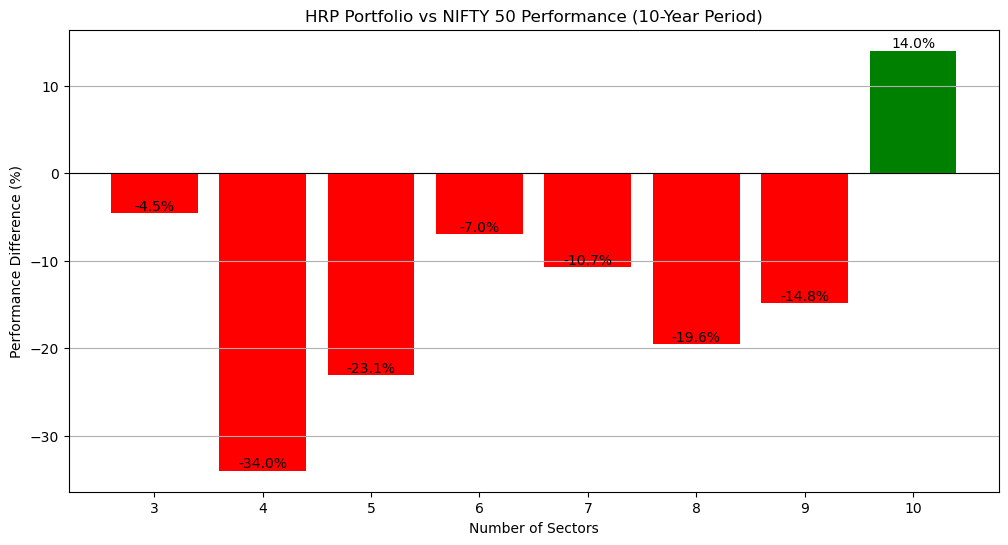


--- Investment Advice as of 2025-03-28 ---
Using training data from 2024-07-18 to 2025-03-27:

--- Top 3 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT')]
Recommended HRP Weights:
  ('^CNXSERVICE', '^CNXSERVICE'): 12.50%
  ('^CNXMETAL', '^CNXMETAL'): 37.50%
  ('^CNXIT', '^CNXIT'): 50.00%
------------------------------------------------------------
--- Top 4 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^NSEBANK', '^NSEBANK')]
Recommended HRP Weights:
  ('^CNXSERVICE', '^CNXSERVICE'): 10.53%
  ('^CNXMETAL', '^CNXMETAL'): 10.53%
  ('^CNXIT', '^CNXIT'): 31.58%
  ('^NSEBANK', '^NSEBANK'): 47.37%
------------------------------------------------------------
--- Top 5 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^NSEBANK', '^NSEBANK'), ('^CNXINFRA',

C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_24716\2683231388.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

In [127]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd

# =============================================================================
# User Input: Number of Years for Simulation (between 1 and 10)
# =============================================================================
while True:
    try:
        num_years = int(input("Enter the number of years for simulation (1-10): "))
        if 1 <= num_years <= 10:
            break
        else:
            print("Please enter a number between 1 and 10.")
    except ValueError:
        print("Invalid input. Please enter an integer between 1 and 10.")

# =============================================================================
# 1. Data Download and Preprocessing
# =============================================================================
# Define sector tickers
sector_tickers = [
    "^CNXIT", "^CNXAUTO", "^NSEBANK", "^CNXFMCG", "^CNXMEDIA",
    "^CNXMETAL", "^CNXPSE", "^CNXMNC", "^CNXINFRA",
    "^CNXREALTY", "^CNXENERGY", "^CNXPSUBANK", "^CNXSERVICE"
]

# Define the time period based on user input
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * num_years)

# Download data for each sector (using auto-adjusted prices)
data_dict = {}
for ticker in sector_tickers:
    df = yf.download(
        ticker,
        start=start_date,
        end=end_date,
        progress=False,
        auto_adjust=True
    )
    if not df.empty and 'Close' in df.columns:
        data_dict[ticker] = df['Close']
    else:
        print(f"Data for {ticker} is missing or incomplete.")

if not data_dict:
    raise ValueError("No sector data downloaded. Check ticker symbols or network connection.")

# Create a DataFrame with aligned dates and drop missing values
prices = pd.concat(data_dict, axis=1).dropna()
returns = prices.pct_change().dropna()

# =============================================================================
# Download Benchmark Data for Trend/Stoploss Analysis (NIFTY 50)
# =============================================================================
benchmark_ticker = "^NSEI"
benchmark_data = yf.download(
    benchmark_ticker,
    start=start_date,
    end=end_date,
    progress=False,
    auto_adjust=True
)
if benchmark_data.empty:
    raise ValueError("No benchmark data downloaded for trend analysis.")
benchmark_series = benchmark_data['Close'].squeeze()

# =============================================================================
# 2. Correlation Analysis & Clustering for Diversification
# =============================================================================
correlation_matrix = returns.corr()
print(f"\nCorrelation Matrix of Sector Returns (Last {num_years} Years):")
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sector Returns")
plt.show()

# Use KMeans clustering to assign each sector a cluster (3 clusters chosen here)
kmeans = KMeans(n_clusters=3, random_state=42)
sector_features = correlation_matrix.values
sector_labels = kmeans.fit_predict(sector_features)
sector_cluster_map = dict(zip(correlation_matrix.columns, sector_labels))
print("\nSector Cluster Mapping (for Diversification):")
for sector, cluster in sector_cluster_map.items():
    print(f"  {sector}: Cluster {cluster}")

# =============================================================================
# 3. HRP Weight Calculation Function (with Numerical Stability Fixes)
# =============================================================================
def get_hrp_weights(returns_df):
    """
    Calculate Hierarchical Risk Parity (HRP) weights.
    """
    if returns_df.shape[1] < 2:
        return pd.Series(1.0, index=returns_df.columns)
    
    corr = returns_df.corr().fillna(0)
    corr = 0.5 * (corr + corr.T)
    np.fill_diagonal(corr.values, 1.0)
    dist = np.sqrt(np.clip(0.5 * (1 - corr), 0.0, 1.0))
    dist = 0.5 * (dist + dist.T)
    dist = np.nan_to_num(dist, nan=0.0, posinf=0.0, neginf=0.0)
    
    condensed_dist = ssd.squareform(dist, checks=False)
    link = sch.linkage(condensed_dist, method='ward')
    sorted_indices = sch.leaves_list(link)
    ordered_tickers = returns_df.columns[sorted_indices]
    
    weights = pd.Series(1, index=ordered_tickers)
    cluster_sizes = pd.Series(1, index=ordered_tickers)
    
    for i in range(len(ordered_tickers) - 1):
        left, right = ordered_tickers[i], ordered_tickers[i+1]
        total_size = cluster_sizes[left] + cluster_sizes[right]
        weights[left] *= cluster_sizes[right] / total_size
        weights[right] *= cluster_sizes[left] / total_size
        cluster_sizes[left] = total_size
        cluster_sizes[right] = total_size
    
    return weights / weights.sum()

# =============================================================================
# 4. Diversified Sector Selection Function
# =============================================================================
def select_diversified_sectors(sharpe_scores, n, cluster_map):
    """
    Select top-n sectors based on Sharpe ratio while ensuring diversification.
    """
    sorted_sectors = sharpe_scores.sort_values(ascending=False).index.tolist()
    unique_selected = []
    used_clusters = set()
    for s in sorted_sectors:
        if cluster_map[s] not in used_clusters:
            unique_selected.append(s)
            used_clusters.add(cluster_map[s])
    selected = unique_selected.copy()
    for s in sorted_sectors:
        if len(selected) >= n:
            break
        if s not in selected:
            selected.append(s)
    return selected[:n]

# =============================================================================
# 5. Quarterly Rebalancing Simulation with HRP, Diversification, Trend & Stoploss
# =============================================================================
print("\n--- Quarterly Rebalancing Simulation with Enhanced Risk Management ---\n")
quarter_end_dates = pd.date_range(start=prices.index[0], end=prices.index[-1], freq='Q')
initial_capital = 100000
stoploss_pct = 0.05  # 5% stoploss threshold

results_summary = []
all_quarterly_results = {}

# We'll determine risk factor for each quarter based on previous quarter's benchmark return:
# If previous quarter's benchmark return is negative, risk factor = 0.5; otherwise, 1.0.
# For the first quarter, use risk factor = 1.0.
def get_previous_quarter_risk_factor(i, benchmark_series, quarter_end_dates):
    if i == 0:
        return 1.0
    prev_q_start = prices.index[0] if i-1 == 0 else quarter_end_dates[i-2] + pd.Timedelta(days=1)
    prev_q_end = quarter_end_dates[i-1]
    benchmark_prev = benchmark_series[(benchmark_series.index >= prev_q_start) & (benchmark_series.index <= prev_q_end)]
    if benchmark_prev.empty:
        return 1.0
    prev_return = (benchmark_prev.iloc[-1] / benchmark_prev.iloc[0]) - 1
    return 0.5 if prev_return < 0 else 1.0

for n in range(3, 11):
    cumulative_value = initial_capital
    quarterly_returns = []
    quarterly_results = []
    
    print(f"\n===== Simulating for Top {n} Sectors =====\n")
    
    for i, q_end in enumerate(quarter_end_dates):
        q_start = prices.index[0] if i == 0 else quarter_end_dates[i-1] + pd.Timedelta(days=1)
        if q_start >= prices.index[-1]:
            break
        
        # Use ~1 year of training data prior to quarter start
        training_end = q_start - pd.Timedelta(days=1)
        training_prices = prices[prices.index <= training_end]
        if training_prices.empty:
            continue
        training_returns = training_prices.pct_change().dropna()
        if training_returns.empty:
            continue
        
        sharpe_scores = training_returns.mean() / training_returns.std()
        selected_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
        if len(selected_sectors) == 0:
            continue
        
        selected_training_returns = training_returns[selected_sectors]
        hrp_weights = get_hrp_weights(selected_training_returns)
        
        period_prices = prices.loc[(prices.index >= q_start) & (prices.index <= q_end), selected_sectors]
        if period_prices.empty or len(period_prices) < 2:
            continue
        
        # Compute raw quarterly return from first to last day
        start_prices = period_prices.iloc[0]
        end_prices = period_prices.iloc[-1]
        sector_period_returns = (end_prices / start_prices) - 1
        raw_portfolio_return = np.dot(hrp_weights.loc[selected_sectors], sector_period_returns)
        
        # --- Intraperiod Stoploss Check ---
        # Calculate daily portfolio returns (weighted) and cumulative daily portfolio value
        daily_returns = period_prices.pct_change().dropna()
        # For each day, portfolio return = dot(hrp_weights, daily returns)
        daily_portfolio_returns = daily_returns.apply(lambda row: np.dot(hrp_weights.loc[selected_sectors], row), axis=1)
        cum_daily = (1 + daily_portfolio_returns).cumprod()
        # Check if minimum portfolio value falls below (1 - stoploss_pct)
        if cum_daily.min() < (1 - stoploss_pct):
            stoploss_triggered = True
            stoploss_return = -stoploss_pct
        else:
            stoploss_triggered = False
            stoploss_return = raw_portfolio_return
        
        # --- Trend Filter Based on Previous Quarter Benchmark ---
        risk_factor = get_previous_quarter_risk_factor(i, benchmark_series, quarter_end_dates)
        
        # Combine: effective return is adjusted by stoploss and scaled by risk factor.
        effective_portfolio_return = risk_factor * stoploss_return
        
        cumulative_value *= (1 + effective_portfolio_return)
        quarterly_returns.append(effective_portfolio_return)
        
        quarterly_results.append({
            'quarter_start': q_start,
            'quarter_end': q_end,
            'selected_sectors': selected_sectors,
            'hrp_weights': hrp_weights.to_dict(),
            'raw_portfolio_return': raw_portfolio_return,
            'stoploss_triggered': stoploss_triggered,
            'stoploss_return': stoploss_return,
            'risk_factor': risk_factor,
            'effective_portfolio_return': effective_portfolio_return,
            'sector_returns': sector_period_returns.to_dict(),
            'cumulative_value': cumulative_value
        })
        
        print(f"Quarter {q_start.date()} to {q_end.date()}:")
        print(f"  Selected Sectors: {selected_sectors}")
        print("  HRP Weights:")
        for sector in selected_sectors:
            print(f"    {sector}: {hrp_weights[sector]:.2%}")
        print(f"  Raw Portfolio Return: {raw_portfolio_return:.2%}")
        if stoploss_triggered:
            print(f"  STOPLOSS Triggered: Capped Return = {stoploss_return:.2%}")
        print(f"  Risk Factor (from previous quarter): {risk_factor}")
        print(f"  Effective Portfolio Return: {effective_portfolio_return:.2%}")
        print(f"  Cumulative Value: ₹{cumulative_value:,.2f}")
        print("-" * 80)
    
    annualized_vol = np.std(quarterly_returns) * np.sqrt(4) if len(quarterly_returns) > 1 else np.nan
    results_summary.append({
        'Number of Sectors': n,
        'HRP Portfolio Value': cumulative_value,
        'Annualized Volatility': annualized_vol
    })
    all_quarterly_results[n] = quarterly_results

hrp_results_df = pd.DataFrame(results_summary)
print("\n=== Simulation Summary for HRP Portfolios (Top N Sectors) ===")
print(hrp_results_df)

# =============================================================================
# 6. Fixed Benchmark Analysis (NIFTY 50)
# =============================================================================
initial_capital_bench = 100000
benchmark_results = []

filtered_data = benchmark_series[benchmark_series.index >= pd.Timestamp(start_date)]
if len(filtered_data) < 2:
    raise ValueError("Not enough benchmark data for the selected period.")

start_price = float(filtered_data.iloc[0])
end_price = float(filtered_data.iloc[-1])
total_return = (end_price / start_price) - 1
cagr = ((1 + total_return) ** (1/num_years)) - 1
final_value = initial_capital_bench * (1 + total_return)

benchmark_results.append({
    'Time Period': f"{num_years} Years",
    'Total Return (%)': round(total_return * 100, 2),
    'CAGR (%)': round(cagr * 100, 2),
    'Final Portfolio Value': round(final_value, 2)
})

benchmark_results_df = pd.DataFrame(benchmark_results)
print(f"\n=== NIFTY 50 Benchmark Performance ({num_years} Years) ===")
print(benchmark_results_df.to_string(index=False))

nifty_final = final_value
comparison_df = hrp_results_df.copy()
comparison_df['NIFTY Value'] = nifty_final
comparison_df['Outperformance (%)'] = (
    (comparison_df['HRP Portfolio Value'] - nifty_final) / nifty_final * 100
).round(2)

print(f"\n=== Final Performance Comparison ({num_years}-Year Period) ===")
print(comparison_df[['Number of Sectors', 'HRP Portfolio Value', 'NIFTY Value', 'Outperformance (%)']].to_string(index=False))

plt.figure(figsize=(12, 6))
bars = plt.bar(
    comparison_df['Number of Sectors'],
    comparison_df['Outperformance (%)'],
    color=np.where(comparison_df['Outperformance (%)'] > 0, 'g', 'r')
)
plt.title(f"HRP Portfolio vs NIFTY 50 Performance ({num_years}-Year Period)")
plt.xlabel("Number of Sectors")
plt.ylabel("Performance Difference (%)")
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%', ha='center', va='bottom')
plt.show()

# =============================================================================
# 7. Investment Advice Based on Last 1 Year Data
# =============================================================================
advice_date = datetime.today()
advice_training_end = advice_date - timedelta(days=1)
advice_training_start = advice_training_end - timedelta(days=252)
if advice_training_start < prices.index[0]:
    advice_training_start = prices.index[0]

advice_training_prices = prices.loc[advice_training_start:advice_training_end].ffill()
advice_training_returns = advice_training_prices.pct_change().dropna()

print(f"\n--- Investment Advice as of {advice_date.date()} ---")
print(f"Using training data from {advice_training_start.date()} to {advice_training_end.date()}:\n")
for n in range(3, 11):
    sharpe_scores = advice_training_returns.mean() / advice_training_returns.std()
    top_n_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
    if not top_n_sectors:
        continue
    selected_training_returns = advice_training_returns[top_n_sectors]
    hrp_weights = get_hrp_weights(selected_training_returns)
    print(f"--- Top {n} Sectors Recommendation ---")
    print("Selected Sectors:", top_n_sectors)
    print("Recommended HRP Weights:")
    for sector in top_n_sectors:
        print(f"  {sector}: {hrp_weights[sector]:.2%}")
    print("-" * 60)

In [139]:
#Optimization of RISK FACTOR

Enter the number of years for simulation (1-15):  6



Correlation Matrix of Sector Returns (Last 6 Years):
                           ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG ^CNXMEDIA  \
Ticker                     ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG ^CNXMEDIA   
            Ticker                                                          
^CNXIT      ^CNXIT       1.000000  0.456878  0.419001  0.458082  0.378314   
^CNXAUTO    ^CNXAUTO     0.456878  1.000000  0.694577  0.572434  0.570264   
^NSEBANK    ^NSEBANK     0.419001  0.694577  1.000000  0.526596  0.508504   
^CNXFMCG    ^CNXFMCG     0.458082  0.572434  0.526596  1.000000  0.423274   
^CNXMEDIA   ^CNXMEDIA    0.378314  0.570264  0.508504  0.423274  1.000000   
^CNXMETAL   ^CNXMETAL    0.443760  0.634452  0.606237  0.451175  0.555432   
^CNXPSE     ^CNXPSE      0.383183  0.619530  0.588393  0.450711  0.576694   
^CNXMNC     ^CNXMNC      0.548709  0.809444  0.691141  0.793418  0.591869   
^CNXINFRA   ^CNXINFRA    0.512672  0.762645  0.747168  0.611173  0.610108   
^CNXREALTY  ^CNXREALTY

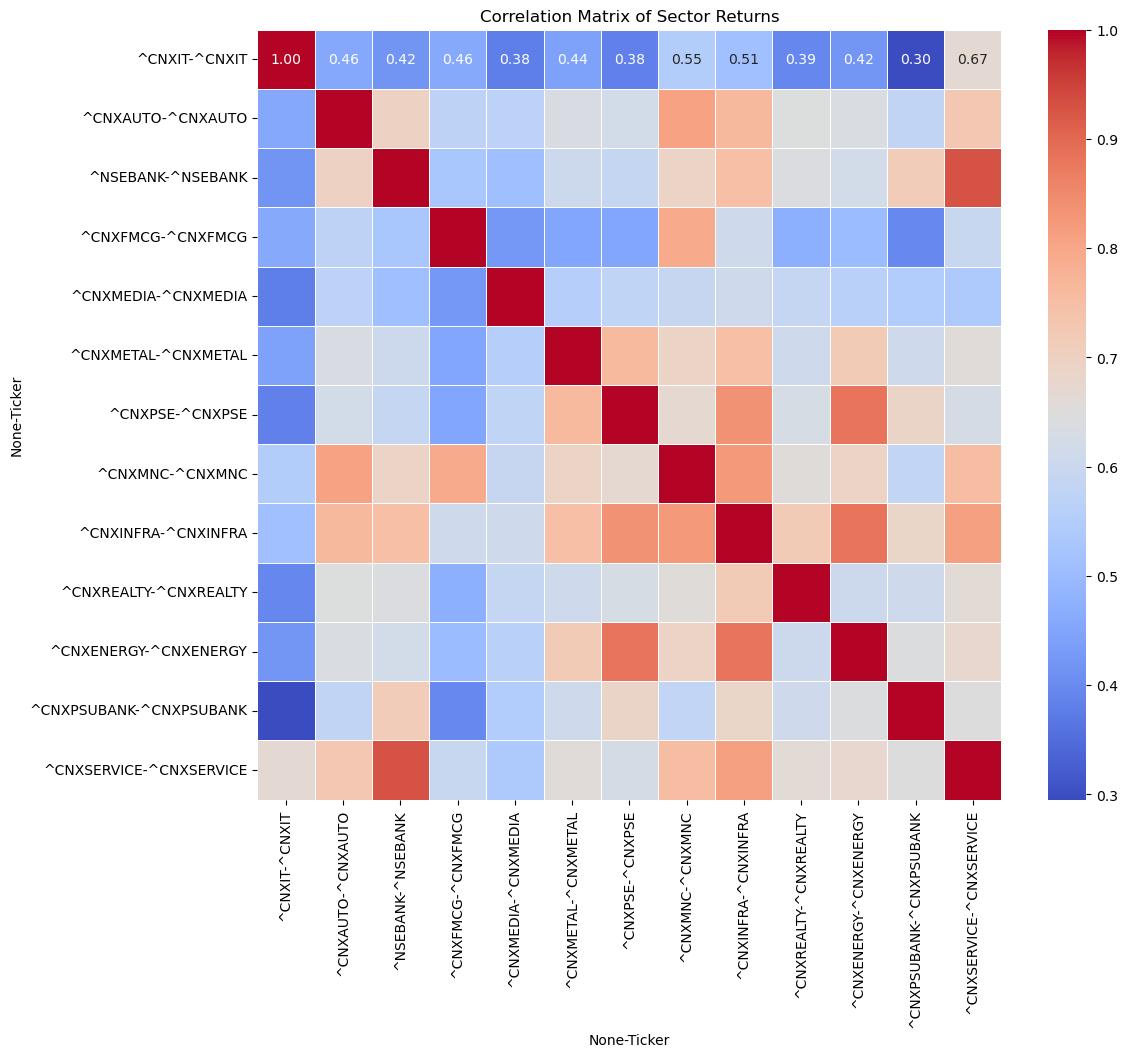

C:\Users\sarda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector Cluster Mapping (for Diversification):
  ('^CNXIT', '^CNXIT'): Cluster 2
  ('^CNXAUTO', '^CNXAUTO'): Cluster 1
  ('^NSEBANK', '^NSEBANK'): Cluster 1
  ('^CNXFMCG', '^CNXFMCG'): Cluster 1
  ('^CNXMEDIA', '^CNXMEDIA'): Cluster 0
  ('^CNXMETAL', '^CNXMETAL'): Cluster 1
  ('^CNXPSE', '^CNXPSE'): Cluster 1
  ('^CNXMNC', '^CNXMNC'): Cluster 1
  ('^CNXINFRA', '^CNXINFRA'): Cluster 1
  ('^CNXREALTY', '^CNXREALTY'): Cluster 0
  ('^CNXENERGY', '^CNXENERGY'): Cluster 1
  ('^CNXPSUBANK', '^CNXPSUBANK'): Cluster 0
  ('^CNXSERVICE', '^CNXSERVICE'): Cluster 1

--- Quarterly Rebalancing Simulation with Enhanced Risk Management ---


===== Simulating for Top 3 Sectors =====

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: [('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXREALTY', '^CNXREALTY'): 12.50%
    ('^CNXSERVICE', '^CNXSERVICE'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: -4.74%
  STOPLOSS Triggered: C

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 12.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 10.75%
  Risk Factor: 0.97
  Effective Portfolio Return: 10.40%
  Cumulative Value: ₹104,879.95
--------------------------------------------------------------------------------
Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: [('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXREALTY', '^CNXREALTY'): 12.50%
    ('^CNXSERVICE', '^CNXSERVICE'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: -28.53%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹99,635.95
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 12.50%
    ('^CNXIT', '^CNXIT'): 50.00%
    ('^CNXREALTY', '^CNXREALTY'): 37.50%
  Raw Portfolio Return: 19.66%
  Risk Factor: 0.71
  Effective Portfolio Return: 13.87%
  Cumulative Value: ₹113,457.40
--------------------------------------------------------------------------------
Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 12.50%
    ('^CNXIT', '^CNXIT'): 50.00%
    ('^CNXREALTY', '^CNXREALTY'): 37.50%
  Raw Portfolio Return: 19.55%
  Risk Factor: 1.00
  Effective Portfolio Return: 19.55%
  Cumulative Value: ₹135,634.20
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXMNC', '^CNXMNC'): 12.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
  Raw Portfolio Return: 31.89%
  Risk Factor: 1.00
  Effective Portfolio Return: 31.89%
  Cumulative Value: ₹178,888.03
--------------------------------------------------------------------------------
Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXSERVICE', '^CNXSERVICE'): 12.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
  Raw Portfolio Return: 4.22%
  Risk Factor: 1.00
  Effective Portfolio Return: 4.22%
  Cumulative Value: ₹186,436.82
--------------------------------------------------------------------------------
Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXMETAL', '^CNXMETAL'): 12.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
  Raw Portfolio Return: 33.70%
  Risk Factor: 1.00
  Effective Portfolio Return: 33.70%
  Cumulative Value: ₹236,804.60
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXREALTY', '^CNXREALTY'): 12.50%
    ('^CNXINFRA', '^CNXINFRA'): 50.00%
  Raw Portfolio Return: 2.96%
  Risk Factor: 1.00
  Effective Portfolio Return: 2.96%
  Cumulative Value: ₹243,810.15
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXREALTY', '^CNXREALTY'): 12.50%
    ('^CNXINFRA', '^CNXINFRA'): 50.00%
  Raw Portfolio Return: -3.27%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value: ₹231,743.41
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXMETAL', '^CNXMETAL'): 12.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
  Raw Portfolio Return: -21.68%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value: ₹220,262.05
--------------------------------------------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXENERGY', '^CNXENERGY'): 12.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
  Raw Portfolio Return: 3.47%
  Risk Factor: 0.89
  Effective Portfolio Return: 3.10%
  Cumulative Value: ₹227,093.51
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXMETAL', '^CNXMETAL'): 12.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
  Raw Portfolio Return: 6.74%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.74%
  Cumulative Value: ₹242,393.43
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 12.50%
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
  Raw Portfolio Return: -8.16%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹230,273.76
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXFMCG', '^CNXFMCG'): 12.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
  Raw Portfolio Return: 19.50%
  Risk Factor: 0.95
  Effective Portfolio Return: 18.61%
  Cumulative Value: ₹273,119.17
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 12.50%
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
  Raw Portfolio Return: 7.68%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.68%
  Cumulative Value: ₹294,084.24
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 12.50%
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
  Raw Portfolio Return: 24.34%
  Risk Factor: 1.00
  Effective Portfolio Return: 24.34%
  Cumulative Value: ₹365,660.96
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 12.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 9.26%
  Risk Factor: 1.00
  Effective Portfolio Return: 9.26%
  Cumulative Value: ₹399,505.55
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 12.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 11.02%
  Risk Factor: 1.00
  Effective Portfolio Return: 11.02%
  Cumulative Value: ₹443,520.68
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 12.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 5.68%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.68%
  Cumulative Value: ₹468,700.28
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 12.50%
    ('^CNXREALTY', '^CNXREALTY'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: -2.66%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹445,265.27
--------------------------------------------------------------------------------

===== Simulating for Top 4 S

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: [('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXSERVICE', '^CNXSERVICE'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXINFRA', '^CNXINFRA'): 47.37%
  Raw Portfolio Return: -4.98%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹95,000.00
--------------------------------------------------------------------------------
Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMNC', '^CNXMNC'): 47.37%
  Raw Portfolio Return: 4.32%
  Risk Factor: 0.97
  Effective Portfolio Return: 4.18%
  Cumulative 

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: [('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXSERVICE', '^CNXSERVICE'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^NSEBANK', '^NSEBANK'): 47.37%
  Raw Portfolio Return: -33.16%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹94,018.46
--------------------------------------------------------------------------------
Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
    ('^CNXIT', '^CNXIT'): 10.53%
    ('^CNXREALTY', '^CNXREALTY'): 31.58%
    ('^CNXMNC', '^CNXMNC'): 47.37%
  Raw Portfolio Return: 20.14%
  Risk Factor: 0.71
  Effective Portfolio Return: 14.22%
  Cumulative V

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXMNC', '^CNXMNC'): 47.37%
  Raw Portfolio Return: 14.73%
  Risk Factor: 1.00
  Effective Portfolio Return: 14.73%
  Cumulative Value: ₹123,200.46
--------------------------------------------------------------------------------
Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMNC', '^CNXMNC'): 10.53%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXFMCG', '^CNXFMCG'): 47.37%
  Raw Portfolio Return: 19.06%
  Risk Factor: 1.00
  Effective Portfolio Return: 19.06%
  Cumulative Value: ₹146,686.98
-------------------------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXSERVICE', '^CNXSERVICE'): 10.53%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXMNC', '^CNXMNC'): 47.37%
  Raw Portfolio Return: 3.01%
  Risk Factor: 1.00
  Effective Portfolio Return: 3.01%
  Cumulative Value: ₹151,101.54
--------------------------------------------------------------------------------
Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXINFRA', '^CNXINFRA'): 10.53%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXSERVICE', '^CNXSERVICE'): 47.37%
  Raw Portfolio Return: 7.06%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.06%
  Cumulative Value: ₹161,766.51
---------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXMNC', '^CNXMNC'): 47.37%
  Raw Portfolio Return: 17.27%
  Risk Factor: 1.00
  Effective Portfolio Return: 17.27%
  Cumulative Value: ₹189,706.56
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXINFRA', '^CNXINFRA'): 10.53%
    ('^CNXMETAL', '^CNXMETAL'): 47.37%
  Raw Portfolio Return: 1.97%
  Risk Factor: 1.00
  Effective Portfolio Return: 1.97%
  Cumulative Value: ₹193,439.15
-----------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXINFRA', '^CNXINFRA'): 47.37%
  Raw Portfolio Return: -16.74%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value: ₹174,756.07
--------------------------------------------------------------------------------
Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXENERGY', '^CNXENERGY'): 10.53%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXINFRA', '^CNXINFRA'): 47.37%
  Raw Portfolio Return: 4.65%
  Risk Factor: 0.89
  Effective Portfolio Return: 4.15%
  C

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXMNC', '^CNXMNC'): 47.37%
  Raw Portfolio Return: 5.57%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.57%
  Cumulative Value: ₹192,145.20
--------------------------------------------------------------------------------
Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXINFRA', '^CNXINFRA'): 47.37%
  Raw Portfolio Return: -5.16%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Val

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXINFRA', '^CNXINFRA'): 47.37%
  Raw Portfolio Return: 11.86%
  Risk Factor: 0.95
  Effective Portfolio Return: 11.32%
  Cumulative Value: ₹203,192.88
--------------------------------------------------------------------------------
Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXINFRA', '^CNXINFRA'): 47.37%
  Raw Portfolio Return: 7.10%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.10%
  Cumulative Value: ₹217,610.49
-----------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXREALTY', '^CNXREALTY'): 47.37%
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
  Raw Portfolio Return: 23.52%
  Risk Factor: 1.00
  Effective Portfolio Return: 23.52%
  Cumulative Value: ₹268,795.81
--------------------------------------------------------------------------------
Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 10.53%
    ('^CNXREALTY', '^CNXREALTY'): 47.37%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
  Raw Portfolio Return: 8.02%
  Risk Factor: 1.00
  Effective Portfolio Return: 8.02%
  Cumulative Value: ₹290,354.90
-----------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 10.53%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXPSE', '^CNXPSE'): 47.37%
  Raw Portfolio Return: 10.84%
  Risk Factor: 1.00
  Effective Portfolio Return: 10.84%
  Cumulative Value: ₹321,831.80
--------------------------------------------------------------------------------
Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 10.53%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMNC', '^CNXMNC'): 47.37%
  Raw Portfolio Return: 7.80%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.80%
  Cumulative Value: ₹346,926.19
-------------------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 10.53%
    ('^CNXREALTY', '^CNXREALTY'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMNC', '^CNXMNC'): 47.37%
  Raw Portfolio Return: -7.94%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹329,579.88
--------------------------------------------------------------------------------

===== Simulating for Top 5 Sectors =====

Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: [('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXSERVICE', '^CNXSERVICE'): 8.41%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXINFRA', '^CNXINFRA'): 9.35%
    ('^CNXPSE', '^CNXPSE'): 44

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 9.35%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXMNC', '^CNXMNC'): 8.41%
    ('^CNXSERVICE', '^CNXSERVICE'): 44.86%
  Raw Portfolio Return: 6.68%
  Risk Factor: 0.97
  Effective Portfolio Return: 6.46%
  Cumulative Value: ₹101,140.66
--------------------------------------------------------------------------------
Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: [('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^NSEBANK', '^NSEBANK'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXSERVICE', '^CNXSERVICE'): 8.41%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^NSEBANK', '^NSEBANK'): 44.86%
    ('^CNXMNC', '^CNXMNC'): 9.35%
  Raw Portfolio Retur

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 44.86%
    ('^CNXINFRA', '^CNXINFRA'): 9.35%
  Raw Portfolio Return: 13.43%
  Risk Factor: 1.00
  Effective Portfolio Return: 13.43%
  Cumulative Value: ₹125,278.28
--------------------------------------------------------------------------------
Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXMNC', '^CNXMNC'): 9.35%
    ('^CNXREALTY', '^CNXREALTY'): 8.41%
    ('^CNXFMCG', '^CNXFMCG'): 9.35%
    ('^CNXAUTO', '^CNXAUTO'): 44.86%
  Raw Portfolio Return: 18.87%
  Risk F

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXSERVICE', '^CNXSERVICE'): 8.41%
    ('^CNXREALTY', '^CNXREALTY'): 44.86%
    ('^CNXMNC', '^CNXMNC'): 9.35%
    ('^CNXFMCG', '^CNXFMCG'): 9.35%
  Raw Portfolio Return: 3.82%
  Risk Factor: 1.00
  Effective Portfolio Return: 3.82%
  Cumulative Value: ₹154,602.63
--------------------------------------------------------------------------------
Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXSERVICE', '^CNXSERVICE'): 44.86%
    ('^CNXMNC', '^CNXMNC'): 9.35%
  Raw Portfolio R

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 8.41%
    ('^CNXINFRA', '^CNXINFRA'): 44.86%
  Raw Portfolio Return: 19.27%
  Risk Factor: 1.00
  Effective Portfolio Return: 19.27%
  Cumulative Value: ₹197,446.29
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 44.86%
  Raw Portfolio Return: 2.6

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 44.86%
  Raw Portfolio Return: -4.06%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value: ₹192,604.09
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
    ('^CNXE

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXENERGY', '^CNXENERGY'): 8.41%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXINFRA', '^CNXINFRA'): 44.86%
    ('^CNXMNC', '^CNXMNC'): 9.35%
  Raw Portfolio Return: 5.37%
  Risk Factor: 0.89
  Effective Portfolio Return: 4.80%
  Cumulative Value: ₹191,846.92
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXMETAL', '^CNXMETAL'): 28.04%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 8.41%
    ('^CNXFMCG', '^CNXFMCG'): 44.86%
  Raw Portfolio Return: 7.49%

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
    ('^CNXMNC', '^CNXMNC'): 44.86%
  Raw Portfolio Return: -4.62%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹195,897.98
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 8.41%
    ('^CNXFMCG', '^CNXFMCG'): 44.86%
    ('^CNXREALTY', '^CNXREALTY'): 28.04%
    ('^CNXINFRA', '^CNXINFRA'): 9.35%
    ('^CNXMETAL'

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 9.35%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
    ('^CNXMNC', '^CNXMNC'): 44.86%
  Raw Portfolio Return: 4.01%
  Risk Factor: 1.00
  Effective Portfolio Return: 4.01%
  Cumulative Value: ₹239,286.99
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXFMCG', '^CNXFMCG'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 44.86%
  Raw Portfolio Return: 13.94%
  Risk

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 9.35%
    ('^CNXREALTY', '^CNXREALTY'): 28.04%
    ('^CNXIT', '^CNXIT'): 8.41%
    ('^CNXFMCG', '^CNXFMCG'): 44.86%
    ('^CNXPSE', '^CNXPSE'): 9.35%
  Raw Portfolio Return: 4.52%
  Risk Factor: 1.00
  Effective Portfolio Return: 4.52%
  Cumulative Value: ₹284,948.08
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXPSE', '^CNXPSE'): 44.86%
    ('^CNXAUTO', '^CNXAUTO'): 9.35%
  Raw Portfolio Return: 11.63%
  Risk

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXMNC', '^CNXMNC'): 9.35%
    ('^CNXPSE', '^CNXPSE'): 44.86%
  Raw Portfolio Return: 7.15%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.15%
  Cumulative Value: ₹340,843.10
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 8.41%
    ('^CNXREALTY', '^CNXREALTY'): 9.35%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXMNC', '^CNXMNC'): 44.86%
    ('^CNXAUTO', '^CNXAUTO'): 9.35%
  Raw Portfolio Return: -8.82%
  STOPLOSS

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: [('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXPSE', '^CNXPSE'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXREALTY', '^CNXREALTY'): 8.55%
    ('^CNXSERVICE', '^CNXSERVICE'): 8.55%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXINFRA', '^CNXINFRA'): 6.84%
    ('^CNXPSE', '^CNXPSE'): 42.74%
    ('^NSEBANK', '^NSEBANK'): 7.69%
  Raw Portfolio Return: -7.25%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹95,000.00
--------------------------------------------------------------------------------
Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXREALTY', '^CNXREALTY'

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: [('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^NSEBANK', '^NSEBANK'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXREALTY', '^CNXREALTY'): 8.55%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^NSEBANK', '^NSEBANK'): 42.74%
    ('^CNXMNC', '^CNXMNC'): 7.69%
    ('^CNXINFRA', '^CNXINFRA'): 8.55%
  Raw Portfolio Return: -32.13%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹93,758.20
--------------------------------------------------------------------------------
Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.6

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXREALTY', '^CNXREALTY'): 7.69%
    ('^CNXMNC', '^CNXMNC'): 8.55%
    ('^CNXINFRA', '^CNXINFRA'): 6.84%
    ('^CNXENERGY', '^CNXENERGY'): 42.74%
  Raw Portfolio Return: 11.69%
  Risk Factor: 1.00
  Effective Portfolio Return: 11.69%
  Cumulative Value: ₹121,094.96
--------------------------------------------------------------------------------
Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXMNC', '^CNXMNC'): 8.55%
    ('^CNXREALTY', '^CNXREALTY'): 7.69%
    ('^CNXFMCG

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.84%
    ('^CNXREALTY', '^CNXREALTY'): 7.69%
    ('^CNXMNC', '^CNXMNC'): 8.55%
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXINFRA', '^CNXINFRA'): 42.74%
  Raw Portfolio Return: 5.98%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.98%
  Cumulative Value: ₹153,445.61
--------------------------------------------------------------------------------
Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXINFRA', '^CNXINFRA'): 6.84%
    ('^CNXREALTY', '^CNXREALTY'): 8.55%


C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXMETAL', '^CNXMETAL'): 8.55%
    ('^CNXREALTY', '^CNXREALTY'): 8.55%
    ('^CNXMNC', '^CNXMNC'): 6.84%
    ('^CNXINFRA', '^CNXINFRA'): 42.74%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.69%
  Raw Portfolio Return: 18.81%
  Risk Factor: 1.00
  Effective Portfolio Return: 18.81%
  Cumulative Value: ₹197,905.64
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXREALTY', '^CNXREALTY'): 8.55%
    ('^CNXINFRA', '^CNXINFRA'): 

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXREALTY', '^CNXREALTY'): 8.55%
    ('^CNXINFRA', '^CNXINFRA'): 6.84%
    ('^CNXMETAL', '^CNXMETAL'): 8.55%
    ('^CNXMNC', '^CNXMNC'): 42.74%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.69%
  Raw Portfolio Return: -4.02%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value: ₹192,657.68
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXMETAL', '^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXENERGY', '^CNXENERGY'): 6.84%
    ('^CNXREALTY', '^CNXREALTY'): 8.55%
    ('^CNXINFRA', '^CNXINFRA'): 42.74%
    ('^CNXMNC', '^CNXMNC'): 7.69%
    ('^CNXMETAL', '^CNXMETAL'): 8.55%
  Raw Portfolio Return: 6.87%
  Risk Factor: 0.89
  Effective Portfolio Return: 6.14%
  Cumulative Value: ₹194,354.96
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXMETAL', '^CNXMETAL'): 6.84%
    ('^CNXREALTY', '^CNXREALTY'): 7.69%
    ('

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXREALTY', '^CNXREALTY'): 7.69%
    ('^CNXINFRA', '^CNXINFRA'): 42.74%
    ('^CNXMNC', '^CNXMNC'): 8.55%
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
  Raw Portfolio Return: -3.83%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹196,887.32
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CN

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXREALTY', '^CNXREALTY'): 6.84%
    ('^CNXINFRA', '^CNXINFRA'): 8.55%
    ('^CNXMNC', '^CNXMNC'): 7.69%
    ('^CNXMETAL', '^CNXMETAL'): 42.74%
  Raw Portfolio Return: 7.13%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.13%
  Cumulative Value: ₹235,250.13
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 8.55%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXREALTY', '^CNXREALTY'): 6.84%
    ('^CNXFMCG

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 6.84%
    ('^CNXREALTY', '^CNXREALTY'): 8.55%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXPSE', '^CNXPSE'): 7.69%
    ('^CNXMNC', '^CNXMNC'): 42.74%
  Raw Portfolio Return: 5.77%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.77%
  Cumulative Value: ₹288,983.73
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 8.55%
    ('^CNXREALTY', '^CNXREALTY'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXPSE', '^CN

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 6.84%
    ('^CNXREALTY', '^CNXREALTY'): 7.69%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXMNC', '^CNXMNC'): 8.55%
    ('^CNXPSE', '^CNXPSE'): 42.74%
    ('^CNXAUTO', '^CNXAUTO'): 8.55%
  Raw Portfolio Return: 7.16%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.16%
  Cumulative Value: ₹347,121.76
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 6.84%
    ('^CNXREALTY', '^CNXREALTY'): 7.69%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXMNC', '^CNXMNC')

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: [('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXPSE', '^CNXPSE'), ('^NSEBANK', '^NSEBANK'), ('^CNXPSUBANK', '^CNXPSUBANK')]
  HRP Weights:
    ('^CNXREALTY', '^CNXREALTY'): 7.96%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.69%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXINFRA', '^CNXINFRA'): 7.96%
    ('^CNXPSE', '^CNXPSE'): 6.37%
    ('^NSEBANK', '^NSEBANK'): 40.96%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 7.17%
  Raw Portfolio Return: -7.84%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹95,000.00
--------------------------------------------------------------------------------
Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXINFRA', '^CNXINFRA'), ('^NSEBA

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: [('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^NSEBANK', '^NSEBANK'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXREALTY', '^CNXREALTY'): 7.96%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.69%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^NSEBANK', '^NSEBANK'): 40.96%
    ('^CNXMNC', '^CNXMNC'): 7.96%
    ('^CNXINFRA', '^CNXINFRA'): 6.37%
    ('^CNXFMCG', '^CNXFMCG'): 7.17%
  Raw Portfolio Return: -30.58%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹96,978.92
--------------------------------------------------------------------------------
Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXINFRA', '^CNXINFRA'), ('^NSEBANK', '^NSEB

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 7.96%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXREALTY', '^CNXREALTY'): 5.69%
    ('^CNXMNC', '^CNXMNC'): 7.96%
    ('^CNXINFRA', '^CNXINFRA'): 7.17%
    ('^CNXENERGY', '^CNXENERGY'): 6.37%
    ('^CNXSERVICE', '^CNXSERVICE'): 40.96%
  Raw Portfolio Return: 11.50%
  Risk Factor: 1.00
  Effective Portfolio Return: 11.50%
  Cumulative Value: ₹123,335.56
--------------------------------------------------------------------------------
Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXIT', '^

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.69%
    ('^CNXREALTY', '^CNXREALTY'): 7.17%
    ('^CNXMNC', '^CNXMNC'): 7.96%
    ('^CNXFMCG', '^CNXFMCG'): 7.96%
    ('^CNXINFRA', '^CNXINFRA'): 40.96%
    ('^CNXAUTO', '^CNXAUTO'): 6.37%
  Raw Portfolio Return: 5.96%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.96%
  Cumulative Value: ₹153,263.25
--------------------------------------------------------------------------------
Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXMETAL', '^CNXMETAL'): 6.37%
    ('^CNXREALTY', '^CNXREALTY'): 7.17%
    ('^CNXMNC', '^CNXMNC'): 7.96%
    ('^CNXINFRA', '^CNXINFRA'): 5.69%
    ('^CNXSERVICE', '^CNXSERVICE'): 40.96%
    ('^CNXFMCG', '^CNXFMCG'): 7.96%
  Raw Portfolio Return: 16.97%
  Risk Factor: 1.00
  Effective Portfolio Return: 16.97%
  Cumulative Value: ₹193,472.27
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXIT', '^

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXREALTY', '^CNXREALTY'): 7.96%
    ('^CNXINFRA', '^CNXINFRA'): 7.17%
    ('^CNXMETAL', '^CNXMETAL'): 7.96%
    ('^CNXMNC', '^CNXMNC'): 5.69%
    ('^CNXSERVICE', '^CNXSERVICE'): 40.96%
    ('^CNXENERGY', '^CNXENERGY'): 6.37%
  Raw Portfolio Return: -1.57%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value: ₹185,659.14
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'),

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXENERGY', '^CNXENERGY'): 5.69%
    ('^CNXREALTY', '^CNXREALTY'): 7.96%
    ('^CNXINFRA', '^CNXINFRA'): 40.96%
    ('^CNXMNC', '^CNXMNC'): 7.96%
    ('^CNXMETAL', '^CNXMETAL'): 6.37%
    ('^CNXAUTO', '^CNXAUTO'): 7.17%
  Raw Portfolio Return: 6.80%
  Risk Factor: 0.89
  Effective Portfolio Return: 6.07%
  Cumulative Value: ₹187,174.68
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'):

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 7.96%
    ('^CNXIT', '^CNXIT'): 6.37%
    ('^CNXREALTY', '^CNXREALTY'): 23.89%
    ('^CNXINFRA', '^CNXINFRA'): 7.96%
    ('^CNXMNC', '^CNXMNC'): 5.69%
    ('^CNXFMCG', '^CNXFMCG'): 40.96%
    ('^CNXENERGY', '^CNXENERGY'): 7.17%
  Raw Portfolio Return: -4.06%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹185,456.02
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSE

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 7.96%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXREALTY', '^CNXREALTY'): 5.69%
    ('^CNXINFRA', '^CNXINFRA'): 7.17%
    ('^CNXMNC', '^CNXMNC'): 6.37%
    ('^CNXMETAL', '^CNXMETAL'): 40.96%
    ('^CNXAUTO', '^CNXAUTO'): 7.96%
  Raw Portfolio Return: 7.17%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.17%
  Cumulative Value: ₹220,751.07
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 7.17%

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 5.69%
    ('^CNXREALTY', '^CNXREALTY'): 7.96%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXFMCG', '^CNXFMCG'): 7.96%
    ('^CNXPSE', '^CNXPSE'): 7.17%
    ('^CNXMNC', '^CNXMNC'): 40.96%
    ('^CNXAUTO', '^CNXAUTO'): 6.37%
  Raw Portfolio Return: 6.43%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.43%
  Cumulative Value: ₹272,720.64
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 7.96%
    ('^

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 7.96%
    ('^CNXREALTY', '^CNXREALTY'): 6.37%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXMNC', '^CNXMNC'): 5.69%
    ('^CNXPSE', '^CNXPSE'): 7.96%
    ('^CNXAUTO', '^CNXAUTO'): 40.96%
    ('^CNXENERGY', '^CNXENERGY'): 7.17%
  Raw Portfolio Return: 7.61%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.61%
  Cumulative Value: ₹328,212.08
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXPSE', '^CNXPSE'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 5.69%
   

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: [('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXPSE', '^CNXPSE'), ('^NSEBANK', '^NSEBANK'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXREALTY', '^CNXREALTY'): 6.76%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.01%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXINFRA', '^CNXINFRA'): 4.83%
    ('^CNXPSE', '^CNXPSE'): 7.51%
    ('^NSEBANK', '^NSEBANK'): 5.37%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 39.45%
    ('^CNXENERGY', '^CNXENERGY'): 7.51%
  Raw Portfolio Return: -14.55%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹95,000.00
--------------------------------------------------------------------------------
Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: [('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^NSEBANK', '^NSEBANK'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXREALTY', '^CNXREALTY'): 6.01%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.83%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^NSEBANK', '^NSEBANK'): 39.45%
    ('^CNXMNC', '^CNXMNC'): 7.51%
    ('^CNXINFRA', '^CNXINFRA'): 5.37%
    ('^CNXFMCG', '^CNXFMCG'): 7.51%
    ('^CNXAUTO', '^CNXAUTO'): 6.76%
  Raw Portfolio Return: -31.17%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹96,691.07
--------------------------------------------------------------------------------
Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 7.51%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXREALTY', '^CNXREALTY'): 5.37%
    ('^CNXMNC', '^CNXMNC'): 7.51%
    ('^CNXINFRA', '^CNXINFRA'): 6.76%
    ('^CNXENERGY', '^CNXENERGY'): 6.01%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.83%
    ('^CNXAUTO', '^CNXAUTO'): 39.45%
  Raw Portfolio Return: 16.22%
  Risk Factor: 1.00
  Effective Portfolio Return: 16.22%
  Cumulative Value: ₹130,205.65
--------------------------------------------------------------------------------
Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXINFRA', '^CNXINFRA'), 

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.83%
    ('^CNXREALTY', '^CNXREALTY'): 6.76%
    ('^CNXMNC', '^CNXMNC'): 7.51%
    ('^CNXFMCG', '^CNXFMCG'): 7.51%
    ('^CNXINFRA', '^CNXINFRA'): 39.45%
    ('^CNXAUTO', '^CNXAUTO'): 5.37%
    ('^CNXMETAL', '^CNXMETAL'): 6.01%
  Raw Portfolio Return: 6.62%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.62%
  Cumulative Value: ₹172,373.95
--------------------------------------------------------------------------------
Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL')

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXMETAL', '^CNXMETAL'): 6.01%
    ('^CNXREALTY', '^CNXREALTY'): 6.76%
    ('^CNXMNC', '^CNXMNC'): 7.51%
    ('^CNXINFRA', '^CNXINFRA'): 4.83%
    ('^CNXSERVICE', '^CNXSERVICE'): 39.45%
    ('^CNXFMCG', '^CNXFMCG'): 7.51%
    ('^CNXAUTO', '^CNXAUTO'): 5.37%
  Raw Portfolio Return: 15.98%
  Risk Factor: 1.00
  Effective Portfolio Return: 15.98%
  Cumulative Value: ₹215,527.43
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 5.37%
    ('^CNXREALTY', '^CNXREALTY'): 22.54%
    ('^CNXINFRA', '^CNXINFRA'): 6.76%
    ('^CNXMETAL', '^CNXMETAL'): 7.51%
    ('^CNXMNC', '^CNXMNC'): 4.83%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.51%
    ('^CNXENERGY', '^CNXENERGY'): 6.01%
    ('^CNXFMCG', '^CNXFMCG'): 39.45%
  Raw Portfolio Return: -1.62%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value: ₹194,617.44
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'),

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXENERGY', '^CNXENERGY'): 7.51%
    ('^CNXREALTY', '^CNXREALTY'): 6.01%
    ('^CNXINFRA', '^CNXINFRA'): 6.76%
    ('^CNXMNC', '^CNXMNC'): 4.83%
    ('^CNXMETAL', '^CNXMETAL'): 7.51%
    ('^CNXAUTO', '^CNXAUTO'): 39.45%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.37%
  Raw Portfolio Return: 6.79%
  Risk Factor: 0.89
  Effective Portfolio Return: 6.06%
  Cumulative Value: ₹196,188.59
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^CNXINFRA

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 6.01%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXREALTY', '^CNXREALTY'): 6.76%
    ('^CNXINFRA', '^CNXINFRA'): 4.83%
    ('^CNXMNC', '^CNXMNC'): 7.51%
    ('^CNXFMCG', '^CNXFMCG'): 7.51%
    ('^CNXENERGY', '^CNXENERGY'): 39.45%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.37%
  Raw Portfolio Return: -7.40%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹194,964.77
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), (

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 7.51%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXREALTY', '^CNXREALTY'): 6.76%
    ('^CNXINFRA', '^CNXINFRA'): 4.83%
    ('^CNXMNC', '^CNXMNC'): 39.45%
    ('^CNXMETAL', '^CNXMETAL'): 7.51%
    ('^CNXAUTO', '^CNXAUTO'): 5.37%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.01%
  Raw Portfolio Return: 4.12%
  Risk Factor: 1.00
  Effective Portfolio Return: 4.12%
  Cumulative Value: ₹227,268.81
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL'), ('^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 6.76%
    ('^CNXREALTY', '^CNXREALTY'): 5.37%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXFMCG', '^CNXFMCG'): 7.51%
    ('^CNXPSE', '^CNXPSE'): 4.83%
    ('^CNXMNC', '^CNXMNC'): 6.01%
    ('^CNXAUTO', '^CNXAUTO'): 7.51%
    ('^CNXMETAL', '^CNXMETAL'): 39.45%
  Raw Portfolio Return: 4.72%
  Risk Factor: 1.00
  Effective Portfolio Return: 4.72%
  Cumulative Value: ₹290,205.14
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMNC', '^CNXM

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 6.76%
    ('^CNXREALTY', '^CNXREALTY'): 5.37%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXMNC', '^CNXMNC'): 4.83%
    ('^CNXPSE', '^CNXPSE'): 7.51%
    ('^CNXAUTO', '^CNXAUTO'): 39.45%
    ('^CNXENERGY', '^CNXENERGY'): 6.01%
    ('^CNXMETAL', '^CNXMETAL'): 7.51%
  Raw Portfolio Return: 7.36%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.36%
  Cumulative Value: ₹349,217.53
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXPSE', '^CNXPSE'), ('^CNXFMCG', '^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: [('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXPSE', '^CNXPSE'), ('^NSEBANK', '^NSEBANK'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXREALTY', '^CNXREALTY'): 7.16%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.16%
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXINFRA', '^CNXINFRA'): 5.72%
    ('^CNXPSE', '^CNXPSE'): 4.17%
    ('^NSEBANK', '^NSEBANK'): 6.44%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 5.11%
    ('^CNXENERGY', '^CNXENERGY'): 38.17%
    ('^CNXMETAL', '^CNXMETAL'): 4.60%
  Raw Portfolio Return: -6.27%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹95,000.00
--------------------------------------------------------------------------------
Quarter 2019-10-01 to 2019-12-31:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXRE

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: [('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^NSEBANK', '^NSEBANK'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXREALTY', '^CNXREALTY'): 4.60%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.16%
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^NSEBANK', '^NSEBANK'): 7.16%
    ('^CNXMNC', '^CNXMNC'): 5.72%
    ('^CNXINFRA', '^CNXINFRA'): 4.17%
    ('^CNXFMCG', '^CNXFMCG'): 6.44%
    ('^CNXAUTO', '^CNXAUTO'): 5.11%
    ('^CNXENERGY', '^CNXENERGY'): 38.17%
  Raw Portfolio Return: -28.22%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹96,815.75
--------------------------------------------------------------------------------
Quarter 2020-04-01 to 2020-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), (

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXAUTO', '^CNXAUTO'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 4.17%
    ('^CNXIT', '^CNXIT'): 5.72%
    ('^CNXREALTY', '^CNXREALTY'): 21.47%
    ('^CNXMNC', '^CNXMNC'): 38.17%
    ('^CNXINFRA', '^CNXINFRA'): 5.11%
    ('^CNXENERGY', '^CNXENERGY'): 4.60%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.16%
    ('^CNXAUTO', '^CNXAUTO'): 7.16%
    ('^NSEBANK', '^NSEBANK'): 6.44%
  Raw Portfolio Return: 7.34%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.34%
  Cumulative Value: ₹118,392.08
--------------------------------------------------------------------------------
Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFM

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMETAL', '^CNXMETAL'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.17%
    ('^CNXREALTY', '^CNXREALTY'): 4.60%
    ('^CNXMNC', '^CNXMNC'): 7.16%
    ('^CNXFMCG', '^CNXFMCG'): 7.16%
    ('^CNXINFRA', '^CNXINFRA'): 5.72%
    ('^CNXAUTO', '^CNXAUTO'): 5.11%
    ('^CNXMETAL', '^CNXMETAL'): 6.44%
    ('^NSEBANK', '^NSEBANK'): 38.17%
  Raw Portfolio Return: 5.68%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.68%
  Cumulative Value: ₹157,093.47
--------------------------------------------------------------------------------
Quarter 2021-04-01 to 2021-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CN

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 4.60%
    ('^CNXMETAL', '^CNXMETAL'): 21.47%
    ('^CNXREALTY', '^CNXREALTY'): 6.44%
    ('^CNXMNC', '^CNXMNC'): 4.17%
    ('^CNXINFRA', '^CNXINFRA'): 7.16%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.72%
    ('^CNXFMCG', '^CNXFMCG'): 38.17%
    ('^CNXAUTO', '^CNXAUTO'): 5.11%
    ('^CNXENERGY', '^CNXENERGY'): 7.16%
  Raw Portfolio Return: 13.66%
  Risk Factor: 1.00
  Effective Portfolio Return: 13.66%
  Cumulative Value: ₹194,713.90
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETA

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXREALTY', '^CNXREALTY'): 6.44%
    ('^CNXINFRA', '^CNXINFRA'): 4.17%
    ('^CNXMETAL', '^CNXMETAL'): 4.60%
    ('^CNXMNC', '^CNXMNC'): 7.16%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.72%
    ('^CNXENERGY', '^CNXENERGY'): 38.17%
    ('^CNXFMCG', '^CNXFMCG'): 7.16%
    ('^CNXAUTO', '^CNXAUTO'): 5.11%
  Raw Portfolio Return: 2.62%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value: ₹175,823.20
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXENERGY', '^CNXENERGY'): 5.72%
    ('^CNXREALTY', '^CNXREALTY'): 4.60%
    ('^CNXINFRA', '^CNXINFRA'): 5.11%
    ('^CNXMNC', '^CNXMNC'): 7.16%
    ('^CNXMETAL', '^CNXMETAL'): 6.44%
    ('^CNXAUTO', '^CNXAUTO'): 4.17%
    ('^CNXSERVICE', '^CNXSERVICE'): 38.17%
    ('^CNXFMCG', '^CNXFMCG'): 7.16%
  Raw Portfolio Return: 7.60%
  Risk Factor: 0.89
  Effective Portfolio Return: 6.79%
  Cumulative Value: ₹178,457.83
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', 

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 6.44%
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXREALTY', '^CNXREALTY'): 4.60%
    ('^CNXINFRA', '^CNXINFRA'): 5.72%
    ('^CNXMNC', '^CNXMNC'): 7.16%
    ('^CNXFMCG', '^CNXFMCG'): 7.16%
    ('^CNXENERGY', '^CNXENERGY'): 5.11%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.17%
    ('^CNXAUTO', '^CNXAUTO'): 38.17%
  Raw Portfolio Return: -4.22%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹181,005.45
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 7.16%
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXREALTY', '^CNXREALTY'): 4.60%
    ('^CNXINFRA', '^CNXINFRA'): 5.72%
    ('^CNXMNC', '^CNXMNC'): 7.16%
    ('^CNXMETAL', '^CNXMETAL'): 6.44%
    ('^CNXAUTO', '^CNXAUTO'): 4.17%
    ('^CNXSERVICE', '^CNXSERVICE'): 38.17%
    ('^CNXENERGY', '^CNXENERGY'): 5.11%
  Raw Portfolio Return: 4.07%
  Risk Factor: 1.00
  Effective Portfolio Return: 4.07%
  Cumulative Value: ₹215,072.91
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG',

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 6.44%
    ('^CNXREALTY', '^CNXREALTY'): 21.47%
    ('^CNXIT', '^CNXIT'): 5.11%
    ('^CNXFMCG', '^CNXFMCG'): 4.17%
    ('^CNXPSE', '^CNXPSE'): 7.16%
    ('^CNXMNC', '^CNXMNC'): 38.17%
    ('^CNXAUTO', '^CNXAUTO'): 4.60%
    ('^CNXMETAL', '^CNXMETAL'): 7.16%
    ('^CNXENERGY', '^CNXENERGY'): 5.72%
  Raw Portfolio Return: 9.69%
  Risk Factor: 1.00
  Effective Portfolio Return: 9.69%
  Cumulative Value: ₹281,979.05
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 6.44%
    ('^CNXREALTY', '^CNXREALTY'): 21.47%
    ('^CNXIT', '^CNXIT'): 5.11%
    ('^CNXMNC', '^CNXMNC'): 4.17%
    ('^CNXPSE', '^CNXPSE'): 7.16%
    ('^CNXAUTO', '^CNXAUTO'): 38.17%
    ('^CNXENERGY', '^CNXENERGY'): 5.72%
    ('^CNXMETAL', '^CNXMETAL'): 7.16%
    ('^CNXFMCG', '^CNXFMCG'): 4.60%
  Raw Portfolio Return: 5.41%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.41%
  Cumulative Value: ₹328,322.26
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2019-07-01 to 2019-09-30:
  Selected Sectors: [('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXPSE', '^CNXPSE'), ('^NSEBANK', '^NSEBANK'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXREALTY', '^CNXREALTY'): 6.86%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.18%
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^CNXINFRA', '^CNXINFRA'): 4.90%
    ('^CNXPSE', '^CNXPSE'): 3.66%
    ('^NSEBANK', '^NSEBANK'): 5.49%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 4.41%
    ('^CNXENERGY', '^CNXENERGY'): 37.05%
    ('^CNXMETAL', '^CNXMETAL'): 4.00%
    ('^CNXFMCG', '^CNXFMCG'): 6.86%
  Raw Portfolio Return: -5.30%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹95,000.00
--------------------------------------------------------------------------------
Quarter 2019-10-01 to 2019-

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-01-01 to 2020-03-31:
  Selected Sectors: [('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^NSEBANK', '^NSEBANK'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXREALTY', '^CNXREALTY'): 4.41%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.86%
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^NSEBANK', '^NSEBANK'): 6.86%
    ('^CNXMNC', '^CNXMNC'): 5.49%
    ('^CNXINFRA', '^CNXINFRA'): 3.66%
    ('^CNXFMCG', '^CNXFMCG'): 6.18%
    ('^CNXAUTO', '^CNXAUTO'): 4.90%
    ('^CNXENERGY', '^CNXENERGY'): 37.05%
    ('^CNXMETAL', '^CNXMETAL'): 4.00%
  Raw Portfolio Return: -28.90%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹96,371.26
--------------------------------------------------------------------------------
Quarter 2020-04-01 to 2020-06-30:
  Se

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2020-07-01 to 2020-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXAUTO', '^CNXAUTO'), ('^NSEBANK', '^NSEBANK'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 5.49%
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^CNXREALTY', '^CNXREALTY'): 6.86%
    ('^CNXMNC', '^CNXMNC'): 4.90%
    ('^CNXINFRA', '^CNXINFRA'): 4.41%
    ('^CNXENERGY', '^CNXENERGY'): 4.00%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.86%
    ('^CNXAUTO', '^CNXAUTO'): 3.66%
    ('^NSEBANK', '^NSEBANK'): 6.18%
    ('^CNXMETAL', '^CNXMETAL'): 37.05%
  Raw Portfolio Return: 13.51%
  Risk Factor: 1.00
  Effective Portfolio Return: 13.51%
  Cumulative Value: ₹126,306.01
--------------------------------------------------------------------------------
Quarter 2020-10-01 to 2020-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNX

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-01-01 to 2021-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMETAL', '^CNXMETAL'), ('^NSEBANK', '^NSEBANK'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.86%
    ('^CNXREALTY', '^CNXREALTY'): 6.86%
    ('^CNXMNC', '^CNXMNC'): 5.49%
    ('^CNXFMCG', '^CNXFMCG'): 4.90%
    ('^CNXINFRA', '^CNXINFRA'): 4.41%
    ('^CNXAUTO', '^CNXAUTO'): 3.66%
    ('^CNXMETAL', '^CNXMETAL'): 37.05%
    ('^NSEBANK', '^NSEBANK'): 6.18%
    ('^CNXENERGY', '^CNXENERGY'): 4.00%
  Raw Portfolio Return: 8.65%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹157,741.36
--------------------------------------------------------------------------------
Quarter 2021-04-01 to 2021-06-30:
  Sel

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 4.00%
    ('^CNXMETAL', '^CNXMETAL'): 6.86%
    ('^CNXREALTY', '^CNXREALTY'): 5.49%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXINFRA', '^CNXINFRA'): 20.58%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.90%
    ('^CNXFMCG', '^CNXFMCG'): 37.05%
    ('^CNXAUTO', '^CNXAUTO'): 6.18%
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^NSEBANK', '^NSEBANK'): 4.41%
  Raw Portfolio Return: 14.10%
  Risk Factor: 1.00
  Effective Portfolio Return: 14.10%
  Cumulative Value: ₹193,148.21
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNX

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMNC', '^CNXMNC'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 4.00%
    ('^CNXREALTY', '^CNXREALTY'): 5.49%
    ('^CNXINFRA', '^CNXINFRA'): 6.86%
    ('^CNXMETAL', '^CNXMETAL'): 6.86%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.90%
    ('^CNXENERGY', '^CNXENERGY'): 6.18%
    ('^CNXFMCG', '^CNXFMCG'): 37.05%
    ('^CNXAUTO', '^CNXAUTO'): 20.58%
    ('^NSEBANK', '^NSEBANK'): 4.41%
  Raw Portfolio Return: -1.50%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value: ₹174,409.41
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Se

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXFMCG', '^CNXFMCG'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 4.00%
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^CNXREALTY', '^CNXREALTY'): 6.18%
    ('^CNXINFRA', '^CNXINFRA'): 6.86%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXMETAL', '^CNXMETAL'): 20.58%
    ('^CNXAUTO', '^CNXAUTO'): 5.49%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.90%
    ('^CNXFMCG', '^CNXFMCG'): 37.05%
    ('^NSEBANK', '^NSEBANK'): 4.41%
  Raw Portfolio Return: 13.54%
  Risk Factor: 0.89
  Effective Portfolio Return: 12.09%
  Cumulative Value: ₹185,806.71
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNX

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXAUTO', '^CNXAUTO'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 20.58%
    ('^CNXIT', '^CNXIT'): 4.00%
    ('^CNXREALTY', '^CNXREALTY'): 6.18%
    ('^CNXINFRA', '^CNXINFRA'): 6.86%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXFMCG', '^CNXFMCG'): 37.05%
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.90%
    ('^CNXAUTO', '^CNXAUTO'): 5.49%
    ('^NSEBANK', '^NSEBANK'): 4.41%
  Raw Portfolio Return: -5.45%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value: ₹188,826.59
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Se

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 4.90%
    ('^CNXIT', '^CNXIT'): 5.49%
    ('^CNXREALTY', '^CNXREALTY'): 4.00%
    ('^CNXINFRA', '^CNXINFRA'): 6.86%
    ('^CNXMNC', '^CNXMNC'): 4.41%
    ('^CNXMETAL', '^CNXMETAL'): 20.58%
    ('^CNXAUTO', '^CNXAUTO'): 3.66%
    ('^CNXSERVICE', '^CNXSERVICE'): 37.05%
    ('^CNXENERGY', '^CNXENERGY'): 6.18%
    ('^CNXPSE', '^CNXPSE'): 6.86%
  Raw Portfolio Return: 5.35%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.35%
  Cumulative Value: ₹219,512.91
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNX

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 6.86%
    ('^CNXREALTY', '^CNXREALTY'): 4.00%
    ('^CNXIT', '^CNXIT'): 5.49%
    ('^CNXFMCG', '^CNXFMCG'): 4.90%
    ('^CNXPSE', '^CNXPSE'): 6.86%
    ('^CNXMNC', '^CNXMNC'): 4.41%
    ('^CNXAUTO', '^CNXAUTO'): 3.66%
    ('^CNXMETAL', '^CNXMETAL'): 20.58%
    ('^CNXENERGY', '^CNXENERGY'): 6.18%
    ('^CNXSERVICE', '^CNXSERVICE'): 37.05%
  Raw Portfolio Return: 5.24%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.24%
  Cumulative Value: ₹268,073.57
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNX

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXINFRA', '^CNXINFRA'): 6.86%
    ('^CNXREALTY', '^CNXREALTY'): 4.90%
    ('^CNXIT', '^CNXIT'): 5.49%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXPSE', '^CNXPSE'): 6.86%
    ('^CNXAUTO', '^CNXAUTO'): 37.05%
    ('^CNXENERGY', '^CNXENERGY'): 6.18%
    ('^CNXMETAL', '^CNXMETAL'): 20.58%
    ('^CNXFMCG', '^CNXFMCG'): 4.41%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.00%
  Raw Portfolio Return: 6.13%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.13%
  Cumulative Value: ₹314,885.19
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXINFRA', '^CNXINFRA'), ('^CNX

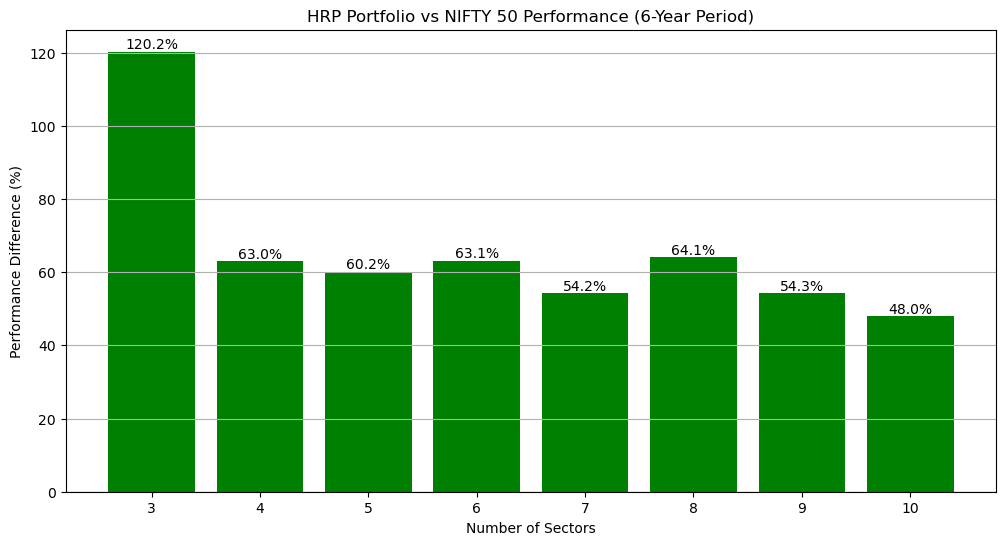


--- Investment Advice as of 2025-03-28 ---
Using training data from 2024-07-18 to 2025-03-27:

--- Top 3 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK')]
Recommended HRP Weights:
  ('^CNXSERVICE', '^CNXSERVICE'): 12.50%
  ('^CNXIT', '^CNXIT'): 50.00%
  ('^CNXPSUBANK', '^CNXPSUBANK'): 37.50%
------------------------------------------------------------
--- Top 4 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXMETAL', '^CNXMETAL')]
Recommended HRP Weights:
  ('^CNXSERVICE', '^CNXSERVICE'): 10.53%
  ('^CNXIT', '^CNXIT'): 47.37%
  ('^CNXPSUBANK', '^CNXPSUBANK'): 31.58%
  ('^CNXMETAL', '^CNXMETAL'): 10.53%
------------------------------------------------------------
--- Top 5 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXMETAL', '

C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_17484\1527288783.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd

# =============================================================================
# User Input: Number of Years for Simulation (between 1 and 10)
# =============================================================================
while True:
    try:
        num_years = int(input("Enter the number of years for simulation (1-15): "))
        if 1 <= num_years <= 15:
            break
        else:
            print("Please enter a number between 1 and 15.")
    except ValueError:
        print("Invalid input. Please enter an integer between 1 and 15.")

# =============================================================================
# 1. Data Download and Preprocessing
# =============================================================================
# Define sector tickers
sector_tickers = [
    "^CNXIT", "^CNXAUTO", "^NSEBANK", "^CNXFMCG", "^CNXMEDIA",
    "^CNXMETAL", "^CNXPSE", "^CNXMNC", "^CNXINFRA",
    "^CNXREALTY", "^CNXENERGY", "^CNXPSUBANK", "^CNXSERVICE"
]

# Define the time period based on user input
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * num_years)

# Download data for each sector (using auto-adjusted prices)
data_dict = {}
for ticker in sector_tickers:
    df = yf.download(
        ticker,
        start=start_date,
        end=end_date,
        progress=False,
        auto_adjust=True
    )
    if not df.empty and 'Close' in df.columns:
        data_dict[ticker] = df['Close']
    else:
        print(f"Data for {ticker} is missing or incomplete.")

if not data_dict:
    raise ValueError("No sector data downloaded. Check ticker symbols or network connection.")

# Create a DataFrame with aligned dates and drop missing values
prices = pd.concat(data_dict, axis=1).dropna()
returns = prices.pct_change().dropna()

# =============================================================================
# Download Benchmark Data for Trend/Stoploss Analysis (NIFTY 50)
# =============================================================================
benchmark_ticker = "^NSEI"
benchmark_data = yf.download(
    benchmark_ticker,
    start=start_date,
    end=end_date,
    progress=False,
    auto_adjust=True
)
if benchmark_data.empty:
    raise ValueError("No benchmark data downloaded for trend analysis.")
benchmark_series = benchmark_data['Close'].squeeze()

# =============================================================================
# 2. Correlation Analysis & Clustering for Diversification
# =============================================================================
correlation_matrix = returns.corr()
print(f"\nCorrelation Matrix of Sector Returns (Last {num_years} Years):")
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sector Returns")
plt.show()

# Use KMeans clustering to assign each sector a cluster (3 clusters chosen here)
kmeans = KMeans(n_clusters=3, random_state=42)
sector_features = correlation_matrix.values
sector_labels = kmeans.fit_predict(sector_features)
sector_cluster_map = dict(zip(correlation_matrix.columns, sector_labels))
print("\nSector Cluster Mapping (for Diversification):")
for sector, cluster in sector_cluster_map.items():
    print(f"  {sector}: Cluster {cluster}")

# =============================================================================
# 3. HRP Weight Calculation Function (with Numerical Stability Fixes)
# =============================================================================
def get_hrp_weights(returns_df):
    """
    Calculate Hierarchical Risk Parity (HRP) weights.
    """
    if returns_df.shape[1] < 2:
        return pd.Series(1.0, index=returns_df.columns)
    
    corr = returns_df.corr().fillna(0)
    corr = 0.5 * (corr + corr.T)
    np.fill_diagonal(corr.values, 1.0)
    dist = np.sqrt(np.clip(0.5 * (1 - corr), 0.0, 1.0))
    dist = 0.5 * (dist + dist.T)
    dist = np.nan_to_num(dist, nan=0.0, posinf=0.0, neginf=0.0)
    
    condensed_dist = ssd.squareform(dist, checks=False)
    link = sch.linkage(condensed_dist, method='ward')
    sorted_indices = sch.leaves_list(link)
    ordered_tickers = returns_df.columns[sorted_indices]
    
    weights = pd.Series(1, index=ordered_tickers)
    cluster_sizes = pd.Series(1, index=ordered_tickers)
    
    for i in range(len(ordered_tickers) - 1):
        left, right = ordered_tickers[i], ordered_tickers[i+1]
        total_size = cluster_sizes[left] + cluster_sizes[right]
        weights[left] *= cluster_sizes[right] / total_size
        weights[right] *= cluster_sizes[left] / total_size
        cluster_sizes[left] = total_size
        cluster_sizes[right] = total_size
    
    return weights / weights.sum()

# =============================================================================
# 4. Diversified Sector Selection Function
# =============================================================================
def select_diversified_sectors(sharpe_scores, n, cluster_map):
    """
    Select top-n sectors based on Sharpe ratio while ensuring diversification.
    """
    sorted_sectors = sharpe_scores.sort_values(ascending=False).index.tolist()
    unique_selected = []
    used_clusters = set()
    for s in sorted_sectors:
        if cluster_map[s] not in used_clusters:
            unique_selected.append(s)
            used_clusters.add(cluster_map[s])
    selected = unique_selected.copy()
    for s in sorted_sectors:
        if len(selected) >= n:
            break
        if s not in selected:
            selected.append(s)
    return selected[:n]

# =============================================================================
# 5. Quarterly Rebalancing Simulation with Enhanced Risk Management
# =============================================================================
print("\n--- Quarterly Rebalancing Simulation with Enhanced Risk Management ---\n")
quarter_end_dates = pd.date_range(start=prices.index[0], end=prices.index[-1], freq='Q')
initial_capital = 100000
stoploss_pct = 0.05  # 5% stoploss threshold

results_summary = []
all_quarterly_results = {}

# Updated risk factor function: use a continuous measure.
# For the previous quarter, compute return and set:
# risk_factor = clip(1 + previous_return, lower_bound, 1.0), where lower_bound is 0.5.
def get_previous_quarter_risk_factor(i, benchmark_series, quarter_end_dates):
    if i == 0:
        return 1.0
    prev_q_start = prices.index[0] if i-1 == 0 else quarter_end_dates[i-2] + pd.Timedelta(days=1)
    prev_q_end = quarter_end_dates[i-1]
    benchmark_prev = benchmark_series[(benchmark_series.index >= prev_q_start) & (benchmark_series.index <= prev_q_end)]
    if benchmark_prev.empty:
        return 1.0
    prev_return = (benchmark_prev.iloc[-1] / benchmark_prev.iloc[0]) - 1
    # Calculate risk factor as 1 + previous return, clipped between 0.5 and 1.0.
    risk_factor = np.clip(1 + prev_return, 0.5, 1.0)
    return risk_factor

for n in range(3, 11):
    cumulative_value = initial_capital
    quarterly_returns = []
    quarterly_results = []
    
    print(f"\n===== Simulating for Top {n} Sectors =====\n")
    
    for i, q_end in enumerate(quarter_end_dates):
        q_start = prices.index[0] if i == 0 else quarter_end_dates[i-1] + pd.Timedelta(days=1)
        if q_start >= prices.index[-1]:
            break
        
        # Use ~1 year of training data prior to quarter start
        training_end = q_start - pd.Timedelta(days=1)
        training_prices = prices[prices.index <= training_end]
        if training_prices.empty:
            continue
        training_returns = training_prices.pct_change().dropna()
        if training_returns.empty:
            continue
        
        sharpe_scores = training_returns.mean() / training_returns.std()
        selected_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
        if len(selected_sectors) == 0:
            continue
        
        selected_training_returns = training_returns[selected_sectors]
        hrp_weights = get_hrp_weights(selected_training_returns)
        
        period_prices = prices.loc[(prices.index >= q_start) & (prices.index <= q_end), selected_sectors]
        if period_prices.empty or len(period_prices) < 2:
            continue
        
        # Compute raw quarterly return from first to last day
        start_prices = period_prices.iloc[0]
        end_prices = period_prices.iloc[-1]
        sector_period_returns = (end_prices / start_prices) - 1
        raw_portfolio_return = np.dot(hrp_weights.loc[selected_sectors], sector_period_returns)
        
        # --- Intraperiod Stoploss Check ---
        daily_returns = period_prices.pct_change().dropna()
        daily_portfolio_returns = daily_returns.apply(lambda row: np.dot(hrp_weights.loc[selected_sectors], row), axis=1)
        cum_daily = (1 + daily_portfolio_returns).cumprod()
        if cum_daily.min() < (1 - stoploss_pct):
            stoploss_triggered = True
            stoploss_return = -stoploss_pct
        else:
            stoploss_triggered = False
            stoploss_return = raw_portfolio_return
        
        # Use the updated risk factor function
        risk_factor = get_previous_quarter_risk_factor(i, benchmark_series, quarter_end_dates)
        
        effective_portfolio_return = risk_factor * stoploss_return
        
        cumulative_value *= (1 + effective_portfolio_return)
        quarterly_returns.append(effective_portfolio_return)
        
        quarterly_results.append({
            'quarter_start': q_start,
            'quarter_end': q_end,
            'selected_sectors': selected_sectors,
            'hrp_weights': hrp_weights.to_dict(),
            'raw_portfolio_return': raw_portfolio_return,
            'stoploss_triggered': stoploss_triggered,
            'stoploss_return': stoploss_return,
            'risk_factor': risk_factor,
            'effective_portfolio_return': effective_portfolio_return,
            'sector_returns': sector_period_returns.to_dict(),
            'cumulative_value': cumulative_value
        })
        
        print(f"Quarter {q_start.date()} to {q_end.date()}:")
        print(f"  Selected Sectors: {selected_sectors}")
        print("  HRP Weights:")
        for sector in selected_sectors:
            print(f"    {sector}: {hrp_weights[sector]:.2%}")
        print(f"  Raw Portfolio Return: {raw_portfolio_return:.2%}")
        if stoploss_triggered:
            print(f"  STOPLOSS Triggered: Capped Return = {stoploss_return:.2%}")
        print(f"  Risk Factor: {risk_factor:.2f}")
        print(f"  Effective Portfolio Return: {effective_portfolio_return:.2%}")
        print(f"  Cumulative Value: ₹{cumulative_value:,.2f}")
        print("-" * 80)
    
    annualized_vol = np.std(quarterly_returns) * np.sqrt(4) if len(quarterly_returns) > 1 else np.nan
    results_summary.append({
        'Number of Sectors': n,
        'HRP Portfolio Value': cumulative_value,
        'Annualized Volatility': annualized_vol
    })
    all_quarterly_results[n] = quarterly_results

hrp_results_df = pd.DataFrame(results_summary)
print("\n=== Simulation Summary for HRP Portfolios (Top N Sectors) ===")
print(hrp_results_df)

# =============================================================================
# 6. Fixed Benchmark Analysis (NIFTY 50)
# =============================================================================
initial_capital_bench = 100000
benchmark_results = []

filtered_data = benchmark_series[benchmark_series.index >= pd.Timestamp(start_date)]
if len(filtered_data) < 2:
    raise ValueError("Not enough benchmark data for the selected period.")

start_price = float(filtered_data.iloc[0])
end_price = float(filtered_data.iloc[-1])
total_return = (end_price / start_price) - 1
cagr = ((1 + total_return) ** (1/num_years)) - 1
final_value = initial_capital_bench * (1 + total_return)

benchmark_results.append({
    'Time Period': f"{num_years} Years",
    'Total Return (%)': round(total_return * 100, 2),
    'CAGR (%)': round(cagr * 100, 2),
    'Final Portfolio Value': round(final_value, 2)
})

benchmark_results_df = pd.DataFrame(benchmark_results)
print(f"\n=== NIFTY 50 Benchmark Performance ({num_years} Years) ===")
print(benchmark_results_df.to_string(index=False))

nifty_final = final_value
comparison_df = hrp_results_df.copy()
comparison_df['NIFTY Value'] = nifty_final
comparison_df['Outperformance (%)'] = (
    (comparison_df['HRP Portfolio Value'] - nifty_final) / nifty_final * 100
).round(2)

print(f"\n=== Final Performance Comparison ({num_years}-Year Period) ===")
print(comparison_df[['Number of Sectors', 'HRP Portfolio Value', 'NIFTY Value', 'Outperformance (%)']].to_string(index=False))

plt.figure(figsize=(12, 6))
bars = plt.bar(
    comparison_df['Number of Sectors'],
    comparison_df['Outperformance (%)'],
    color=np.where(comparison_df['Outperformance (%)'] > 0, 'g', 'r')
)
plt.title(f"HRP Portfolio vs NIFTY 50 Performance ({num_years}-Year Period)")
plt.xlabel("Number of Sectors")
plt.ylabel("Performance Difference (%)")
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%', ha='center', va='bottom')
plt.show()

# =============================================================================
# 7. Investment Advice Based on Last 1 Year Data
# =============================================================================
advice_date = datetime.today()
advice_training_end = advice_date - timedelta(days=1)
advice_training_start = advice_training_end - timedelta(days=252)
if advice_training_start < prices.index[0]:
    advice_training_start = prices.index[0]

advice_training_prices = prices.loc[advice_training_start:advice_training_end].ffill()
advice_training_returns = advice_training_prices.pct_change().dropna()

print(f"\n--- Investment Advice as of {advice_date.date()} ---")
print(f"Using training data from {advice_training_start.date()} to {advice_training_end.date()}:\n")
for n in range(3, 11):
    sharpe_scores = advice_training_returns.mean() / advice_training_returns.std()
    top_n_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
    if not top_n_sectors:
        continue
    selected_training_returns = advice_training_returns[top_n_sectors]
    hrp_weights = get_hrp_weights(selected_training_returns)
    print(f"--- Top {n} Sectors Recommendation ---")
    print("Selected Sectors:", top_n_sectors)
    print("Recommended HRP Weights:")
    for sector in top_n_sectors:
        print(f"  {sector}: {hrp_weights[sector]:.2%}")
    print("-" * 60)

In [21]:
#Inclusive of transaction cost at 0.15% per trade (combined of buying and selling)

Enter the number of years for simulation (1-15):  4



Correlation Matrix of Sector Returns (Last 4 Years):
                           ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG ^CNXMEDIA  \
Ticker                     ^CNXIT  ^CNXAUTO  ^NSEBANK  ^CNXFMCG ^CNXMEDIA   
            Ticker                                                          
^CNXIT      ^CNXIT       1.000000  0.355371  0.345102  0.345155  0.322144   
^CNXAUTO    ^CNXAUTO     0.355371  1.000000  0.611891  0.512383  0.520978   
^NSEBANK    ^NSEBANK     0.345102  0.611891  1.000000  0.421042  0.436505   
^CNXFMCG    ^CNXFMCG     0.345155  0.512383  0.421042  1.000000  0.353915   
^CNXMEDIA   ^CNXMEDIA    0.322144  0.520978  0.436505  0.353915  1.000000   
^CNXMETAL   ^CNXMETAL    0.358292  0.528378  0.541082  0.308218  0.520942   
^CNXPSE     ^CNXPSE      0.279941  0.569043  0.538725  0.309598  0.543533   
^CNXMNC     ^CNXMNC      0.467807  0.775112  0.620705  0.722268  0.574879   
^CNXINFRA   ^CNXINFRA    0.447109  0.711208  0.693621  0.498687  0.578403   
^CNXREALTY  ^CNXREALTY

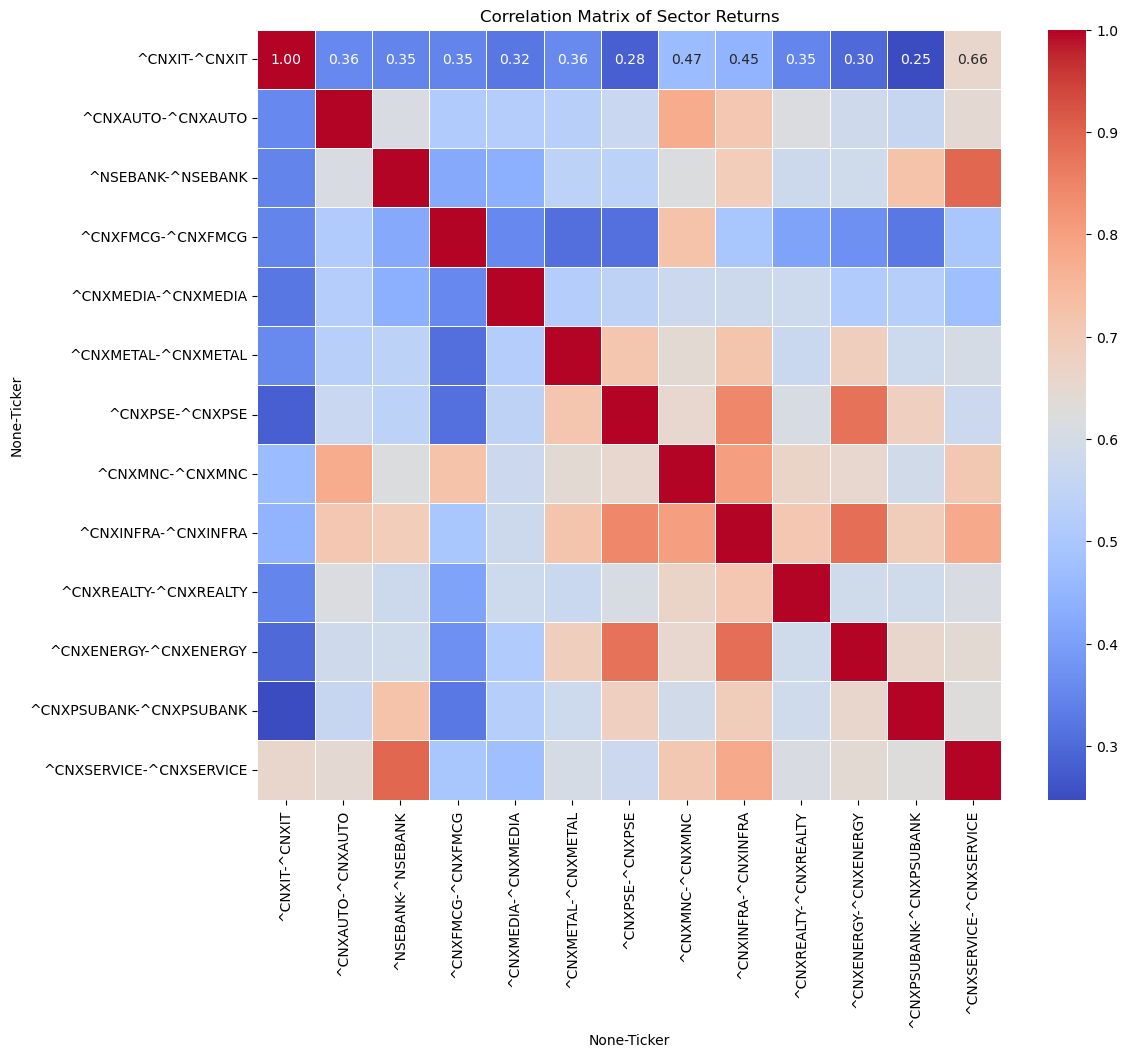

C:\Users\sarda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector Cluster Mapping (for Diversification):
  ('^CNXIT', '^CNXIT'): Cluster 2
  ('^CNXAUTO', '^CNXAUTO'): Cluster 1
  ('^NSEBANK', '^NSEBANK'): Cluster 1
  ('^CNXFMCG', '^CNXFMCG'): Cluster 1
  ('^CNXMEDIA', '^CNXMEDIA'): Cluster 0
  ('^CNXMETAL', '^CNXMETAL'): Cluster 1
  ('^CNXPSE', '^CNXPSE'): Cluster 1
  ('^CNXMNC', '^CNXMNC'): Cluster 1
  ('^CNXINFRA', '^CNXINFRA'): Cluster 1
  ('^CNXREALTY', '^CNXREALTY'): Cluster 1
  ('^CNXENERGY', '^CNXENERGY'): Cluster 1
  ('^CNXPSUBANK', '^CNXPSUBANK'): Cluster 0
  ('^CNXSERVICE', '^CNXSERVICE'): Cluster 1

--- Quarterly Rebalancing Simulation with Enhanced Risk Management ---


===== Simulating for Top 3 Sectors =====

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 12.50%
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^CNXMEDIA', '^CNXMEDIA'): 50.00%
  Raw Portfolio Return: 18.33%
  Risk Factor: 1.00
  Effective Por

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 12.50%
    ('^CNXMEDIA', '^CNXMEDIA'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 3.30%
  Risk Factor: 0.89
  Effective Portfolio Return: 2.95%
  Cumulative Value after Transaction Costs: ₹116,668.68
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 12.50%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 27.07%
  Risk Factor: 1.00
  Effective Portfolio Return: 27.07%
  Cumulative Value after Transaction Costs: ₹148,026.78
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXPSUBANK', '^CNXPSUBANK'): 12.50%
    ('^CNXENERGY', '^CNXENERGY'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: -8.05%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹140,414.58
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 12.50%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 37.50%
    ('^CNXIT', '^CNXIT'): 50.00%
  Raw Portfolio Return: 6.93%
  Risk Factor: 0.95
  Effective Portfolio Return: 6.61%
  Cumulative Value after Transaction Costs: ₹149,473.27
------------------------------------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 12.50%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 14.48%
  Risk Factor: 1.00
  Effective Portfolio Return: 14.48%
  Cumulative Value after Transaction Costs: ₹170,853.54
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 12.50%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 11.56%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹162,067.49
----------------------------------------------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 12.50%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 12.56%
  Risk Factor: 1.00
  Effective Portfolio Return: 12.56%
  Cumulative Value after Transaction Costs: ₹182,156.72
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 12.50%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 4.84%
  Risk Factor: 1.00
  Effective Portfolio Return: 4.84%
  Cumulative Value after Transaction Costs: ₹190,692.53
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 12.50%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 2.02%
  Risk Factor: 1.00
  Effective Portfolio Return: 2.02%
  Cumulative Value after Transaction Costs: ₹194,250.84
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 12.50%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: -2.74%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹184,261.59
----------------------------------------------------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMEDIA', '^CNXMEDIA'): 10.53%
    ('^CNXMNC', '^CNXMNC'): 47.37%
  Raw Portfolio Return: 14.04%
  Risk Factor: 1.00
  Effective Portfolio Return: 14.04%
  Cumulative Value after Transaction Costs: ₹113,864.92
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMEDIA', '^CNXMEDIA'): 10.53%
    ('^CNXINFRA', '^CNXINFRA'): 47.37%
  Raw Portfolio Return: 3.23%
  Risk Factor: 1.00
  Effective Portfolio Return: 3.23%
  Cumulative Value after Transaction Costs: ₹117,365.

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMNC', '^CNXMNC'): 10.53%
    ('^CNXMEDIA', '^CNXMEDIA'): 10.53%
    ('^CNXINFRA', '^CNXINFRA'): 47.37%
  Raw Portfolio Return: -2.26%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹111,389.76
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMEDIA', '^CNXMEDIA'): 10.53%
    ('^CNXMETAL', '^CNXMETAL'): 47.37%
  Raw Portfolio Return: -23.48%
  STOPLOSS Triggered: Capped Return = -5.00%
  Ris

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 10.53%
    ('^CNXMEDIA', '^CNXMEDIA'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXPSE', '^CNXPSE'): 47.37%
  Raw Portfolio Return: 3.54%
  Risk Factor: 0.89
  Effective Portfolio Return: 3.16%
  Cumulative Value after Transaction Costs: ₹108,889.07
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 31.58%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 10.53%
    ('^CNXIT', '^CNXIT'): 10.53%
    ('^CNXFMCG', '^CNXFMCG'): 47.37%
  Raw Portfolio Return: 7.42%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.42%
  Cumulative Value after Transactio

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 31.58%
    ('^CNXIT', '^CNXIT'): 47.37%
    ('^CNXPSE', '^CNXPSE'): 10.53%
  Raw Portfolio Return: 7.40%
  Risk Factor: 0.95
  Effective Portfolio Return: 7.06%
  Cumulative Value after Transaction Costs: ₹118,428.20
--------------------------------------------------------------------------------
Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 31.58%
    ('^CNXIT', '^CNXIT'): 47.37%
    ('^CNXPSE', '^CNXPSE'): 10.53%
  Raw Portfolio Return: 12.79%
  Risk Factor: 1.00
  Effective Portfolio Return: 12.79%
  Cumulative Value after Transaction Costs: ₹

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 10.53%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXINFRA', '^CNXINFRA'): 47.37%
  Raw Portfolio Return: 10.46%
  Risk Factor: 1.00
  Effective Portfolio Return: 10.46%
  Cumulative Value after Transaction Costs: ₹172,220.16
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 10.53%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXINFRA', '^CNXINFRA'): 47.37%
  Raw Portfolio Return: 6.95%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.95%
  Cumulative Value after Transaction 

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 10.53%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 47.37%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXAUTO', '^CNXAUTO'): 10.53%
  Raw Portfolio Return: 2.01%
  Risk Factor: 1.00
  Effective Portfolio Return: 2.01%
  Cumulative Value after Transaction Costs: ₹187,335.14
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 10.53%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 47.37%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMNC', '^CNXMNC'): 10.53%
  Raw Portfolio Return: -4.03%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cu

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 8.41%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXMEDIA', '^CNXMEDIA'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 9.35%
    ('^CNXPSE', '^CNXPSE'): 44.86%
  Raw Portfolio Return: 15.31%
  Risk Factor: 1.00
  Effective Portfolio Return: 15.31%
  Cumulative Value after Transaction Costs: ₹115,132.62
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 9.35%
    ('^CNXIT', '^CNXIT'): 8.41%
    ('^CNXMEDIA', '^CNXMEDIA'): 44.86%
    ('^CNXINFRA', '^CNXINFRA'): 9.35%
    ('^CNXFMCG', '^CNXFMCG'): 28.04%
  Raw Portfolio Return:

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 8.41%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXMEDIA', '^CNXMEDIA'): 9.35%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXPSE', '^CNXPSE'): 44.86%
  Raw Portfolio Return: -15.87%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹103,791.71
--------------------------------------------------------------------------------
Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 9.35%
    ('^CNXMEDIA', '^CNXMEDIA'): 8.41%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXPSE', '^CNXPSE'): 9.35

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXPSUBANK', '^CNXPSUBANK'): 9.35%
    ('^CNXENERGY', '^CNXENERGY'): 8.41%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXPSE', '^CNXPSE'): 44.86%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
  Raw Portfolio Return: -3.86%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹109,207.84
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 28.04%
    ('^CNXIT', '^CNXIT'): 44.86%
    ('^CNXPSE', '^CNXP

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 9.35%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 28.04%
    ('^CNXIT', '^CNXIT'): 8.41%
    ('^CNXFMCG', '^CNXFMCG'): 44.86%
    ('^CNXINFRA', '^CNXINFRA'): 9.35%
  Raw Portfolio Return: 12.28%
  Risk Factor: 1.00
  Effective Portfolio Return: 12.28%
  Cumulative Value after Transaction Costs: ₹142,981.51
--------------------------------------------------------------------------------
Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 9.35%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 28.04%
    ('^CNXIT', '^CNXIT'): 8.41%
    ('^CNXINFRA', '^CNXINFRA'): 9.35%
    ('^CNXFMCG', '^CNXFMCG'): 44.86%
  R

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 8.41%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 44.86%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXAUTO', '^CNXAUTO'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 9.35%
  Raw Portfolio Return: 2.11%
  Risk Factor: 1.00
  Effective Portfolio Return: 2.11%
  Cumulative Value after Transaction Costs: ₹166,815.24
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 8.41%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 44.86%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXMNC', '^CNXMNC'): 9.35%
    ('^CNXAUTO', '^CNXAUTO'): 9.35%
  Raw Portfolio Retur

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 8.55%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXMEDIA', '^CNXMEDIA'): 6.84%
    ('^CNXMNC', '^CNXMNC'): 42.74%
    ('^CNXPSE', '^CNXPSE'): 8.55%
    ('^CNXENERGY', '^CNXENERGY'): 7.69%
  Raw Portfolio Return: 13.88%
  Risk Factor: 1.00
  Effective Portfolio Return: 13.88%
  Cumulative Value after Transaction Costs: ₹113,713.89
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 8.55%
    ('^CNXIT', '^CNXIT'): 6.84%
    ('^CNXMEDIA', '^CNXMEDIA'): 25.64%
    

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXMNC', '^CNXMNC'): 7.69%
    ('^CNXMEDIA', '^CNXMEDIA'): 8.55%
    ('^CNXINFRA', '^CNXINFRA'): 6.84%
    ('^CNXENERGY', '^CNXENERGY'): 42.74%
    ('^CNXREALTY', '^CNXREALTY'): 8.55%
  Raw Portfolio Return: 3.27%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹102,373.93
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXPSE', '^CNXPSE'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 6.84%
    (

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 8.55%
    ('^CNXMEDIA', '^CNXMEDIA'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXPSE', '^CNXPSE'): 8.55%
    ('^CNXAUTO', '^CNXAUTO'): 42.74%
    ('^CNXINFRA', '^CNXINFRA'): 7.69%
  Raw Portfolio Return: 4.97%
  Risk Factor: 0.89
  Effective Portfolio Return: 4.44%
  Cumulative Value after Transaction Costs: ₹101,320.30
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 8.55%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 25.64%
    ('^CNXIT', '^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXPSUBANK', '^CNXPSUBANK'): 25.64%
    ('^CNXENERGY', '^CNXENERGY'): 8.55%
    ('^CNXIT', '^CNXIT'): 6.84%
    ('^CNXPSE', '^CNXPSE'): 7.69%
    ('^CNXMETAL', '^CNXMETAL'): 8.55%
    ('^CNXFMCG', '^CNXFMCG'): 42.74%
  Raw Portfolio Return: -4.79%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹110,195.82
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXPS

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXPSE', '^CNXPSE'): 42.74%
    ('^CNXMNC', '^CNXMNC'): 8.55%
    ('^CNXAUTO', '^CNXAUTO'): 7.69%
  Raw Portfolio Return: 11.43%
  Risk Factor: 1.00
  Effective Portfolio Return: 11.43%
  Cumulative Value after Transaction Costs: ₹134,597.85
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 8.55%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 25.64%
    ('^CNXIT', '^CNXIT'): 6.84

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 8.55%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 25.64%
    ('^CNXIT', '^CNXIT'): 6.84%
    ('^CNXINFRA', '^CNXINFRA'): 7.69%
    ('^CNXFMCG', '^CNXFMCG'): 42.74%
    ('^CNXAUTO', '^CNXAUTO'): 8.55%
  Raw Portfolio Return: 7.02%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.02%
  Cumulative Value after Transaction Costs: ₹161,667.14
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 8.55%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 6.84%
    ('^CNXIT', '^CNXI

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 6.84%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 7.69%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXAUTO', '^CNXAUTO'): 8.55%
    ('^CNXMNC', '^CNXMNC'): 8.55%
    ('^CNXINFRA', '^CNXINFRA'): 42.74%
  Raw Portfolio Return: 6.48%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.48%
  Cumulative Value after Transaction Costs: ₹190,740.66
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 6.84%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 7.69%
    ('^CNXIT', '^CNXIT'): 25.64

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXPSUBANK', '^CNXPSUBANK')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 7.96%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXMEDIA', '^CNXMEDIA'): 7.96%
    ('^CNXMNC', '^CNXMNC'): 7.17%
    ('^CNXPSE', '^CNXPSE'): 5.69%
    ('^CNXENERGY', '^CNXENERGY'): 40.96%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 6.37%
  Raw Portfolio Return: 15.03%
  Risk Factor: 1.00
  Effective Portfolio Return: 15.03%
  Cumulative Value after Transaction Costs: ₹114,858.67
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    (

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXMNC', '^CNXMNC'): 7.96%
    ('^CNXMEDIA', '^CNXMEDIA'): 5.69%
    ('^CNXINFRA', '^CNXINFRA'): 7.17%
    ('^CNXENERGY', '^CNXENERGY'): 6.37%
    ('^CNXREALTY', '^CNXREALTY'): 40.96%
    ('^CNXSERVICE', '^CNXSERVICE'): 7.96%
  Raw Portfolio Return: -3.45%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹110,176.86
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXPSE', '^CNXPSE'), ('^CNXINFRA',

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 7.96%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 23.89%
    ('^CNXIT', '^CNXIT'): 6.37%
    ('^CNXFMCG', '^CNXFMCG'): 5.69%
    ('^CNXMNC', '^CNXMNC'): 40.96%
    ('^CNXPSE', '^CNXPSE'): 7.17%
    ('^CNXMETAL', '^CNXMETAL'): 7.96%
  Raw Portfolio Return: 15.30%
  Risk Factor: 1.00
  Effective Portfolio Return: 15.30%
  Cumulative Value after Transaction Costs: ₹126,998.39
--------------------------------------------------------------------------------
Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 7.17%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 7.96%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXPSE', '^CNXPSE'): 7.96%
    ('^CNXMNC', '^CNXMNC'): 5.69%
    ('^CNXAUTO', '^CNXAUTO'): 6.37%
    ('^CNXINFRA', '^CNXINFRA'): 40.96%
  Raw Portfolio Return: 8.74%
  Risk Factor: 1.00
  Effective Portfolio Return: 8.74%
  Cumulative Value after Transaction Costs: ₹144,776.67
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXPSE', '^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 23.89%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 7.17%
    ('^CNXIT', '^CNXIT'): 5.69%
    ('^CNXINFRA', '^CNXINFRA'): 7.96%
    ('^CNXFMCG', '^CNXFMCG'): 40.96%
    ('^CNXAUTO', '^CNXAUTO'): 6.37%
    ('^CNXENERGY', '^CNXENERGY'): 7.96%
  Raw Portfolio Return: 6.27%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.27%
  Cumulative Value after Transaction Costs: ₹173,478.27
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weight

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 22.54%
    ('^CNXIT', '^CNXIT'): 4.83%
    ('^CNXMEDIA', '^CNXMEDIA'): 7.51%
    ('^CNXMNC', '^CNXMNC'): 7.51%
    ('^CNXPSE', '^CNXPSE'): 6.01%
    ('^CNXENERGY', '^CNXENERGY'): 5.37%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 6.76%
    ('^CNXFMCG', '^CNXFMCG'): 39.45%
  Raw Portfolio Return: 11.06%
  Risk Factor: 1.00
  Effective Portfolio Return: 11.06%
  Cumulative Value after Transaction Costs: ₹110,898.14
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', 

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXMNC', '^CNXMNC'): 4.83%
    ('^CNXMEDIA', '^CNXMEDIA'): 7.51%
    ('^CNXINFRA', '^CNXINFRA'): 39.45%
    ('^CNXENERGY', '^CNXENERGY'): 7.51%
    ('^CNXREALTY', '^CNXREALTY'): 6.01%
    ('^CNXSERVICE', '^CNXSERVICE'): 5.37%
    ('^CNXPSE', '^CNXPSE'): 6.76%
  Raw Portfolio Return: -0.57%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹99,838.97
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXME

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 7.51%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 22.54%
    ('^CNXIT', '^CNXIT'): 6.01%
    ('^CNXFMCG', '^CNXFMCG'): 4.83%
    ('^CNXMNC', '^CNXMNC'): 39.45%
    ('^CNXPSE', '^CNXPSE'): 6.76%
    ('^CNXMETAL', '^CNXMETAL'): 7.51%
    ('^CNXAUTO', '^CNXAUTO'): 5.37%
  Raw Portfolio Return: 14.52%
  Risk Factor: 1.00
  Effective Portfolio Return: 14.52%
  Cumulative Value after Transaction Costs: ₹114,431.41
--------------------------------------------------------------------------------
Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFM

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 4.83%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 22.54%
    ('^CNXIT', '^CNXIT'): 5.37%
    ('^CNXPSE', '^CNXPSE'): 7.51%
    ('^CNXINFRA', '^CNXINFRA'): 6.76%
    ('^CNXMNC', '^CNXMNC'): 39.45%
    ('^CNXENERGY', '^CNXENERGY'): 6.01%
    ('^CNXMETAL', '^CNXMETAL'): 7.51%
  Raw Portfolio Return: 11.59%
  Risk Factor: 0.95
  Effective Portfolio Return: 11.06%
  Cumulative Value after Transaction Costs: ₹120,367.26
--------------------------------------------------------------------------------
Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO',

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 7.51%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 22.54%
    ('^CNXIT', '^CNXIT'): 6.01%
    ('^CNXFMCG', '^CNXFMCG'): 5.37%
    ('^CNXINFRA', '^CNXINFRA'): 7.51%
    ('^CNXAUTO', '^CNXAUTO'): 4.83%
    ('^CNXMNC', '^CNXMNC'): 39.45%
    ('^CNXENERGY', '^CNXENERGY'): 6.76%
  Raw Portfolio Return: 13.03%
  Risk Factor: 1.00
  Effective Portfolio Return: 13.03%
  Cumulative Value after Transaction Costs: ₹147,658.23
--------------------------------------------------------------------------------
Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO',

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 5.37%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 6.01%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXAUTO', '^CNXAUTO'): 7.51%
    ('^CNXMNC', '^CNXMNC'): 6.76%
    ('^CNXINFRA', '^CNXINFRA'): 4.83%
    ('^CNXREALTY', '^CNXREALTY'): 7.51%
    ('^CNXENERGY', '^CNXENERGY'): 39.45%
  Raw Portfolio Return: 6.40%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.40%
  Cumulative Value after Transaction Costs: ₹180,596.34
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXINFR

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 6.44%
    ('^CNXIT', '^CNXIT'): 4.17%
    ('^CNXMEDIA', '^CNXMEDIA'): 5.72%
    ('^CNXMNC', '^CNXMNC'): 5.11%
    ('^CNXPSE', '^CNXPSE'): 7.16%
    ('^CNXENERGY', '^CNXENERGY'): 7.16%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 21.47%
    ('^CNXFMCG', '^CNXFMCG'): 38.17%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.60%
  Raw Portfolio Return: 9.76%
  Risk Factor: 1.00
  Effective Portfolio Return: 9.76%
  Cumulative Value after Transaction Costs: ₹109,598.75
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMED

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXPSE', '^CNXPSE'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXMNC', '^CNXMNC'): 4.17%
    ('^CNXMEDIA', '^CNXMEDIA'): 7.16%
    ('^CNXINFRA', '^CNXINFRA'): 38.17%
    ('^CNXENERGY', '^CNXENERGY'): 6.44%
    ('^CNXREALTY', '^CNXREALTY'): 5.11%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.60%
    ('^CNXPSE', '^CNXPSE'): 5.72%
    ('^CNXMETAL', '^CNXMETAL'): 7.16%
  Raw Portfolio Return: 0.41%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹104,745.49
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXENERGY', '^CNXEN

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 7.16%
    ('^CNXMEDIA', '^CNXMEDIA'): 4.60%
    ('^CNXIT', '^CNXIT'): 6.44%
    ('^CNXPSE', '^CNXPSE'): 21.47%
    ('^CNXAUTO', '^CNXAUTO'): 4.17%
    ('^CNXINFRA', '^CNXINFRA'): 7.16%
    ('^CNXMNC', '^CNXMNC'): 5.72%
    ('^CNXREALTY', '^CNXREALTY'): 38.17%
    ('^CNXFMCG', '^CNXFMCG'): 5.11%
  Raw Portfolio Return: 7.62%
  Risk Factor: 0.89
  Effective Portfolio Return: 6.80%
  Cumulative Value after Transaction Costs: ₹106,008.63
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), 

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXPSUBANK', '^CNXPSUBANK'): 6.44%
    ('^CNXENERGY', '^CNXENERGY'): 4.17%
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXPSE', '^CNXPSE'): 4.60%
    ('^CNXMETAL', '^CNXMETAL'): 5.11%
    ('^CNXFMCG', '^CNXFMCG'): 7.16%
    ('^CNXINFRA', '^CNXINFRA'): 38.17%
    ('^CNXMNC', '^CNXMNC'): 7.16%
    ('^NSEBANK', '^NSEBANK'): 5.72%
  Raw Portfolio Return: -4.21%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹114,682.65
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXP

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 4.60%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 6.44%
    ('^CNXIT', '^CNXIT'): 5.11%
    ('^CNXPSE', '^CNXPSE'): 21.47%
    ('^CNXMNC', '^CNXMNC'): 4.17%
    ('^CNXAUTO', '^CNXAUTO'): 38.17%
    ('^CNXINFRA', '^CNXINFRA'): 7.16%
    ('^CNXREALTY', '^CNXREALTY'): 5.72%
    ('^CNXENERGY', '^CNXENERGY'): 7.16%
  Raw Portfolio Return: 10.06%
  Risk Factor: 1.00
  Effective Portfolio Return: 10.06%
  Cumulative Value after Transaction Costs: ₹143,765.89
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 21.47%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 6.44%
    ('^CNXIT', '^CNXIT'): 5.11%
    ('^CNXINFRA', '^CNXINFRA'): 7.16%
    ('^CNXFMCG', '^CNXFMCG'): 4.60%
    ('^CNXAUTO', '^CNXAUTO'): 4.17%
    ('^CNXENERGY', '^CNXENERGY'): 7.16%
    ('^CNXREALTY', '^CNXREALTY'): 5.72%
    ('^CNXMNC', '^CNXMNC'): 38.17%
  Raw Portfolio Return: 10.83%
  Risk Factor: 1.00
  Effective Portfolio Return: 10.83%
  Cumulative Value after Transaction Costs: ₹187,661.39
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 7.16%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 21.47%
    ('^CNXIT', '^CNXIT'): 5.72%
    ('^CNXAUTO', '^CNXAUTO'): 4.17%
    ('^CNXMNC', '^CNXMNC'): 38.17%
    ('^CNXINFRA', '^CNXINFRA'): 7.16%
    ('^CNXREALTY', '^CNXREALTY'): 4.60%
    ('^CNXENERGY', '^CNXENERGY'): 6.44%
    ('^CNXFMCG', '^CNXFMCG'): 5.11%
  Raw Portfolio Return: 3.66%
  Risk Factor: 1.00
  Effective Portfolio Return: 3.66%
  Cumulative Value after Transaction Costs: ₹218,843.61
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT')

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 20.58%
    ('^CNXIT', '^CNXIT'): 3.66%
    ('^CNXMEDIA', '^CNXMEDIA'): 6.86%
    ('^CNXMNC', '^CNXMNC'): 6.86%
    ('^CNXPSE', '^CNXPSE'): 4.90%
    ('^CNXENERGY', '^CNXENERGY'): 4.41%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 5.49%
    ('^CNXFMCG', '^CNXFMCG'): 37.05%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.18%
    ('^CNXINFRA', '^CNXINFRA'): 4.00%
  Raw Portfolio Return: 11.37%
  Risk Factor: 1.00
  Effective Portfolio Return: 11.37%
  Cumulative Value after Transaction Costs: ₹111,198.10
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXPSE', '^CNXPSE'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXMEDIA', '^CNXMEDIA'): 6.86%
    ('^CNXINFRA', '^CNXINFRA'): 37.05%
    ('^CNXENERGY', '^CNXENERGY'): 5.49%
    ('^CNXREALTY', '^CNXREALTY'): 4.41%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.00%
    ('^CNXPSE', '^CNXPSE'): 4.90%
    ('^CNXMETAL', '^CNXMETAL'): 6.18%
    ('^CNXFMCG', '^CNXFMCG'): 6.86%
  Raw Portfolio Return: -0.00%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹106,232.94
--------------------------------------------------------------------------------
Quarter 2022-0

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^CNXMEDIA', '^CNXMEDIA'): 4.00%
    ('^CNXIT', '^CNXIT'): 5.49%
    ('^CNXPSE', '^CNXPSE'): 6.86%
    ('^CNXAUTO', '^CNXAUTO'): 3.66%
    ('^CNXINFRA', '^CNXINFRA'): 6.18%
    ('^CNXMNC', '^CNXMNC'): 4.90%
    ('^CNXREALTY', '^CNXREALTY'): 37.05%
    ('^CNXFMCG', '^CNXFMCG'): 4.41%
    ('^CNXMETAL', '^CNXMETAL'): 20.58%
  Raw Portfolio Return: 10.85%
  Risk Factor: 0.89
  Effective Portfolio Return: 9.69%
  Cumulative Value after Transaction Costs: ₹110,422.95
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXENERGY', '^

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXAUTO', '^CNXAUTO'), ('^NSEBANK', '^NSEBANK')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 4.00%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 4.90%
    ('^CNXIT', '^CNXIT'): 5.49%
    ('^CNXPSE', '^CNXPSE'): 6.86%
    ('^CNXINFRA', '^CNXINFRA'): 6.86%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXENERGY', '^CNXENERGY'): 6.18%
    ('^CNXMETAL', '^CNXMETAL'): 20.58%
    ('^CNXAUTO', '^CNXAUTO'): 37.05%
    ('^NSEBANK', '^NSEBANK'): 4.41%
  Raw Portfolio Return: 15.25%
  Risk Factor: 0.95
  Effective Portfolio Return: 14.55%
  Cumulative Value after Transaction Costs: ₹127,270.67
--------------------------------------------------------------------------------
Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXMNC', '^CNXMNC'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 6.86%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 5.49%
    ('^CNXIT', '^CNXIT'): 4.41%
    ('^CNXINFRA', '^CNXINFRA'): 6.86%
    ('^CNXFMCG', '^CNXFMCG'): 4.00%
    ('^CNXAUTO', '^CNXAUTO'): 3.66%
    ('^CNXENERGY', '^CNXENERGY'): 6.18%
    ('^CNXREALTY', '^CNXREALTY'): 4.90%
    ('^CNXMNC', '^CNXMNC'): 37.05%
    ('^CNXMETAL', '^CNXMETAL'): 20.58%
  Raw Portfolio Return: 8.57%
  Risk Factor: 1.00
  Effective Portfolio Return: 8.57%
  Cumulative Value after Transaction Costs: ₹174,752.38
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXPSE'

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXIT', '^CNXIT'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXMNC', '^CNXMNC'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 6.86%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 20.58%
    ('^CNXIT', '^CNXIT'): 4.90%
    ('^CNXAUTO', '^CNXAUTO'): 3.66%
    ('^CNXMNC', '^CNXMNC'): 37.05%
    ('^CNXINFRA', '^CNXINFRA'): 6.18%
    ('^CNXREALTY', '^CNXREALTY'): 4.00%
    ('^CNXENERGY', '^CNXENERGY'): 5.49%
    ('^CNXFMCG', '^CNXFMCG'): 4.41%
    ('^CNXMETAL', '^CNXMETAL'): 6.86%
  Raw Portfolio Return: 3.51%
  Risk Factor: 1.00
  Effective Portfolio Return: 3.51%
  Cumulative Value after Transaction Costs: ₹203,908.13
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXPSE'

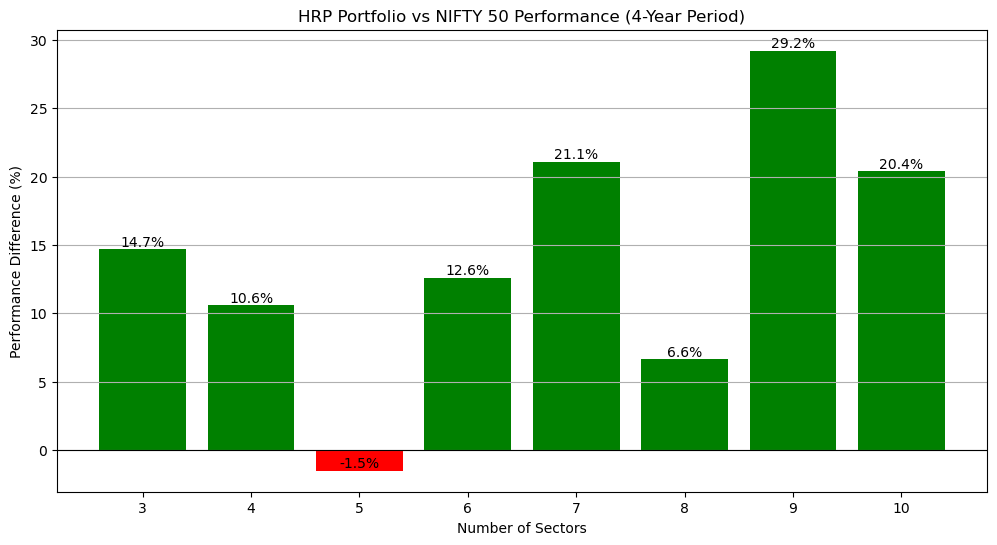


--- Investment Advice as of 2025-03-31 ---
Using training data from 2024-07-21 to 2025-03-30:

--- Top 3 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK')]
Recommended HRP Weights:
  ('^CNXSERVICE', '^CNXSERVICE'): 12.50%
  ('^CNXIT', '^CNXIT'): 50.00%
  ('^CNXPSUBANK', '^CNXPSUBANK'): 37.50%
------------------------------------------------------------
--- Top 4 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXMETAL', '^CNXMETAL')]
Recommended HRP Weights:
  ('^CNXSERVICE', '^CNXSERVICE'): 10.53%
  ('^CNXIT', '^CNXIT'): 47.37%
  ('^CNXPSUBANK', '^CNXPSUBANK'): 31.58%
  ('^CNXMETAL', '^CNXMETAL'): 10.53%
------------------------------------------------------------
--- Top 5 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXMETAL', '

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\2951988779.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\U

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd

# =============================================================================
# User Input: Number of Years for Simulation (between 1 and 15)
# =============================================================================
while True:
    try:
        num_years = int(input("Enter the number of years for simulation (1-15): "))
        if 1 <= num_years <= 15:
            break
        else:
            print("Please enter a number between 1 and 15.")
    except ValueError:
        print("Invalid input. Please enter an integer between 1 and 15.")

# =============================================================================
# 1. Data Download and Preprocessing
# =============================================================================
# Define sector tickers
sector_tickers = [
    "^CNXIT", "^CNXAUTO", "^NSEBANK", "^CNXFMCG", "^CNXMEDIA",
    "^CNXMETAL", "^CNXPSE", "^CNXMNC", "^CNXINFRA",
    "^CNXREALTY", "^CNXENERGY", "^CNXPSUBANK", "^CNXSERVICE"
    # "^CNXCONSUM","NIFTY_MIDCAP_100.NS"    #can be changed
]

# Define the time period based on user input
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * num_years)

# Download data for each sector (using auto-adjusted prices)
data_dict = {}
for ticker in sector_tickers:
    df = yf.download(ticker, start=start_date, end=end_date, progress=False, auto_adjust=True)
    if not df.empty and 'Close' in df.columns:
        data_dict[ticker] = df['Close']
    else:
        print(f"Data for {ticker} is missing or incomplete.")

if not data_dict:
    raise ValueError("No sector data downloaded. Check ticker symbols or network connection.")

# Create a DataFrame with aligned dates and drop missing values
prices = pd.concat(data_dict, axis=1).dropna()
returns = prices.pct_change().dropna()

# =============================================================================
# Download Benchmark Data for Trend/Stoploss Analysis (NIFTY 50)
# =============================================================================
benchmark_ticker = "^NSEI"
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date, progress=False, auto_adjust=True)
if benchmark_data.empty:
    raise ValueError("No benchmark data downloaded for trend analysis.")
benchmark_series = benchmark_data['Close'].squeeze()

# =============================================================================
# 2. Correlation Analysis & Clustering for Diversification
# =============================================================================
correlation_matrix = returns.corr()
print(f"\nCorrelation Matrix of Sector Returns (Last {num_years} Years):")
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sector Returns")
plt.show()

# Use KMeans clustering to assign each sector a cluster (3 clusters chosen here)
kmeans = KMeans(n_clusters=3, random_state=42)
sector_features = correlation_matrix.values
sector_labels = kmeans.fit_predict(sector_features)
sector_cluster_map = dict(zip(correlation_matrix.columns, sector_labels))
print("\nSector Cluster Mapping (for Diversification):")
for sector, cluster in sector_cluster_map.items():
    print(f"  {sector}: Cluster {cluster}")

# =============================================================================
# 3. HRP Weight Calculation Function (with Numerical Stability Fixes)
# =============================================================================
def get_hrp_weights(returns_df):
    """
    Calculate Hierarchical Risk Parity (HRP) weights.
    """
    if returns_df.shape[1] < 2:
        return pd.Series(1.0, index=returns_df.columns)
    
    corr = returns_df.corr().fillna(0)
    corr = 0.5 * (corr + corr.T)
    np.fill_diagonal(corr.values, 1.0)
    dist = np.sqrt(np.clip(0.5 * (1 - corr), 0.0, 1.0))
    dist = 0.5 * (dist + dist.T)
    dist = np.nan_to_num(dist, nan=0.0, posinf=0.0, neginf=0.0)
    
    condensed_dist = ssd.squareform(dist, checks=False)
    link = sch.linkage(condensed_dist, method='ward')
    sorted_indices = sch.leaves_list(link)
    ordered_tickers = returns_df.columns[sorted_indices]
    
    weights = pd.Series(1, index=ordered_tickers)
    cluster_sizes = pd.Series(1, index=ordered_tickers)
    
    for i in range(len(ordered_tickers) - 1):
        left, right = ordered_tickers[i], ordered_tickers[i+1]
        total_size = cluster_sizes[left] + cluster_sizes[right]
        weights[left] *= cluster_sizes[right] / total_size
        weights[right] *= cluster_sizes[left] / total_size
        cluster_sizes[left] = total_size
        cluster_sizes[right] = total_size
    
    return weights / weights.sum()

# =============================================================================
# 4. Diversified Sector Selection Function
# =============================================================================
def select_diversified_sectors(sharpe_scores, n, cluster_map):
    """
    Select top-n sectors based on Sharpe ratio while ensuring diversification.
    """
    sorted_sectors = sharpe_scores.sort_values(ascending=False).index.tolist()
    unique_selected = []
    used_clusters = set()
    for s in sorted_sectors:
        if cluster_map[s] not in used_clusters:
            unique_selected.append(s)
            used_clusters.add(cluster_map[s])
    selected = unique_selected.copy()
    for s in sorted_sectors:
        if len(selected) >= n:
            break
        if s not in selected:
            selected.append(s)
    return selected[:n]

# =============================================================================
# 5. Quarterly Rebalancing Simulation with Enhanced Risk Management & Transaction Costs
# =============================================================================
print("\n--- Quarterly Rebalancing Simulation with Enhanced Risk Management ---\n")
quarter_end_dates = pd.date_range(start=prices.index[0], end=prices.index[-1], freq='Q')
initial_capital = 100000
stoploss_pct = 0.05  # 5% stoploss threshold
transaction_cost_rate = 0.00075  # 0.15% per trade (0.075% per buying and selling)

results_summary = []
all_quarterly_results = {}

# Updated risk factor function: use a continuous measure.
def get_previous_quarter_risk_factor(i, benchmark_series, quarter_end_dates):
    if i == 0:
        return 1.0
    prev_q_start = prices.index[0] if i-1 == 0 else quarter_end_dates[i-2] + pd.Timedelta(days=1)
    prev_q_end = quarter_end_dates[i-1]
    benchmark_prev = benchmark_series[(benchmark_series.index >= prev_q_start) & (benchmark_series.index <= prev_q_end)]
    if benchmark_prev.empty:
        return 1.0
    prev_return = (benchmark_prev.iloc[-1] / benchmark_prev.iloc[0]) - 1
    risk_factor = np.clip(1 + prev_return, 0.5, 1.0)
    return risk_factor

for n in range(3, 11):
    cumulative_value = initial_capital
    quarterly_returns = []
    quarterly_results = []
    
    print(f"\n===== Simulating for Top {n} Sectors =====\n")
    
    for i, q_end in enumerate(quarter_end_dates):
        q_start = prices.index[0] if i == 0 else quarter_end_dates[i-1] + pd.Timedelta(days=1)
        if q_start >= prices.index[-1]:
            break
        
        # Use ~1 year of training data prior to quarter start
        training_end = q_start - pd.Timedelta(days=1)
        training_prices = prices[prices.index <= training_end]
        if training_prices.empty:
            continue
        training_returns = training_prices.pct_change().dropna()
        if training_returns.empty:
            continue
        
        sharpe_scores = training_returns.mean() / training_returns.std()
        selected_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
        if len(selected_sectors) == 0:
            continue
        
        selected_training_returns = training_returns[selected_sectors]
        hrp_weights = get_hrp_weights(selected_training_returns)
        
        period_prices = prices.loc[(prices.index >= q_start) & (prices.index <= q_end), selected_sectors]
        if period_prices.empty or len(period_prices) < 2:
            continue
        
        # Compute raw quarterly return from first to last day
        start_prices = period_prices.iloc[0]
        end_prices = period_prices.iloc[-1]
        sector_period_returns = (end_prices / start_prices) - 1
        raw_portfolio_return = np.dot(hrp_weights.loc[selected_sectors], sector_period_returns)
        
        # --- Intraperiod Stoploss Check --- 
        daily_returns = period_prices.pct_change().dropna()
        daily_portfolio_returns = daily_returns.apply(lambda row: np.dot(hrp_weights.loc[selected_sectors], row), axis=1)
        cum_daily = (1 + daily_portfolio_returns).cumprod()
        if cum_daily.min() < (1 - stoploss_pct):
            stoploss_triggered = True
            stoploss_return = -stoploss_pct
        else:
            stoploss_triggered = False
            stoploss_return = raw_portfolio_return
        
        # Use the updated risk factor function
        risk_factor = get_previous_quarter_risk_factor(i, benchmark_series, quarter_end_dates)
        effective_portfolio_return = risk_factor * stoploss_return
        
        # Incorporate transaction costs on entry and exit:
        # Entry: subtract 0.1% of cumulative_value, Exit: subtract 0.1% of new value.
        net_value_entry = cumulative_value * (1 - transaction_cost_rate)
        new_value = net_value_entry * (1 + effective_portfolio_return)
        net_value_exit = new_value * (1 - transaction_cost_rate)
        
        cumulative_value = net_value_exit
        quarterly_returns.append(effective_portfolio_return)
        
        quarterly_results.append({
            'quarter_start': q_start,
            'quarter_end': q_end,
            'selected_sectors': selected_sectors,
            'hrp_weights': hrp_weights.to_dict(),
            'raw_portfolio_return': raw_portfolio_return,
            'stoploss_triggered': stoploss_triggered,
            'stoploss_return': stoploss_return,
            'risk_factor': risk_factor,
            'effective_portfolio_return': effective_portfolio_return,
            'sector_returns': sector_period_returns.to_dict(),
            'cumulative_value': cumulative_value
        })
        
        print(f"Quarter {q_start.date()} to {q_end.date()}:")
        print(f"  Selected Sectors: {selected_sectors}")
        print("  HRP Weights:")
        for sector in selected_sectors:
            print(f"    {sector}: {hrp_weights[sector]:.2%}")
        print(f"  Raw Portfolio Return: {raw_portfolio_return:.2%}")
        if stoploss_triggered:
            print(f"  STOPLOSS Triggered: Capped Return = {stoploss_return:.2%}")
        print(f"  Risk Factor: {risk_factor:.2f}")
        print(f"  Effective Portfolio Return: {effective_portfolio_return:.2%}")
        print(f"  Cumulative Value after Transaction Costs: ₹{cumulative_value:,.2f}")
        print("-" * 80)
    
    annualized_vol = np.std(quarterly_returns) * np.sqrt(4) if len(quarterly_returns) > 1 else np.nan
    results_summary.append({
        'Number of Sectors': n,
        'HRP Portfolio Value': cumulative_value,
        'Annualized Volatility': annualized_vol
    })
    all_quarterly_results[n] = quarterly_results

hrp_results_df = pd.DataFrame(results_summary)
print("\n=== Simulation Summary for HRP Portfolios (Top N Sectors) ===")
print(hrp_results_df)

# =============================================================================
# Fixed Benchmark Analysis (NIFTY 50)
# =============================================================================
initial_capital_bench = 100000
benchmark_results = []

filtered_data = benchmark_series[benchmark_series.index >= pd.Timestamp(start_date)]
if len(filtered_data) < 2:
    raise ValueError("Not enough benchmark data for the selected period.")

start_price = float(filtered_data.iloc[0])
end_price = float(filtered_data.iloc[-1])
total_return = (end_price / start_price) - 1
cagr = ((1 + total_return) ** (1/num_years)) - 1
final_value = initial_capital_bench * (1 + total_return)

benchmark_results.append({
    'Time Period': f"{num_years} Years",
    'Total Return (%)': round(total_return * 100, 2),
    'CAGR (%)': round(cagr * 100, 2),
    'Final Portfolio Value': round(final_value, 2)
})

benchmark_results_df = pd.DataFrame(benchmark_results)
print(f"\n=== NIFTY 50 Benchmark Performance ({num_years} Years) ===")
print(benchmark_results_df.to_string(index=False))

nifty_final = final_value
comparison_df = hrp_results_df.copy()
comparison_df['NIFTY Value'] = nifty_final
comparison_df['Outperformance (%)'] = (
    (comparison_df['HRP Portfolio Value'] - nifty_final) / nifty_final * 100
).round(2)

print(f"\n=== Final Performance Comparison ({num_years}-Year Period) ===")
print(comparison_df[['Number of Sectors', 'HRP Portfolio Value', 'NIFTY Value', 'Outperformance (%)']].to_string(index=False))

plt.figure(figsize=(12, 6))
bars = plt.bar(
    comparison_df['Number of Sectors'],
    comparison_df['Outperformance (%)'],
    color=np.where(comparison_df['Outperformance (%)'] > 0, 'g', 'r')
)
plt.title(f"HRP Portfolio vs NIFTY 50 Performance ({num_years}-Year Period)")
plt.xlabel("Number of Sectors")
plt.ylabel("Performance Difference (%)")
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%', ha='center', va='bottom')
plt.show()

# =============================================================================
# Investment Advice Based on Last 1 Year Data
# =============================================================================
advice_date = datetime.today()
advice_training_end = advice_date - timedelta(days=1)
advice_training_start = advice_training_end - timedelta(days=252)
if advice_training_start < prices.index[0]:
    advice_training_start = prices.index[0]

advice_training_prices = prices.loc[advice_training_start:advice_training_end].ffill()
advice_training_returns = advice_training_prices.pct_change().dropna()

print(f"\n--- Investment Advice as of {advice_date.date()} ---")
print(f"Using training data from {advice_training_start.date()} to {advice_training_end.date()}:\n")
for n in range(3, 11):
    sharpe_scores = advice_training_returns.mean() / advice_training_returns.std()
    top_n_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
    if not top_n_sectors:
        continue
    selected_training_returns = advice_training_returns[top_n_sectors]
    hrp_weights = get_hrp_weights(selected_training_returns)
    print(f"--- Top {n} Sectors Recommendation ---")
    print("Selected Sectors:", top_n_sectors)
    print("Recommended HRP Weights:")
    for sector in top_n_sectors:
        print(f"  {sector}: {hrp_weights[sector]:.2%}")
    print("-" * 60)

In [23]:
#Consumption and Midcap indices included here

Enter the number of years for simulation (1-15):  4



Correlation Matrix of Sector Returns (Last 4 Years):
                                           ^CNXIT  ^CNXAUTO  ^NSEBANK  \
Ticker                                     ^CNXIT  ^CNXAUTO  ^NSEBANK   
                    Ticker                                              
^CNXIT              ^CNXIT               1.000000  0.355371  0.345102   
^CNXAUTO            ^CNXAUTO             0.355371  1.000000  0.611891   
^NSEBANK            ^NSEBANK             0.345102  0.611891  1.000000   
^CNXFMCG            ^CNXFMCG             0.345155  0.512383  0.421042   
^CNXMEDIA           ^CNXMEDIA            0.322144  0.520978  0.436505   
^CNXMETAL           ^CNXMETAL            0.358292  0.528378  0.541082   
^CNXPSE             ^CNXPSE              0.279941  0.569043  0.538725   
^CNXMNC             ^CNXMNC              0.467807  0.775112  0.620705   
^CNXINFRA           ^CNXINFRA            0.447109  0.711208  0.693621   
^CNXREALTY          ^CNXREALTY           0.347917  0.616716  0.579631 

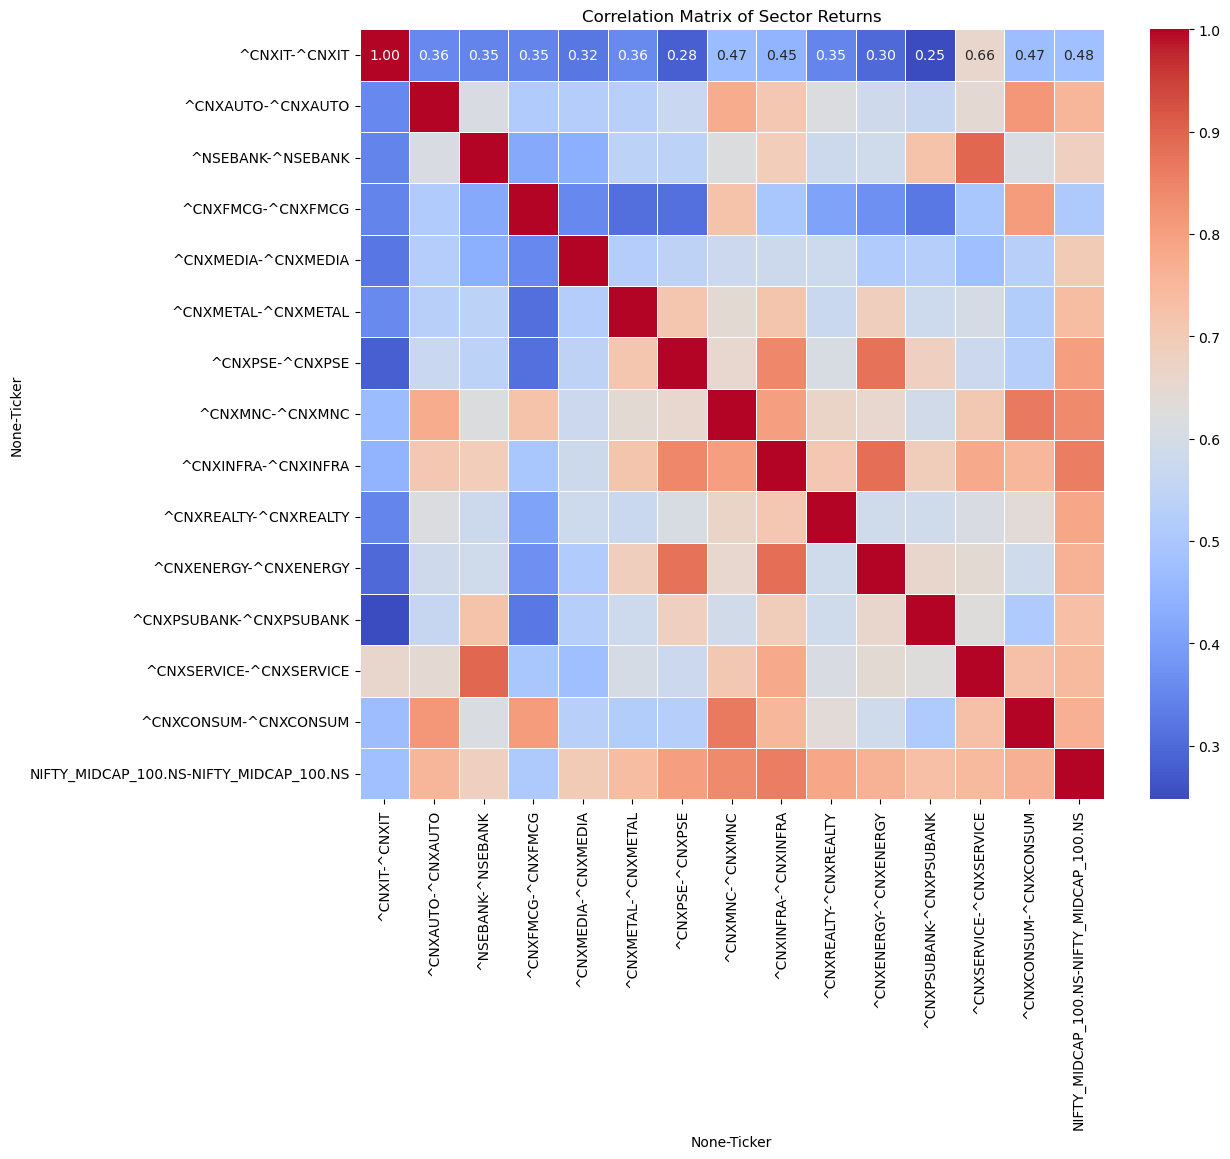

C:\Users\sarda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size



Sector Cluster Mapping (for Diversification):
  ('^CNXIT', '^CNXIT'): Cluster 2
  ('^CNXAUTO', '^CNXAUTO'): Cluster 1
  ('^NSEBANK', '^NSEBANK'): Cluster 0
  ('^CNXFMCG', '^CNXFMCG'): Cluster 1
  ('^CNXMEDIA', '^CNXMEDIA'): Cluster 0
  ('^CNXMETAL', '^CNXMETAL'): Cluster 0
  ('^CNXPSE', '^CNXPSE'): Cluster 0
  ('^CNXMNC', '^CNXMNC'): Cluster 1
  ('^CNXINFRA', '^CNXINFRA'): Cluster 1
  ('^CNXREALTY', '^CNXREALTY'): Cluster 0
  ('^CNXENERGY', '^CNXENERGY'): Cluster 0
  ('^CNXPSUBANK', '^CNXPSUBANK'): Cluster 0
  ('^CNXSERVICE', '^CNXSERVICE'): Cluster 1
  ('^CNXCONSUM', '^CNXCONSUM'): Cluster 1
  ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): Cluster 1

--- Quarterly Rebalancing Simulation with Enhanced Risk Management ---


===== Simulating for Top 3 Sectors =====

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 12.50%
    ('^CNXIT', '^CNXIT'): 37.50%
    ('^

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 12.50%
    ('^CNXAUTO', '^CNXAUTO'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 3.52%
  Risk Factor: 0.89
  Effective Portfolio Return: 3.15%
  Cumulative Value after Transaction Costs: ₹106,105.36
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXCONSUM', '^CNXCONSUM'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXCONSUM', '^CNXCONSUM'): 12.50%
    ('^CNXENERGY', '^CNXENERGY'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 3.72%
  Risk Factor: 1.00
  Effective Portfolio Return: 3.72%
  Cumulative Value after Transaction Costs: ₹109,889.33
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXPSUBANK', '^CNXPSUBANK'): 12.50%
    ('^CNXFMCG', '^CNXFMCG'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 0.07%
  Risk Factor: 1.00
  Effective Portfolio Return: 0.07%
  Cumulative Value after Transaction Costs: ₹109,799.09
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 12.50%
    ('^CNXPSE', '^CNXPSE'): 37.50%
    ('^CNXIT', '^CNXIT'): 50.00%
  Raw Portfolio Return: 8.35%
  Risk Factor: 0.95
  Effective Portfolio Return: 7.96%
  Cumulative Value after Transaction Costs: ₹118,363.82
--------------------------------------------------------------------------------
Quarter 2023-07-01 to 2023-09-30:
  Selected

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 12.50%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 15.36%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹123,518.29
--------------------------------------------------------------------------------
Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 12.50%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 3.29%
  Risk Factor: 1.00
  Effective Portfolio Return: 3.29%
  Cumulative Value after Transaction Costs: ₹127,390.40
------

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 12.50%
    ('^CNXINFRA', '^CNXINFRA'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 7.29%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.29%
  Cumulative Value after Transaction Costs: ₹136,468.26
--------------------------------------------------------------------------------
Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 12.50%
    ('^CNXAUTO', '^CNXAUTO'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: 9.17%
  Risk Factor: 1.00
  Effective Portfolio Return: 9.17%
  Cumulative Value after Transaction Costs: ₹148,761.71
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXIT', '^CNXIT')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 12.50%
    ('^CNXCONSUM', '^CNXCONSUM'): 50.00%
    ('^CNXIT', '^CNXIT'): 37.50%
  Raw Portfolio Return: -6.76%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹141,111.72
--------------------------------------------------------------------------------

===== Simulating for Top 4 Sectors =====

Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXMNC', '^CNXMNC'): 10.53%
    ('^CNXPSE', '^CNXPSE'): 47.37%
  Raw Portfolio Return: 14.87%
  Risk Factor: 1.00
  Effective Portfolio Return: 14.87%
  Cumulative Value after Transacti

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 10.53%
    ('^CNXAUTO', '^CNXAUTO'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXPSE', '^CNXPSE'): 47.37%
  Raw Portfolio Return: 3.59%
  Risk Factor: 0.89
  Effective Portfolio Return: 3.20%
  Cumulative Value after Transaction Costs: ₹108,574.26
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXCONSUM', '^CNXCONSUM'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXCONSUM', '^CNXCONSUM'): 10.53%
    ('^CNXENERGY', '^CNXENERGY'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXFMCG', '^CNXFMCG'): 47.37%
  Raw Portfolio Return: 3.04%
  Risk Factor: 1.00
  Effective Portfolio Return: 3.04%
  Cumulative Value after Transaction Costs:

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 10.53%
    ('^CNXPSE', '^CNXPSE'): 31.58%
    ('^CNXIT', '^CNXIT'): 47.37%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 10.53%
  Raw Portfolio Return: 8.19%
  Risk Factor: 0.95
  Effective Portfolio Return: 7.82%
  Cumulative Value after Transaction Costs: ₹114,075.62
--------------------------------------------------------------------------------
Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXIT', '^CNXIT'), ('^CNXCONSUM', '^CNXCONSUM')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 31.58%
    ('^CNXPSE', '^CNXPSE'): 10.53%
    ('^CNXIT', '^CNXIT'): 47.37%
    ('^CNXCONSUM', '^CNXCONSUM'): 10.53%
  Raw Portfolio Return: 5.08%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.08%
  Cumulative Value after Transaction Costs: ₹119,69

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 10.53%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 10.53%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXINFRA', '^CNXINFRA'): 47.37%
  Raw Portfolio Return: 8.50%
  Risk Factor: 1.00
  Effective Portfolio Return: 8.50%
  Cumulative Value after Transaction Costs: ₹123,005.86
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 10.53%
    ('^CNXINFRA', '^CNXINFRA'): 47.37%
    ('^CNXIT', '^CNXIT'): 31.58%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 10.53%
  Raw Portfolio Return: 6.95%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.95%
  Cumul

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXMNC', '^CNXMNC'): 8.41%
    ('^CNXPSE', '^CNXPSE'): 9.35%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 44.86%
  Raw Portfolio Return: 14.49%
  Risk Factor: 1.00
  Effective Portfolio Return: 14.49%
  Cumulative Value after Transaction Costs: ₹114,320.79
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXCONSUM', '^CNXCONSUM'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 8.41%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXPSE', '^CNXPSE'): 9.35%
    ('^CNXCONSUM', '^CNXCONSUM'): 9.35%
  

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMEDIA', '^CNXMEDIA')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 8.41%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXINFRA', '^CNXINFRA'): 44.86%
    ('^CNXMETAL', '^CNXMETAL'): 9.35%
    ('^CNXMEDIA', '^CNXMEDIA'): 9.35%
  Raw Portfolio Return: -15.82%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹105,373.35
--------------------------------------------------------------------------------
Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXCONSUM', '^CNXCONSUM')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 28.04%
    ('^CNXAUTO', '^CNXAUTO'): 8.41%
    ('^CNXIT', '^CNXIT'): 9.35%
    ('^CNXPSE', '^CNXPSE

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXCONSUM', '^CNXCONSUM'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXCONSUM', '^CNXCONSUM'): 8.41%
    ('^CNXENERGY', '^CNXENERGY'): 9.35%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXFMCG', '^CNXFMCG'): 9.35%
    ('^CNXMNC', '^CNXMNC'): 44.86%
  Raw Portfolio Return: 3.03%
  Risk Factor: 1.00
  Effective Portfolio Return: 3.03%
  Cumulative Value after Transaction Costs: ₹117,897.61
--------------------------------------------------------------------------------
Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXPSUBANK', '^CNXPSUBANK'): 28.04%
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXIT', '^CNXIT'): 44.86%
    ('^CNXENERGY', '^CNXENERGY'): 9.35%
    ('^CNXPSE', '^CNXPSE'): 9.35%
 

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.41%
    ('^CNXPSE', '^CNXPSE'): 9.35%
    ('^CNXIT', '^CNXIT'): 44.86%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 28.04%
    ('^CNXINFRA', '^CNXINFRA'): 9.35%
  Raw Portfolio Return: 7.69%
  Risk Factor: 0.95
  Effective Portfolio Return: 7.33%
  Cumulative Value after Transaction Costs: ₹119,855.32
--------------------------------------------------------------------------------
Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXIT', '^CNXIT'), ('^CNXCONSUM', '^CNXCONSUM'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 9.35%
    ('^CNXPSE', '^CNXPSE'): 8.41%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXCONSUM', '^CNXCONSUM'): 9.35%
    ('NIFTY_MIDCAP_100.NS', 

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 9.35%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 9.35%
    ('^CNXIT', '^CNXIT'): 8.41%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 28.04%
    ('^CNXFMCG', '^CNXFMCG'): 44.86%
  Raw Portfolio Return: 11.96%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹124,309.52
--------------------------------------------------------------------------------
Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 28.04%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'):

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 8.41%
    ('^CNXINFRA', '^CNXINFRA'): 44.86%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 9.35%
    ('^CNXAUTO', '^CNXAUTO'): 9.35%
  Raw Portfolio Return: 7.94%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.94%
  Cumulative Value after Transaction Costs: ₹138,149.33
--------------------------------------------------------------------------------
Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 9.35%
    ('^CNXAUTO', '^CNXAUTO'): 9.35%
    ('^CNXIT', '^CNXIT'): 28.04%
    ('^CNXMNC', '^CNXMNC'): 8.41%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCA

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXCONSUM', '^CNXCONSUM'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 7.69%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXPSE', '^CNXPSE'): 8.55%
    ('^CNXCONSUM', '^CNXCONSUM'): 8.55%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 6.84%
    ('^CNXINFRA', '^CNXINFRA'): 42.74%
  Raw Portfolio Return: 1.60%
  Risk Factor: 1.00
  Effective Portfolio Return: 1.60%
  Cumulative Value after Transaction Costs: ₹116,355.01
--------------------------------------------------------------------------------
Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^C

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXINFRA', '^CNXINFRA'): 7.69%
    ('^CNXMETAL', '^CNXMETAL'): 8.55%
    ('^CNXMEDIA', '^CNXMEDIA'): 8.55%
    ('^CNXPSE', '^CNXPSE'): 42.74%
  Raw Portfolio Return: -15.35%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹104,802.01
--------------------------------------------------------------------------------
Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXMEDIA', '^CNXMEDIA')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 25.64%
    ('

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXCONSUM', '^CNXCONSUM'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS')]
  HRP Weights:
    ('^CNXCONSUM', '^CNXCONSUM'): 6.84%
    ('^CNXENERGY', '^CNXENERGY'): 8.55%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXMNC', '^CNXMNC'): 42.74%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 7.69%
  Raw Portfolio Return: 3.13%
  Risk Factor: 1.00
  Effective Portfolio Return: 3.13%
  Cumulative Value after Transaction Costs: ₹117,342.79
--------------------------------------------------------------------------------
Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXPSE', '^CNXPSE'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXPSUBANK', '^CNXPSUBANK'): 25.64%
    ('^CNX

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXIT', '^CNXIT'), ('^CNXCONSUM', '^CNXCONSUM'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXPSE', '^CNXPSE'): 8.55%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXCONSUM', '^CNXCONSUM'): 6.84%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 7.69%
    ('^CNXMNC', '^CNXMNC'): 42.74%
  Raw Portfolio Return: 4.81%
  Risk Factor: 1.00
  Effective Portfolio Return: 4.81%
  Cumulative Value after Transaction Costs: ₹130,159.46
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 8.55%
    ('NIFTY_M

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXCONSUM', '^CNXCONSUM')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 7.69%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 6.84%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXINFRA', '^CNXINFRA'): 42.74%
    ('^CNXFMCG', '^CNXFMCG'): 8.55%
    ('^CNXCONSUM', '^CNXCONSUM'): 8.55%
  Raw Portfolio Return: 7.39%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.39%
  Cumulative Value after Transaction Costs: ₹156,562.43
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXAUTO', '^CNXAUTO'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 7.69%
    (

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 8.55%
    ('^CNXAUTO', '^CNXAUTO'): 8.55%
    ('^CNXIT', '^CNXIT'): 25.64%
    ('^CNXMNC', '^CNXMNC'): 7.69%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 6.84%
    ('^CNXINFRA', '^CNXINFRA'): 42.74%
  Raw Portfolio Return: 7.57%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.57%
  Cumulative Value after Transaction Costs: ₹185,266.63
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 8.55%
    ('^CNXCONSUM', '^CN

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXCONSUM', '^CNXCONSUM')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 5.69%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXMNC', '^CNXMNC'): 7.17%
    ('^CNXPSE', '^CNXPSE'): 40.96%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 6.37%
    ('^CNXMEDIA', '^CNXMEDIA'): 7.96%
    ('^CNXCONSUM', '^CNXCONSUM'): 7.96%
  Raw Portfolio Return: 15.08%
  Risk Factor: 1.00
  Effective Portfolio Return: 15.08%
  Cumulative Value after Transaction Costs: ₹114,910.64
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXCONSUM', '^CNXCONSUM'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXINFRA', '^CNXINF

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXMNC', '^CNXMNC'): 7.96%
    ('^CNXENERGY', '^CNXENERGY'): 6.37%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 5.69%
    ('^CNXCONSUM', '^CNXCONSUM'): 7.96%
    ('^CNXINFRA', '^CNXINFRA'): 40.96%
    ('^CNXREALTY', '^CNXREALTY'): 7.17%
  Raw Portfolio Return: -2.21%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹103,451.33
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), (

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 7.96%
    ('^CNXAUTO', '^CNXAUTO'): 5.69%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXPSE', '^CNXPSE'): 7.96%
    ('^CNXCONSUM', '^CNXCONSUM'): 40.96%
    ('^CNXMEDIA', '^CNXMEDIA'): 6.37%
    ('^CNXINFRA', '^CNXINFRA'): 7.17%
  Raw Portfolio Return: 8.42%
  Risk Factor: 0.89
  Effective Portfolio Return: 7.52%
  Cumulative Value after Transaction Costs: ₹105,404.92
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXCONSUM', '^CNXCONSUM'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXPSE', '^CNXPSE')]


C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXPSE', '^CNXPSE'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXCONSUM', '^CNXCONSUM')]
  HRP Weights:
    ('^CNXPSUBANK', '^CNXPSUBANK'): 23.89%
    ('^CNXFMCG', '^CNXFMCG'): 5.69%
    ('^CNXIT', '^CNXIT'): 6.37%
    ('^CNXENERGY', '^CNXENERGY'): 7.96%
    ('^CNXPSE', '^CNXPSE'): 7.17%
    ('^CNXMETAL', '^CNXMETAL'): 7.96%
    ('^CNXCONSUM', '^CNXCONSUM'): 40.96%
  Raw Portfolio Return: -7.89%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹102,790.86
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXCONSUM', '^

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXIT', '^CNXIT'), ('^CNXCONSUM', '^CNXCONSUM'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSUBANK', '^CNXPSUBANK')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 7.17%
    ('^CNXPSE', '^CNXPSE'): 23.89%
    ('^CNXIT', '^CNXIT'): 7.96%
    ('^CNXCONSUM', '^CNXCONSUM'): 5.69%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 6.37%
    ('^CNXMNC', '^CNXMNC'): 40.96%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 7.96%
  Raw Portfolio Return: 7.72%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.72%
  Cumulative Value after Transaction Costs: ₹124,096.23
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXINFRA', '^

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXPSUBANK', '^CNXPSUBANK')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 7.96%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 7.96%
    ('^CNXIT', '^CNXIT'): 6.37%
    ('^CNXINFRA', '^CNXINFRA'): 7.17%
    ('^CNXFMCG', '^CNXFMCG'): 5.69%
    ('^CNXCONSUM', '^CNXCONSUM'): 40.96%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 23.89%
  Raw Portfolio Return: 10.05%
  Risk Factor: 1.00
  Effective Portfolio Return: 10.05%
  Cumulative Value after Transaction Costs: ₹153,320.22
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXAUTO', '^CNXAUTO'), ('NIFTY_MIDCAP_100.NS', 'N

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXCONSUM', '^CNXCONSUM')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 7.96%
    ('^CNXAUTO', '^CNXAUTO'): 6.37%
    ('^CNXIT', '^CNXIT'): 23.89%
    ('^CNXMNC', '^CNXMNC'): 5.69%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 7.96%
    ('^CNXINFRA', '^CNXINFRA'): 7.17%
    ('^CNXCONSUM', '^CNXCONSUM'): 40.96%
  Raw Portfolio Return: 11.37%
  Risk Factor: 1.00
  Effective Portfolio Return: 11.37%
  Cumulative Value after Transaction Costs: ₹182,483.36
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXAUTO', '^CNXAUTO'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), 

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 5.37%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXMNC', '^CNXMNC'): 6.76%
    ('^CNXPSE', '^CNXPSE'): 4.83%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 6.01%
    ('^CNXMEDIA', '^CNXMEDIA'): 7.51%
    ('^CNXCONSUM', '^CNXCONSUM'): 7.51%
    ('^CNXENERGY', '^CNXENERGY'): 39.45%
  Raw Portfolio Return: 15.92%
  Risk Factor: 1.00
  Effective Portfolio Return: 15.92%
  Cumulative Value after Transaction Costs: ₹115,748.85
--------------------------------------------------------------------------------


C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXCONSUM', '^CNXCONSUM'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXMNC', '^CNXMNC'): 7.51%
    ('^CNXIT', '^CNXIT'): 5.37%
    ('^CNXPSE', '^CNXPSE'): 22.54%
    ('^CNXCONSUM', '^CNXCONSUM'): 4.83%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 6.76%
    ('^CNXINFRA', '^CNXINFRA'): 6.01%
    ('^CNXFMCG', '^CNXFMCG'): 39.45%
    ('^CNXENERGY', '^CNXENERGY'): 7.51%
  Raw Portfolio Return: -3.90%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹109,796.53
--------------------------------------------------------------------------------
Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY'

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-04-01 to 2022-06-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 4.83%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXINFRA', '^CNXINFRA'): 6.76%
    ('^CNXMETAL', '^CNXMETAL'): 5.37%
    ('^CNXMEDIA', '^CNXMEDIA'): 7.51%
    ('^CNXPSE', '^CNXPSE'): 39.45%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 6.01%
    ('^CNXREALTY', '^CNXREALTY'): 7.51%
  Raw Portfolio Return: -15.16%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹98,894.72
--------------------------------------------------------------------------------
Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXAUTO', '^CN

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXCONSUM', '^CNXCONSUM'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNXIT'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXMNC', '^CNXMNC'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXPSE', '^CNXPSE'), ('^CNXMETAL', '^CNXMETAL')]
  HRP Weights:
    ('^CNXCONSUM', '^CNXCONSUM'): 4.83%
    ('^CNXENERGY', '^CNXENERGY'): 7.51%
    ('^CNXIT', '^CNXIT'): 6.76%
    ('^CNXFMCG', '^CNXFMCG'): 6.01%
    ('^CNXMNC', '^CNXMNC'): 39.45%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 5.37%
    ('^CNXPSE', '^CNXPSE'): 7.51%
    ('^CNXMETAL', '^CNXMETAL'): 22.54%
  Raw Portfolio Return: 6.88%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.88%
  Cumulative Value after Transaction Costs: ₹113,445.36
--------------------------------------------------------------------------------
Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-04-01 to 2023-06-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXCONSUM', '^CNXCONSUM'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 5.37%
    ('^CNXPSE', '^CNXPSE'): 7.51%
    ('^CNXIT', '^CNXIT'): 6.01%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 22.54%
    ('^CNXINFRA', '^CNXINFRA'): 7.51%
    ('^CNXCONSUM', '^CNXCONSUM'): 4.83%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 6.76%
    ('^CNXMNC', '^CNXMNC'): 39.45%
  Raw Portfolio Return: 12.28%
  Risk Factor: 0.95
  Effective Portfolio Return: 11.72%
  Cumulative Value after Transaction Costs: ₹120,040.74
--------------------------------------------------------------------------------
Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXIT', '^CNXIT'), ('^CNXCONSUM', '^CNXCONSUM')

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXAUTO', '^CNXAUTO')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 7.51%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 6.76%
    ('^CNXIT', '^CNXIT'): 5.37%
    ('^CNXINFRA', '^CNXINFRA'): 6.01%
    ('^CNXFMCG', '^CNXFMCG'): 4.83%
    ('^CNXCONSUM', '^CNXCONSUM'): 39.45%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 22.54%
    ('^CNXAUTO', '^CNXAUTO'): 7.51%
  Raw Portfolio Return: 10.70%
  Risk Factor: 1.00
  Effective Portfolio Return: 10.70%
  Cumulative Value after Transaction Costs: ₹159,559.53
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXIT', '^CNXIT'), ('^CNXPSUBANK', '^CNXP

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 5.37%
    ('^CNXAUTO', '^CNXAUTO'): 7.51%
    ('^CNXIT', '^CNXIT'): 22.54%
    ('^CNXMNC', '^CNXMNC'): 7.51%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 4.83%
    ('^CNXINFRA', '^CNXINFRA'): 39.45%
    ('^CNXCONSUM', '^CNXCONSUM'): 6.76%
    ('^CNXREALTY', '^CNXREALTY'): 6.01%
  Raw Portfolio Return: 7.58%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.58%
  Cumulative Value after Transaction Costs: ₹183,660.03
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNX

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXPSUBANK', '^CNXPSUBANK')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 5.11%
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXMNC', '^CNXMNC'): 6.44%
    ('^CNXPSE', '^CNXPSE'): 4.17%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 5.72%
    ('^CNXMEDIA', '^CNXMEDIA'): 7.16%
    ('^CNXCONSUM', '^CNXCONSUM'): 7.16%
    ('^CNXENERGY', '^CNXENERGY'): 38.17%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 4.60%
  Raw Portfolio Return: 15.13%
  Risk Factor: 1.00
  Effective Portfolio Return: 15.13%
  Cumulative Value after Transaction Costs: ₹114,956.16
--------------------------------------------------------------------------------
Quarter 2021-10-01 to 2021-12-31:
  Selected Sectors: [('^CNXMNC', '^CNXMNC'), ('

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMEDIA', '^CNXMEDIA')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXMNC', '^CNXMNC'): 7.16%
    ('^CNXENERGY', '^CNXENERGY'): 5.72%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 5.11%
    ('^CNXCONSUM', '^CNXCONSUM'): 7.16%
    ('^CNXINFRA', '^CNXINFRA'): 4.60%
    ('^CNXREALTY', '^CNXREALTY'): 4.17%
    ('^CNXSERVICE', '^CNXSERVICE'): 6.44%
    ('^CNXMEDIA', '^CNXMEDIA'): 38.17%
  Raw Portfolio Return: 0.10%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹103,492.31
--------------------------------------------------------------------------------
Quarter 2022-04-01 to 202

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 7.16%
    ('^CNXAUTO', '^CNXAUTO'): 5.72%
    ('^CNXIT', '^CNXIT'): 6.44%
    ('^CNXPSE', '^CNXPSE'): 21.47%
    ('^CNXCONSUM', '^CNXCONSUM'): 5.11%
    ('^CNXMEDIA', '^CNXMEDIA'): 4.17%
    ('^CNXINFRA', '^CNXINFRA'): 7.16%
    ('^CNXMNC', '^CNXMNC'): 4.60%
    ('^CNXREALTY', '^CNXREALTY'): 38.17%
  Raw Portfolio Return: 7.67%
  Risk Factor: 0.89
  Effective Portfolio Return: 6.85%
  Cumulative Value after Transaction Costs: ₹104,786.92
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXCONSUM', '^CNXCONSUM'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXIT', '^CNX

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXPSE', '^CNXPSE'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXCONSUM', '^CNXCONSUM'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXPSUBANK', '^CNXPSUBANK'): 21.47%
    ('^CNXFMCG', '^CNXFMCG'): 4.17%
    ('^CNXIT', '^CNXIT'): 4.60%
    ('^CNXENERGY', '^CNXENERGY'): 5.72%
    ('^CNXPSE', '^CNXPSE'): 5.11%
    ('^CNXMETAL', '^CNXMETAL'): 7.16%
    ('^CNXCONSUM', '^CNXCONSUM'): 38.17%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 7.16%
    ('^CNXINFRA', '^CNXINFRA'): 6.44%
  Raw Portfolio Return: -7.68%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹105,819.02
--------------------------------------------------------------------------------
Quarter 2023-04-01 to 2023-06-30

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXIT', '^CNXIT'), ('^CNXCONSUM', '^CNXCONSUM'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXINFRA', '^CNXINFRA')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 7.16%
    ('^CNXPSE', '^CNXPSE'): 4.60%
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXCONSUM', '^CNXCONSUM'): 6.44%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 4.17%
    ('^CNXMNC', '^CNXMNC'): 5.72%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 5.11%
    ('^CNXAUTO', '^CNXAUTO'): 7.16%
    ('^CNXINFRA', '^CNXINFRA'): 38.17%
  Raw Portfolio Return: 7.78%
  Risk Factor: 1.00
  Effective Portfolio Return: 7.78%
  Cumulative Value after Transaction Costs: ₹126,868.71
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 2023-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_1

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 7.16%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 5.72%
    ('^CNXIT', '^CNXIT'): 4.60%
    ('^CNXINFRA', '^CNXINFRA'): 5.11%
    ('^CNXFMCG', '^CNXFMCG'): 4.17%
    ('^CNXCONSUM', '^CNXCONSUM'): 38.17%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 21.47%
    ('^CNXAUTO', '^CNXAUTO'): 6.44%
    ('^CNXENERGY', '^CNXENERGY'): 7.16%
  Raw Portfolio Return: 11.15%
  Risk Factor: 1.00
  Effective Portfolio Return: 11.15%
  Cumulative Value after Transaction Costs: ₹161,587.77
--------------------------------------------------------------------------------
Quarter 2024-04-01 to 2024-06-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXPSUBANK', '^CNXPSUBANK')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 4.60%
    ('^CNXAUTO', '^CNXAUTO'): 7.16%
    ('^CNXIT', '^CNXIT'): 21.47%
    ('^CNXMNC', '^CNXMNC'): 7.16%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 4.17%
    ('^CNXINFRA', '^CNXINFRA'): 38.17%
    ('^CNXCONSUM', '^CNXCONSUM'): 6.44%
    ('^CNXREALTY', '^CNXREALTY'): 5.11%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 5.72%
  Raw Portfolio Return: 6.76%
  Risk Factor: 1.00
  Effective Portfolio Return: 6.76%
  Cumulative Value after Transaction Costs: ₹185,706.66
--------------------------------------------------------------------------------
Quarter 2024-10-01 to 2024-12-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXCO

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2021-07-01 to 2021-09-30:
  Selected Sectors: [('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXMETAL', '^CNXMETAL'): 20.58%
    ('^CNXIT', '^CNXIT'): 4.00%
    ('^CNXMNC', '^CNXMNC'): 6.86%
    ('^CNXPSE', '^CNXPSE'): 4.90%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 6.18%
    ('^CNXMEDIA', '^CNXMEDIA'): 6.86%
    ('^CNXCONSUM', '^CNXCONSUM'): 3.66%
    ('^CNXENERGY', '^CNXENERGY'): 4.41%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 5.49%
    ('^CNXFMCG', '^CNXFMCG'): 37.05%
  Raw Portfolio Return: 11.27%
  Risk Factor: 1.00
  Effective Portfolio Return: 11.27%
  Cumulative Value after Transaction Costs: ₹111,100.80
--------------------------------------------------------------------------------
Quarter 2021-10-01 

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-01-01 to 2022-03-31:
  Selected Sectors: [('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('^CNXENERGY', '^CNXENERGY'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXPSE', '^CNXPSE')]
  HRP Weights:
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^CNXMNC', '^CNXMNC'): 3.66%
    ('^CNXENERGY', '^CNXENERGY'): 4.90%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 6.18%
    ('^CNXCONSUM', '^CNXCONSUM'): 37.05%
    ('^CNXINFRA', '^CNXINFRA'): 5.49%
    ('^CNXREALTY', '^CNXREALTY'): 6.86%
    ('^CNXSERVICE', '^CNXSERVICE'): 4.00%
    ('^CNXMEDIA', '^CNXMEDIA'): 6.86%
    ('^CNXPSE', '^CNXPSE'): 4.41%
  Raw Portfolio Return: -2.50%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 0.99
  Effective Portfolio Return: -4.95%
  Cumulative Value after Transaction Costs: ₹100,021.42
-----------------------------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2022-07-01 to 2022-09-30:
  Selected Sectors: [('^CNXENERGY', '^CNXENERGY'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXIT', '^CNXIT'), ('^CNXPSE', '^CNXPSE'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXMEDIA', '^CNXMEDIA'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXFMCG', '^CNXFMCG')]
  HRP Weights:
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^CNXAUTO', '^CNXAUTO'): 4.41%
    ('^CNXIT', '^CNXIT'): 4.90%
    ('^CNXPSE', '^CNXPSE'): 20.58%
    ('^CNXCONSUM', '^CNXCONSUM'): 3.66%
    ('^CNXMEDIA', '^CNXMEDIA'): 6.18%
    ('^CNXINFRA', '^CNXINFRA'): 6.86%
    ('^CNXMNC', '^CNXMNC'): 37.05%
    ('^CNXREALTY', '^CNXREALTY'): 5.49%
    ('^CNXFMCG', '^CNXFMCG'): 4.00%
  Raw Portfolio Return: 8.93%
  Risk Factor: 0.89
  Effective Portfolio Return: 7.97%
  Cumulative Value after Transaction Costs: ₹102,335.88
--------------------------------------------------------------------------------
Quarter 2022-10-01 to 2022-12-31:
  Selected Sectors: [('^CNXCONSUM',

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-01-01 to 2023-03-31:
  Selected Sectors: [('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXIT', '^CNXIT'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXPSE', '^CNXPSE'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXCONSUM', '^CNXCONSUM'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXMNC', '^CNXMNC')]
  HRP Weights:
    ('^CNXPSUBANK', '^CNXPSUBANK'): 20.58%
    ('^CNXFMCG', '^CNXFMCG'): 4.00%
    ('^CNXIT', '^CNXIT'): 4.41%
    ('^CNXENERGY', '^CNXENERGY'): 5.49%
    ('^CNXPSE', '^CNXPSE'): 4.90%
    ('^CNXMETAL', '^CNXMETAL'): 6.86%
    ('^CNXCONSUM', '^CNXCONSUM'): 3.66%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 6.86%
    ('^CNXINFRA', '^CNXINFRA'): 6.18%
    ('^CNXMNC', '^CNXMNC'): 37.05%
  Raw Portfolio Return: -6.76%
  STOPLOSS Triggered: Capped Return = -5.00%
  Risk Factor: 1.00
  Effective Portfolio Return: -5.00%
  Cumulative Value after Transaction Costs: ₹109,876.16
-------------------------------------------------------

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2023-07-01 to 2023-09-30:
  Selected Sectors: [('^CNXFMCG', '^CNXFMCG'), ('^CNXPSE', '^CNXPSE'), ('^CNXIT', '^CNXIT'), ('^CNXCONSUM', '^CNXCONSUM'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXMNC', '^CNXMNC'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXFMCG', '^CNXFMCG'): 4.00%
    ('^CNXPSE', '^CNXPSE'): 6.86%
    ('^CNXIT', '^CNXIT'): 4.90%
    ('^CNXCONSUM', '^CNXCONSUM'): 3.66%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 6.18%
    ('^CNXMNC', '^CNXMNC'): 37.05%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 20.58%
    ('^CNXAUTO', '^CNXAUTO'): 4.41%
    ('^CNXINFRA', '^CNXINFRA'): 5.49%
    ('^CNXREALTY', '^CNXREALTY'): 6.86%
  Raw Portfolio Return: 8.92%
  Risk Factor: 1.00
  Effective Portfolio Return: 8.92%
  Cumulative Value after Transaction Costs: ₹133,221.85
--------------------------------------------------------------------------------
Quarter 2023-10-01 to 202

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-01-01 to 2024-03-31:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXIT', '^CNXIT'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXFMCG', '^CNXFMCG'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXENERGY', '^CNXENERGY'), ('^CNXREALTY', '^CNXREALTY')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 20.58%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 4.90%
    ('^CNXIT', '^CNXIT'): 4.00%
    ('^CNXINFRA', '^CNXINFRA'): 4.41%
    ('^CNXFMCG', '^CNXFMCG'): 3.66%
    ('^CNXCONSUM', '^CNXCONSUM'): 37.05%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 6.86%
    ('^CNXAUTO', '^CNXAUTO'): 6.18%
    ('^CNXENERGY', '^CNXENERGY'): 6.86%
    ('^CNXREALTY', '^CNXREALTY'): 5.49%
  Raw Portfolio Return: 10.53%
  Risk Factor: 1.00
  Effective Portfolio Return: 10.53%
  Cumulative Value after Transaction Costs: ₹166,116.47
--------------------------------------------------------------------------------
Quarter 202

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


Quarter 2024-07-01 to 2024-09-30:
  Selected Sectors: [('^CNXPSE', '^CNXPSE'), ('^CNXAUTO', '^CNXAUTO'), ('^CNXIT', '^CNXIT'), ('^CNXMNC', '^CNXMNC'), ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'), ('^CNXINFRA', '^CNXINFRA'), ('^CNXCONSUM', '^CNXCONSUM'), ('^CNXREALTY', '^CNXREALTY'), ('^CNXPSUBANK', '^CNXPSUBANK'), ('^CNXENERGY', '^CNXENERGY')]
  HRP Weights:
    ('^CNXPSE', '^CNXPSE'): 5.49%
    ('^CNXAUTO', '^CNXAUTO'): 6.86%
    ('^CNXIT', '^CNXIT'): 20.58%
    ('^CNXMNC', '^CNXMNC'): 6.86%
    ('NIFTY_MIDCAP_100.NS', 'NIFTY_MIDCAP_100.NS'): 3.66%
    ('^CNXINFRA', '^CNXINFRA'): 4.90%
    ('^CNXCONSUM', '^CNXCONSUM'): 6.18%
    ('^CNXREALTY', '^CNXREALTY'): 37.05%
    ('^CNXPSUBANK', '^CNXPSUBANK'): 4.00%
    ('^CNXENERGY', '^CNXENERGY'): 4.41%
  Raw Portfolio Return: 5.29%
  Risk Factor: 1.00
  Effective Portfolio Return: 5.29%
  Cumulative Value after Transaction Costs: ₹188,763.02
--------------------------------------------------------------------------------
Quarter 2024-10-0

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size


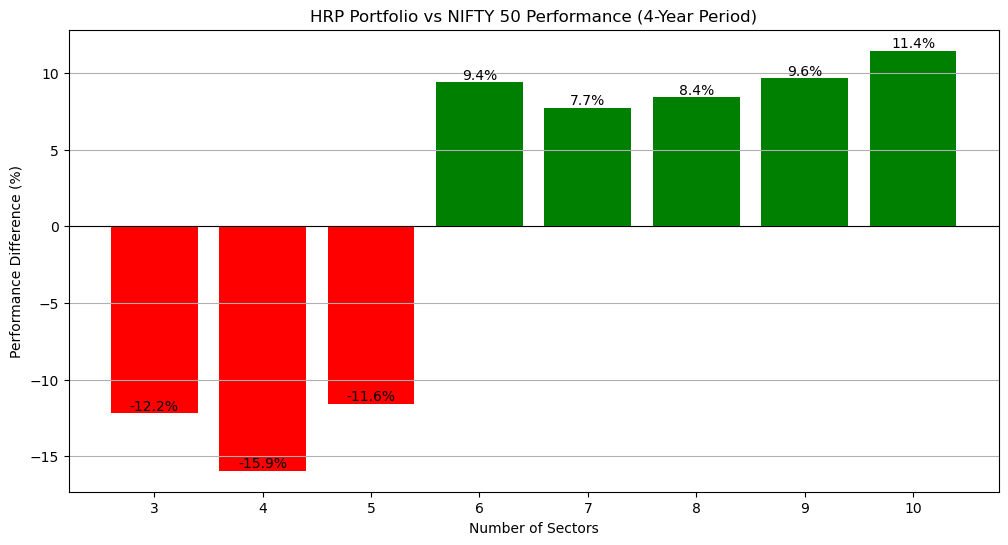


--- Investment Advice as of 2025-03-31 ---
Using training data from 2024-07-21 to 2025-03-30:

--- Top 3 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT')]
Recommended HRP Weights:
  ('^CNXSERVICE', '^CNXSERVICE'): 12.50%
  ('^CNXMETAL', '^CNXMETAL'): 37.50%
  ('^CNXIT', '^CNXIT'): 50.00%
------------------------------------------------------------
--- Top 4 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^NSEBANK', '^NSEBANK')]
Recommended HRP Weights:
  ('^CNXSERVICE', '^CNXSERVICE'): 10.53%
  ('^CNXMETAL', '^CNXMETAL'): 10.53%
  ('^CNXIT', '^CNXIT'): 31.58%
  ('^NSEBANK', '^NSEBANK'): 47.37%
------------------------------------------------------------
--- Top 5 Sectors Recommendation ---
Selected Sectors: [('^CNXSERVICE', '^CNXSERVICE'), ('^CNXMETAL', '^CNXMETAL'), ('^CNXIT', '^CNXIT'), ('^NSEBANK', '^NSEBANK'), ('^CNXCONSUM'

C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\Users\sarda\AppData\Local\Temp\ipykernel_21024\704226369.py:113: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[left] *= cluster_sizes[right] / total_size
C:\User

In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd

# =============================================================================
# User Input: Number of Years for Simulation (between 1 and 15)
# =============================================================================
while True:
    try:
        num_years = int(input("Enter the number of years for simulation (1-15): "))
        if 1 <= num_years <= 15:
            break
        else:
            print("Please enter a number between 1 and 15.")
    except ValueError:
        print("Invalid input. Please enter an integer between 1 and 15.")

# =============================================================================
# 1. Data Download and Preprocessing
# =============================================================================
# Define sector tickers
sector_tickers = [
    "^CNXIT", "^CNXAUTO", "^NSEBANK", "^CNXFMCG", "^CNXMEDIA",
    "^CNXMETAL", "^CNXPSE", "^CNXMNC", "^CNXINFRA",
    "^CNXREALTY", "^CNXENERGY", "^CNXPSUBANK", "^CNXSERVICE",
    "^CNXCONSUM","NIFTY_MIDCAP_100.NS"    #can be changed
]

# Define the time period based on user input
end_date = datetime.today()
start_date = end_date - timedelta(days=365 * num_years)

# Download data for each sector (using auto-adjusted prices)
data_dict = {}
for ticker in sector_tickers:
    df = yf.download(ticker, start=start_date, end=end_date, progress=False, auto_adjust=True)
    if not df.empty and 'Close' in df.columns:
        data_dict[ticker] = df['Close']
    else:
        print(f"Data for {ticker} is missing or incomplete.")

if not data_dict:
    raise ValueError("No sector data downloaded. Check ticker symbols or network connection.")

# Create a DataFrame with aligned dates and drop missing values
prices = pd.concat(data_dict, axis=1).dropna()
returns = prices.pct_change().dropna()

# =============================================================================
# Download Benchmark Data for Trend/Stoploss Analysis (NIFTY 50)
# =============================================================================
benchmark_ticker = "^NSEI"
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date, progress=False, auto_adjust=True)
if benchmark_data.empty:
    raise ValueError("No benchmark data downloaded for trend analysis.")
benchmark_series = benchmark_data['Close'].squeeze()

# =============================================================================
# 2. Correlation Analysis & Clustering for Diversification
# =============================================================================
correlation_matrix = returns.corr()
print(f"\nCorrelation Matrix of Sector Returns (Last {num_years} Years):")
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sector Returns")
plt.show()

# Use KMeans clustering to assign each sector a cluster (3 clusters chosen here)
kmeans = KMeans(n_clusters=3, random_state=42)
sector_features = correlation_matrix.values
sector_labels = kmeans.fit_predict(sector_features)
sector_cluster_map = dict(zip(correlation_matrix.columns, sector_labels))
print("\nSector Cluster Mapping (for Diversification):")
for sector, cluster in sector_cluster_map.items():
    print(f"  {sector}: Cluster {cluster}")

# =============================================================================
# 3. HRP Weight Calculation Function (with Numerical Stability Fixes)
# =============================================================================
def get_hrp_weights(returns_df):
    """
    Calculate Hierarchical Risk Parity (HRP) weights.
    """
    if returns_df.shape[1] < 2:
        return pd.Series(1.0, index=returns_df.columns)
    
    corr = returns_df.corr().fillna(0)
    corr = 0.5 * (corr + corr.T)
    np.fill_diagonal(corr.values, 1.0)
    dist = np.sqrt(np.clip(0.5 * (1 - corr), 0.0, 1.0))
    dist = 0.5 * (dist + dist.T)
    dist = np.nan_to_num(dist, nan=0.0, posinf=0.0, neginf=0.0)
    
    condensed_dist = ssd.squareform(dist, checks=False)
    link = sch.linkage(condensed_dist, method='ward')
    sorted_indices = sch.leaves_list(link)
    ordered_tickers = returns_df.columns[sorted_indices]
    
    weights = pd.Series(1, index=ordered_tickers)
    cluster_sizes = pd.Series(1, index=ordered_tickers)
    
    for i in range(len(ordered_tickers) - 1):
        left, right = ordered_tickers[i], ordered_tickers[i+1]
        total_size = cluster_sizes[left] + cluster_sizes[right]
        weights[left] *= cluster_sizes[right] / total_size
        weights[right] *= cluster_sizes[left] / total_size
        cluster_sizes[left] = total_size
        cluster_sizes[right] = total_size
    
    return weights / weights.sum()

# =============================================================================
# 4. Diversified Sector Selection Function
# =============================================================================
def select_diversified_sectors(sharpe_scores, n, cluster_map):
    """
    Select top-n sectors based on Sharpe ratio while ensuring diversification.
    """
    sorted_sectors = sharpe_scores.sort_values(ascending=False).index.tolist()
    unique_selected = []
    used_clusters = set()
    for s in sorted_sectors:
        if cluster_map[s] not in used_clusters:
            unique_selected.append(s)
            used_clusters.add(cluster_map[s])
    selected = unique_selected.copy()
    for s in sorted_sectors:
        if len(selected) >= n:
            break
        if s not in selected:
            selected.append(s)
    return selected[:n]

# =============================================================================
# 5. Quarterly Rebalancing Simulation with Enhanced Risk Management & Transaction Costs
# =============================================================================
print("\n--- Quarterly Rebalancing Simulation with Enhanced Risk Management ---\n")
quarter_end_dates = pd.date_range(start=prices.index[0], end=prices.index[-1], freq='Q')
initial_capital = 100000
stoploss_pct = 0.05  # 5% stoploss threshold
transaction_cost_rate = 0.00075  # 0.15% per trade (0.075% per buying and selling)

results_summary = []
all_quarterly_results = {}

# Updated risk factor function: use a continuous measure.
def get_previous_quarter_risk_factor(i, benchmark_series, quarter_end_dates):
    if i == 0:
        return 1.0
    prev_q_start = prices.index[0] if i-1 == 0 else quarter_end_dates[i-2] + pd.Timedelta(days=1)
    prev_q_end = quarter_end_dates[i-1]
    benchmark_prev = benchmark_series[(benchmark_series.index >= prev_q_start) & (benchmark_series.index <= prev_q_end)]
    if benchmark_prev.empty:
        return 1.0
    prev_return = (benchmark_prev.iloc[-1] / benchmark_prev.iloc[0]) - 1
    risk_factor = np.clip(1 + prev_return, 0.5, 1.0)
    return risk_factor

for n in range(3, 11):
    cumulative_value = initial_capital
    quarterly_returns = []
    quarterly_results = []
    
    print(f"\n===== Simulating for Top {n} Sectors =====\n")
    
    for i, q_end in enumerate(quarter_end_dates):
        q_start = prices.index[0] if i == 0 else quarter_end_dates[i-1] + pd.Timedelta(days=1)
        if q_start >= prices.index[-1]:
            break
        
        # Use ~1 year of training data prior to quarter start
        training_end = q_start - pd.Timedelta(days=1)
        training_prices = prices[prices.index <= training_end]
        if training_prices.empty:
            continue
        training_returns = training_prices.pct_change().dropna()
        if training_returns.empty:
            continue
        
        sharpe_scores = training_returns.mean() / training_returns.std()
        selected_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
        if len(selected_sectors) == 0:
            continue
        
        selected_training_returns = training_returns[selected_sectors]
        hrp_weights = get_hrp_weights(selected_training_returns)
        
        period_prices = prices.loc[(prices.index >= q_start) & (prices.index <= q_end), selected_sectors]
        if period_prices.empty or len(period_prices) < 2:
            continue
        
        # Compute raw quarterly return from first to last day
        start_prices = period_prices.iloc[0]
        end_prices = period_prices.iloc[-1]
        sector_period_returns = (end_prices / start_prices) - 1
        raw_portfolio_return = np.dot(hrp_weights.loc[selected_sectors], sector_period_returns)
        
        # --- Intraperiod Stoploss Check --- 
        daily_returns = period_prices.pct_change().dropna()
        daily_portfolio_returns = daily_returns.apply(lambda row: np.dot(hrp_weights.loc[selected_sectors], row), axis=1)
        cum_daily = (1 + daily_portfolio_returns).cumprod()
        if cum_daily.min() < (1 - stoploss_pct):
            stoploss_triggered = True
            stoploss_return = -stoploss_pct
        else:
            stoploss_triggered = False
            stoploss_return = raw_portfolio_return
        
        # Use the updated risk factor function
        risk_factor = get_previous_quarter_risk_factor(i, benchmark_series, quarter_end_dates)
        effective_portfolio_return = risk_factor * stoploss_return
        
        # Incorporate transaction costs on entry and exit:
        # Entry: subtract 0.1% of cumulative_value, Exit: subtract 0.1% of new value.
        net_value_entry = cumulative_value * (1 - transaction_cost_rate)
        new_value = net_value_entry * (1 + effective_portfolio_return)
        net_value_exit = new_value * (1 - transaction_cost_rate)
        
        cumulative_value = net_value_exit
        quarterly_returns.append(effective_portfolio_return)
        
        quarterly_results.append({
            'quarter_start': q_start,
            'quarter_end': q_end,
            'selected_sectors': selected_sectors,
            'hrp_weights': hrp_weights.to_dict(),
            'raw_portfolio_return': raw_portfolio_return,
            'stoploss_triggered': stoploss_triggered,
            'stoploss_return': stoploss_return,
            'risk_factor': risk_factor,
            'effective_portfolio_return': effective_portfolio_return,
            'sector_returns': sector_period_returns.to_dict(),
            'cumulative_value': cumulative_value
        })
        
        print(f"Quarter {q_start.date()} to {q_end.date()}:")
        print(f"  Selected Sectors: {selected_sectors}")
        print("  HRP Weights:")
        for sector in selected_sectors:
            print(f"    {sector}: {hrp_weights[sector]:.2%}")
        print(f"  Raw Portfolio Return: {raw_portfolio_return:.2%}")
        if stoploss_triggered:
            print(f"  STOPLOSS Triggered: Capped Return = {stoploss_return:.2%}")
        print(f"  Risk Factor: {risk_factor:.2f}")
        print(f"  Effective Portfolio Return: {effective_portfolio_return:.2%}")
        print(f"  Cumulative Value after Transaction Costs: ₹{cumulative_value:,.2f}")
        print("-" * 80)
    
    annualized_vol = np.std(quarterly_returns) * np.sqrt(4) if len(quarterly_returns) > 1 else np.nan
    results_summary.append({
        'Number of Sectors': n,
        'HRP Portfolio Value': cumulative_value,
        'Annualized Volatility': annualized_vol
    })
    all_quarterly_results[n] = quarterly_results

hrp_results_df = pd.DataFrame(results_summary)
print("\n=== Simulation Summary for HRP Portfolios (Top N Sectors) ===")
print(hrp_results_df)

# =============================================================================
# Fixed Benchmark Analysis (NIFTY 50)
# =============================================================================
initial_capital_bench = 100000
benchmark_results = []

filtered_data = benchmark_series[benchmark_series.index >= pd.Timestamp(start_date)]
if len(filtered_data) < 2:
    raise ValueError("Not enough benchmark data for the selected period.")

start_price = float(filtered_data.iloc[0])
end_price = float(filtered_data.iloc[-1])
total_return = (end_price / start_price) - 1
cagr = ((1 + total_return) ** (1/num_years)) - 1
final_value = initial_capital_bench * (1 + total_return)

benchmark_results.append({
    'Time Period': f"{num_years} Years",
    'Total Return (%)': round(total_return * 100, 2),
    'CAGR (%)': round(cagr * 100, 2),
    'Final Portfolio Value': round(final_value, 2)
})

benchmark_results_df = pd.DataFrame(benchmark_results)
print(f"\n=== NIFTY 50 Benchmark Performance ({num_years} Years) ===")
print(benchmark_results_df.to_string(index=False))

nifty_final = final_value
comparison_df = hrp_results_df.copy()
comparison_df['NIFTY Value'] = nifty_final
comparison_df['Outperformance (%)'] = (
    (comparison_df['HRP Portfolio Value'] - nifty_final) / nifty_final * 100
).round(2)

print(f"\n=== Final Performance Comparison ({num_years}-Year Period) ===")
print(comparison_df[['Number of Sectors', 'HRP Portfolio Value', 'NIFTY Value', 'Outperformance (%)']].to_string(index=False))

plt.figure(figsize=(12, 6))
bars = plt.bar(
    comparison_df['Number of Sectors'],
    comparison_df['Outperformance (%)'],
    color=np.where(comparison_df['Outperformance (%)'] > 0, 'g', 'r')
)
plt.title(f"HRP Portfolio vs NIFTY 50 Performance ({num_years}-Year Period)")
plt.xlabel("Number of Sectors")
plt.ylabel("Performance Difference (%)")
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%', ha='center', va='bottom')
plt.show()

# =============================================================================
# Investment Advice Based on Last 1 Year Data
# =============================================================================
advice_date = datetime.today()
advice_training_end = advice_date - timedelta(days=1)
advice_training_start = advice_training_end - timedelta(days=252)
if advice_training_start < prices.index[0]:
    advice_training_start = prices.index[0]

advice_training_prices = prices.loc[advice_training_start:advice_training_end].ffill()
advice_training_returns = advice_training_prices.pct_change().dropna()

print(f"\n--- Investment Advice as of {advice_date.date()} ---")
print(f"Using training data from {advice_training_start.date()} to {advice_training_end.date()}:\n")
for n in range(3, 11):
    sharpe_scores = advice_training_returns.mean() / advice_training_returns.std()
    top_n_sectors = select_diversified_sectors(sharpe_scores, n, sector_cluster_map)
    if not top_n_sectors:
        continue
    selected_training_returns = advice_training_returns[top_n_sectors]
    hrp_weights = get_hrp_weights(selected_training_returns)
    print(f"--- Top {n} Sectors Recommendation ---")
    print("Selected Sectors:", top_n_sectors)
    print("Recommended HRP Weights:")
    for sector in top_n_sectors:
        print(f"  {sector}: {hrp_weights[sector]:.2%}")
    print("-" * 60)